# Ferguson_Damian_DA301_Assignment_Notebook
Original file = 'Course 3 Assignment: Predicting Future Outcomes V14'

# Background & Objectives

Turtle Games is a global manufacturer, retailer and reseller of its own and other companies games and toys.  The company collects sales and customer review data.  It wants to use this data to support its’ objective of growing sales.
Turtle Games has developed a set of questions relating to:
- Customer engagement with and accumulation of loyalty points
- Creation of prediction models to provide insight into customer loyalty points
- Customer segmentation for targeted marketing campaigns
- Use of text-based reviews to inform marketing and business decisions

The aim of this analysis is to answer these questions.  Turtle Games key metric is ‘loyalty_points’.

# Data Ingestion

## Import librarires and set up global workbook parameters

In [6]:
# Import the basic python libraries.
import pandas as pd
import numpy as np

# Import the python libraries for visualisation.
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import seaborn as sns

# Import the python libraries for statistical analysis and modelling.
from scipy.stats import skew, kurtosis, pearsonr, shapiro
from scipy import stats

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# Filter out warning messages
import warnings; warnings.filterwarnings(action = 'once')

# Suppress deprecated pandas messages when using seaborn.
import warnings; warnings.filterwarnings("ignore", "is_categorical_dtype")
import warnings; warnings.filterwarnings("ignore", "use_inf_as_na")
import warnings; warnings.filterwarnings("ignore", "is_sparse is deprecated")
import warnings; warnings.filterwarnings("ignore", "Set the value of `n_init` explicitly")

In [10]:
# Diplay hex values and colors in chosen color palette.
print(sns.color_palette("colorblind").as_hex())

sns.color_palette('colorblind')

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [12]:
# Set up visualisation preferences.
# Set up style preferences.
plt.style.use('default')

# Assign color palette to local variable as cmap.
my_cmap = sns.color_palette('colorblind', as_cmap=True)

# Assign colors to local variables.
my_dblue = '#0173b2'
my_lblue = '#56b4e9'
my_dorange = '#d55e00'
my_lorange = '#de8f05'

## Import the data and sense check the data

In [15]:
# Import the data and view meta data and data.
reviews = pd.read_csv('turtle_reviews.csv')

# View meta data and first five rows of data. 
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [17]:
# Check for missing values.
reviews.isna().sum().any()

False

**COMMENT:** No null values

## Explore the data

In [21]:
# View descriptive statistics for numeric columns.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [23]:
# View value counts for products.
print(reviews['product'].value_counts())

product
1012    13
1031    13
979     12
977     11
3498    10
        ..
1459     9
263      9
466      8
254      8
453      8
Name: count, Length: 200, dtype: int64


In [25]:
# View statistics on review counts.
print('Min number reviews per product:', reviews['product'].value_counts().min())
print('AVG number reviews per product:', reviews['product'].value_counts().mean())
print('Max number reviews per product:', reviews['product'].value_counts().max())

Min number reviews per product: 8
AVG number reviews per product: 10.0
Max number reviews per product: 13


**COMMENTS:**
- product column holds 200 unique values, total of 2000 rows of data, average of 10 reviews per product (not many)
- highest value count is 13, minimum is 8
- data is of a label type nature therefore shouldn't be used as continuous data

In [28]:
# View descriptive statistics for non-numeric columns.
reviews.describe(include = 'object')

gender education language platform   review     summary
count     2000      2000     2000     2000     2000        2000
unique       2         5        1        1     1980        1432
top     Female  graduate       EN      Web  love it  Five Stars
freq      1120       900     2000     2000        5         378

In [30]:
# View value counts for gender and education.
print(reviews['gender'].value_counts())
print()
print(reviews['education'].value_counts())

gender
Female    1120
Male       880
Name: count, dtype: int64

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64


In [32]:
# View random five values of summary and review columns.
reviews[['summary', 'review']].sample(n = 5)

summary  \
1137                                         Five Stars   
861   Game is great...board and pieces cheap and ver...   
1262                                Great for the Price   
959                                          Five Stars   
330                                           very cute   

                                                 review  
1137                           this is worth the money.  
861   The game is a 5 star game...the game board and...  
1262  For the price you pay you get a lot of really ...  
959                                             Love it  
330                  cant wait to get time to make some

## Explore the data with simple visualisations

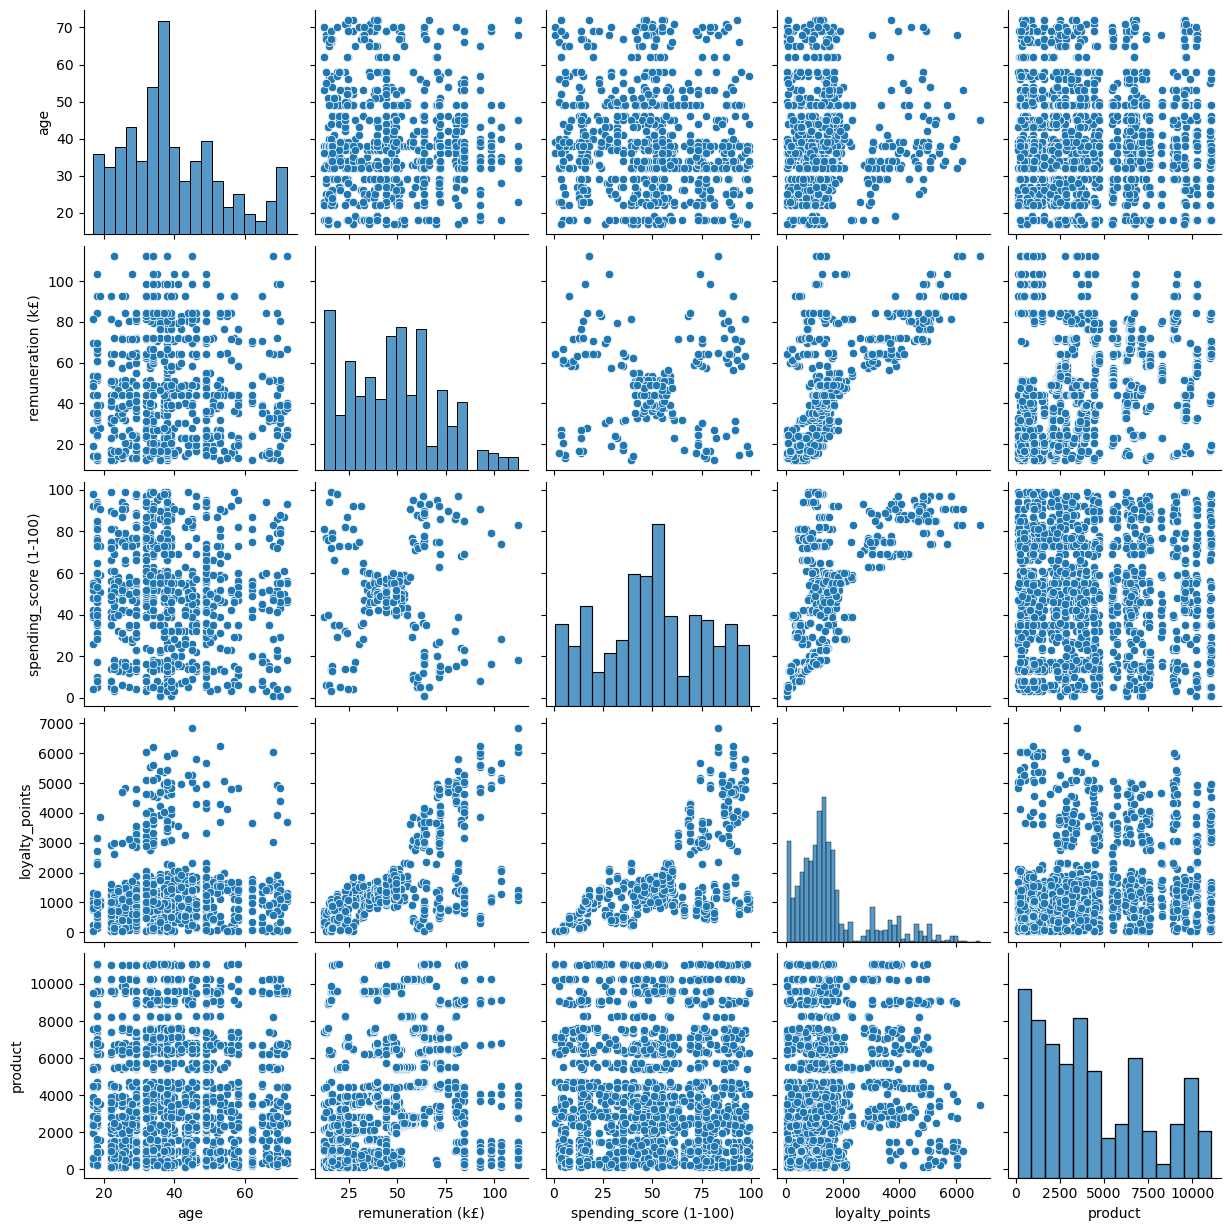

In [35]:
# Create a pairplot to look for relationships and distribution of numercial data.
# Prepare the chart data.
chart_data = reviews.copy(['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points'])

# Plot the chart.
sns.pairplot(chart_data)

# Save the plot.
plt.savefig('A - Pairplot from data ingestion.png')

**COMMENTS:** 
- evidence of loyalty points being skewed
- evidence of potential relationship between remuneration and loyalty points < 60k (maybe a different relationship(s) > 60k)
- evidence of potential relationship between spending score and loyalty points < 60 (maybe different relationship(s) > 60)
- evidence of a break in loyalty points vs age (clear gap between the upper and lower sets of data)
- remuneration vs spending score shows evidence of potential clustering

## Investigate outliers in loyalty points

Text(0.5, 1.0, 'Loyalty Points')

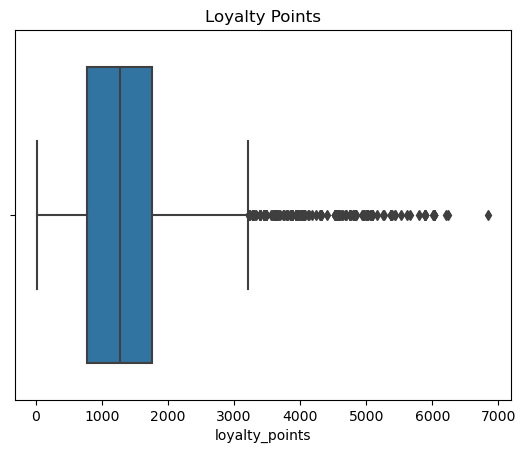

In [38]:
# View spread of loyalty points.
sns.boxplot(x = 'loyalty_points', data = reviews).set_title('Loyalty Points')

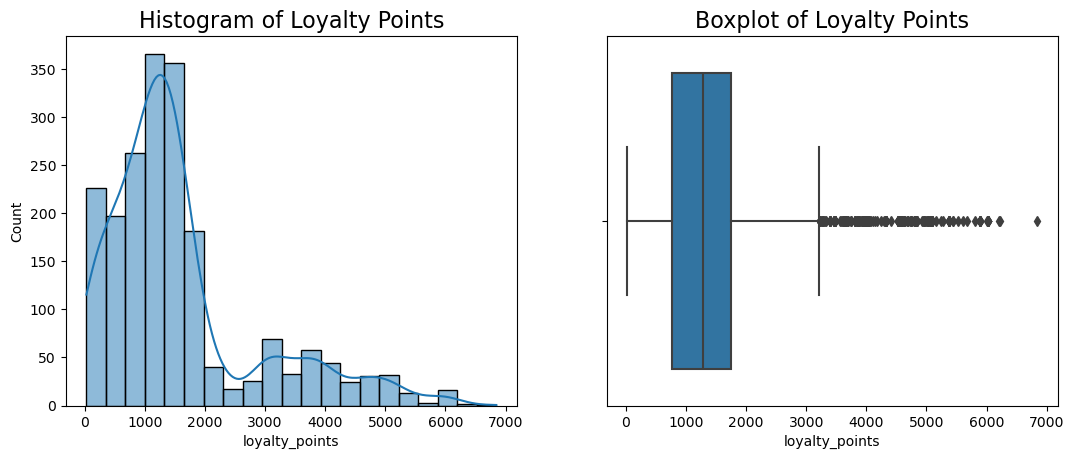

In [41]:
# Create a side by side plot of histogram and box plot of loyalty points for
# technical report.
# Create the plot.
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)
    
# Plot the charts.
sns.histplot(data = reviews, x = 'loyalty_points', bins = 21, kde = True,
             ax = axs[0]).set_title('Histogram of Loyalty Points', fontsize = 16)

sns.boxplot(data = reviews, x = 'loyalty_points', 
            ax = axs[1]).set_title('Boxplot of Loyalty Points', fontsize = 16)

# Customise the plot.
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
    
# Save the plot (if required).
plt.savefig('Loyalty Points Histogram & Boxplot.png')
        
# Display the chart.    
plt.show()

Text(0.5, 1.0, 'Loyalty Points vs Gender')

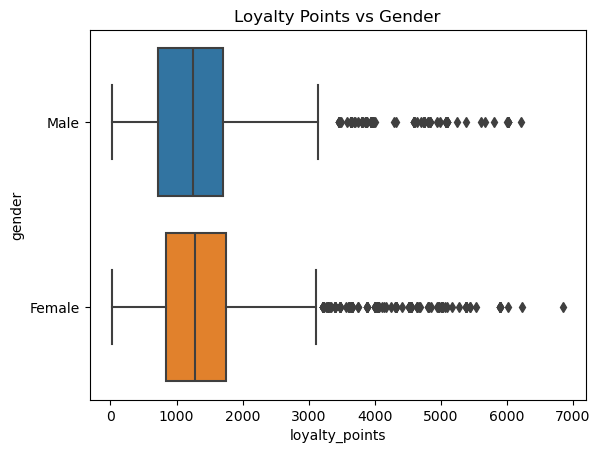

In [43]:
# View spread of loyalty points by gender.
sns.boxplot(x = 'loyalty_points', y = 'gender', data = reviews).set_title('Loyalty Points vs Gender')

Text(0.5, 1.0, 'Loyalty Points vs Education')

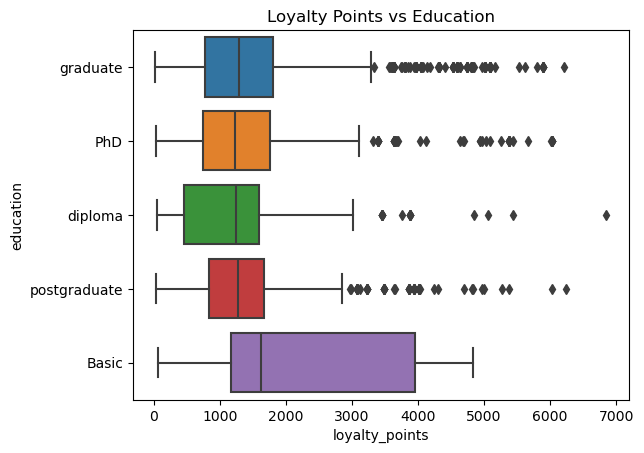

In [45]:
# View spread of loyalty points by gender.
sns.boxplot(x = 'loyalty_points', y = 'education', data = reviews).set_title('Loyalty Points vs Education')

Text(0.5, 1.0, 'Total Loyalty Points By Age')

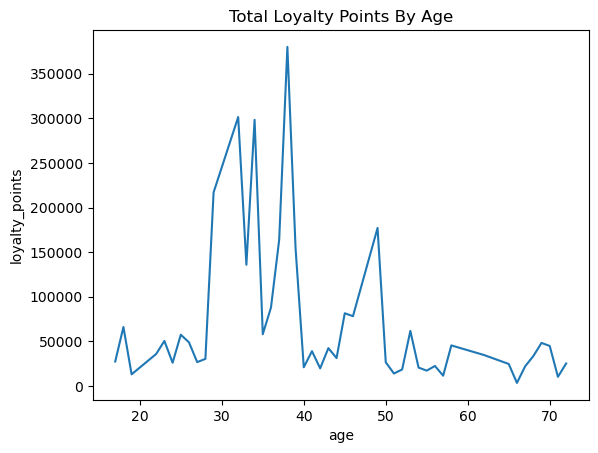

In [47]:
# View average loyalty points by by age.
# Prepare the data.
data = reviews[['age', 'loyalty_points']].groupby('age').sum()

# Plot the chart.
sns.lineplot(data = data, x = 'age', y= 'loyalty_points').set_title('Total Loyalty Points By Age')

Text(0.5, 1.0, 'Average Loyalty Points By Age')

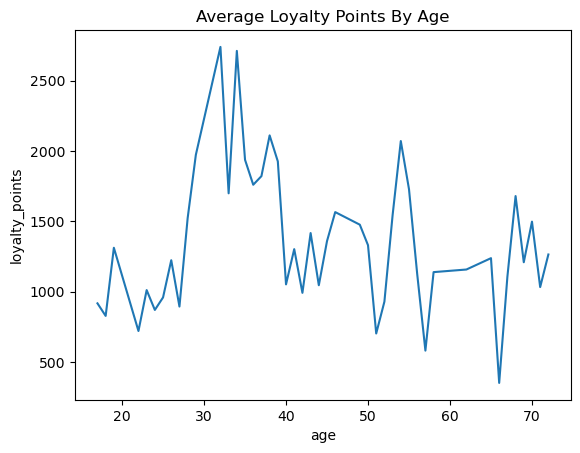

In [49]:
# View average loyalty points by by age.
# Prepare the data.
data = reviews[['age', 'loyalty_points']].groupby('age').mean()

# Plot the chart.
sns.lineplot(data = data, x = 'age', y= 'loyalty_points').set_title('Average Loyalty Points By Age')

**COMMENTS:**
- no visible trend of loyalty points with age
- there may be potential sub groups within age that impact loyaly points eg 20-30, 30-40, maybe in 60-70 too
- create sub groups of age for analysis and modelling

## Check for outliers in other numerical data

Text(0.5, 1.0, 'Remuneration')

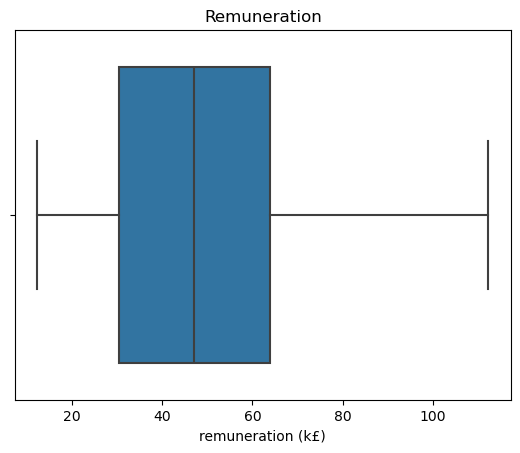

In [53]:
# View spread of remuneration
sns.boxplot(x = 'remuneration (k£)', data = reviews).set_title('Remuneration')

Text(0.5, 1.0, 'Spending Score')

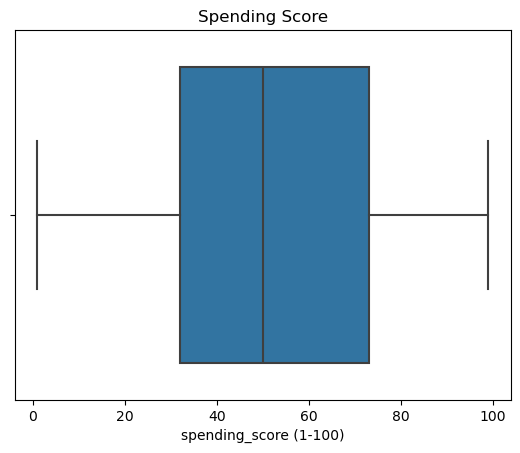

In [55]:
# View spread of remuneration
sns.boxplot(x = 'spending_score (1-100)', data = reviews).set_title('Spending Score')

Text(0.5, 1.0, 'Age')

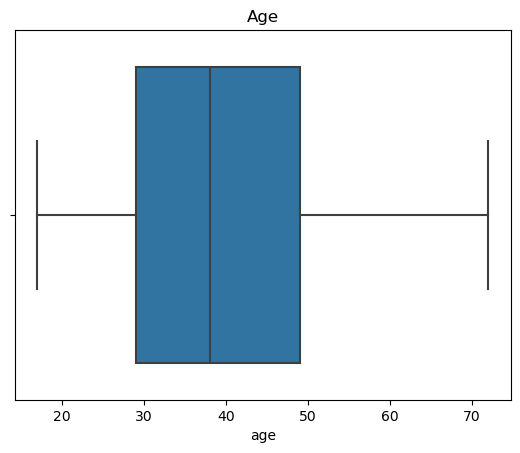

In [57]:
# View spread of remuneration
sns.boxplot(x = 'age', data = reviews).set_title('Age')

**COMMENT:** no outliers found in remuneration, spending score or age data.

## Notes and observations

### General observations
- 2000 rows x 11 columns
- each row represents a product review
- it is unclear how many people have submitted reviews (could be or 2000)
- dtypes: float64(1), int64(4), object(6)
- no null values of an type present
- column names need simplifying for 'spending_score (1-100)' and 'remuneration (k£)'
### 'product' column
- data looks as though it should be a categorical label as opposed to continuous numeric
- product column holds 200 unique values, total of 2000 rows of data, highest value count is 13
- data is of a label type nature therefore shouldn't be used as continuous data, convert to str
### 'langauge' and 'platform' columns
- only contain a single value, therefore these can be removed and deemed constant
### 'education' column
- tidy up for readability, first letter = upper case for all values
### 'summary' and 'review' columns
- both columns appear to be free text columns
### 'loyalty_points' column
- evidence of data being skewed and containing outliers, but no justification to remove
### Is there visual evidence of potential relationships with 'loyalty_points'?
- 'remuneration (k£)' = YES < 60k, maybe a different relationship(s) > 60k
- 'spending_score (1-100)' = YES < 60, maybe different relationship(s) > 60
- 'age' = NO
- 'gender' = NO
### Other points of interest
- 'remuneration (k£)' vs 'spending_score (1-100)' shows evidence of potential clustering
- average 'loyalty_points' vs 'age' does not show a trend but there maybe potential potential categorival sub groups within age that impact loyaly points (eg 20-30, 30-40, maybe in 60-70), therefore create new column 'age_group' for further analysis and modelling
- evidence of a break in loyalty points vs age (clear gap between the upper and lower sets of data)

# Data Wrangling

## How to deal with loyalty points being skewed and potentially not being normal

In [64]:
# Create a user defined function.
def print_tests_for_normality(data, data_name):
    # Function to print key stats in normality tests.
    # Print a title.
    print(data_name, 'Tests for Normality:')
    
    print('Skew =', round(skew(data),4))
    print('Kurtosis =', round(kurtosis(data),4))
    
    print('Shapiro Wilk statistic =', round(shapiro(data)[0], 4))
    print('Shapiro Wilk p-value =', round(shapiro(data)[1], 4), '\n')

In [66]:
# Confirm loyalty points is not normally distributed.
print_tests_for_normality(reviews['loyalty_points'], 'Loyalty Points') 

Loyalty Points Tests for Normality:
Skew = 1.4637
Kurtosis = 1.7088
Shapiro Wilk statistic = 0.8431
Shapiro Wilk p-value = 0.0 



**COMMENT:** confirm loyalty points is not normaly distributed:

## Keep the outliers and transform the data

In [70]:
# Create simple transformed versions of loyalty points in a new dataframe.
# Start with the observed data.
options = pd.DataFrame(data = reviews, columns = ['loyalty_points'])

# Create SQRT of loyalty points.
options['lp_sqrt'] = np.sqrt(reviews['loyalty_points'])

# Create SQRT of loyalty points.
options['lp_log10'] = np.log10(reviews['loyalty_points'])

# Create SQRT of loyalty points.
options['lp_inv'] = (1 / reviews['loyalty_points'])

# View the updated dataframe.
options.head()

loyalty_points    lp_sqrt  lp_log10    lp_inv
0             210  14.491377  2.322219  0.004762
1             524  22.891046  2.719331  0.001908
2              40   6.324555  1.602060  0.025000
3             562  23.706539  2.749736  0.001779
4             366  19.131126  2.563481  0.002732

In [72]:
# Create a min max scaled version of loyaly points and add to dataframe.
X_data = options['loyalty_points']
X = (X_data - X_data.min())/(X_data.max() - X_data.min())
options['lp_minmax'] = X

# Create a Box Cox transformation version of loyalty points and add to data frame.
options['lp_boxcox'], _ = stats.boxcox(options['loyalty_points'])

# View the updated dataframe.
options.head()

loyalty_points    lp_sqrt  lp_log10    lp_inv  lp_minmax  lp_boxcox
0             210  14.491377  2.322219  0.004762   0.027118  15.221535
1             524  22.891046  2.719331  0.001908   0.073146  21.861599
2              40   6.324555  1.602060  0.025000   0.002199   7.382386
3             562  23.706539  2.749736  0.001779   0.078716  22.460458
4             366  19.131126  2.563481  0.002732   0.049985  19.006629

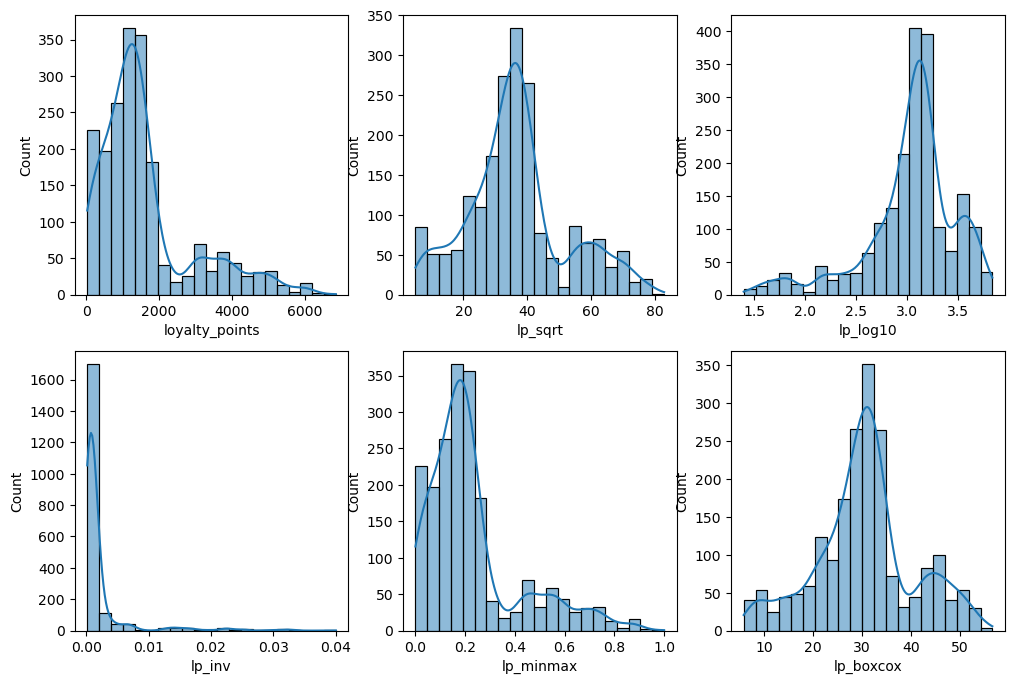

In [74]:
# Create a plot of all six distributions.
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(12, 8)
plt.style.use('default')

# Plot the charts.
sns.histplot(x = 'loyalty_points', data = options, bins = 21,
             kde = True, ax = axs[0, 0])

sns.histplot(x = 'lp_sqrt', data = options, bins = 21,
             kde = True, ax = axs[0, 1])

sns.histplot(x = 'lp_log10', data = options, bins = 21,
             kde = True, ax = axs[0, 2])

sns.histplot(x = 'lp_inv', data = options, bins = 21,
             kde = True, ax = axs[1, 0])

sns.histplot(x = 'lp_minmax', data = options, bins = 21,
             kde = True, ax = axs[1, 1])

sns.histplot(x = 'lp_boxcox', data = options, bins = 21,
             kde = True, ax = axs[1, 2])

fig.savefig('Distribution Plots - Loyalty Points Transformed (Outliers Incl)')

# Display the chart.
plt.show()

**COMMENT:** SQRT and Box Cox appear visually to be the closest to normal.

In [76]:
# Display normality stats for transformed data, SQRT and Box Cox
print_tests_for_normality(options['lp_sqrt'], 'SQRT Loyalty Points')  

print_tests_for_normality(options['lp_boxcox'], 'Box Cox Loyalty Points')  

SQRT Loyalty Points Tests for Normality:
Skew = 0.4543
Kurtosis = 0.1439
Shapiro Wilk statistic = 0.9609
Shapiro Wilk p-value = 0.0 

Box Cox Loyalty Points Tests for Normality:
Skew = 0.0026
Kurtosis = 0.123
Shapiro Wilk statistic = 0.9719
Shapiro Wilk p-value = 0.0 



**COMMENTS:** niether are normally distributed

## Remove the outliers and transform the data

In [81]:
# Remove outliers based on a threshold for z value.
# Set threshold value.
z_threshold = 2

# Calculate z values for loyalty points.
z = np.abs(stats.zscore(options['loyalty_points']))

# Identify outliers indexes where z exceeds the threshold.
outlier_indexes = np.where(z > z_threshold)[0]

# Create a temp dataframe to hold outlier values of loyalty points.
no_outliers = pd.DataFrame(options['loyalty_points'].drop(outlier_indexes))

# View before and after shape of the data.
print('Shape WITH outliers:', options.shape)
print('Shape WITHOUT outliers:', no_outliers.shape)
no_outliers.head()

Shape WITH outliers: (2000, 6)
Shape WITHOUT outliers: (1875, 1)


loyalty_points
0             210
1             524
2              40
3             562
4             366

**COMMENT:** 125 data points removed from the distribution

In [84]:
# Create simple transformed versions of loyalty points in a new dataframe.
# Create SQRT of loyalty points.
no_outliers['lp_sqrt'] = np.sqrt(no_outliers['loyalty_points'])

# Create SQRT of loyalty points.
no_outliers['lp_log10'] = np.log10(no_outliers['loyalty_points'])

# Create SQRT of loyalty points.
no_outliers['lp_inv'] = (1 / no_outliers['loyalty_points'])

# View the updated dataframe.
no_outliers.head()

loyalty_points    lp_sqrt  lp_log10    lp_inv
0             210  14.491377  2.322219  0.004762
1             524  22.891046  2.719331  0.001908
2              40   6.324555  1.602060  0.025000
3             562  23.706539  2.749736  0.001779
4             366  19.131126  2.563481  0.002732

In [86]:
# Create a min max scaled version of loyaly points and add to dataframe.
X_data = no_outliers['loyalty_points']
X = (X_data - X_data.min())/(X_data.max() - X_data.min())
no_outliers['lp_minmax'] = X

# Create a Box Cox transformation version of loyalty points and add to data frame.
no_outliers['lp_boxcox'], _ = stats.boxcox(no_outliers['loyalty_points'])

# View the updated dataframe.
no_outliers.head()

loyalty_points    lp_sqrt  lp_log10    lp_inv  lp_minmax  lp_boxcox
0             210  14.491377  2.322219  0.004762   0.045001  23.138355
1             524  22.891046  2.719331  0.001908   0.121382  36.326254
2              40   6.324555  1.602060  0.025000   0.003649   9.655832
3             562  23.706539  2.749736  0.001779   0.130625  37.582476
4             366  19.131126  2.563481  0.002732   0.082948  30.483775

SQRT Loyalty Points Tests for Normality:
Skew = 0.4543
Kurtosis = 0.1439
Shapiro Wilk statistic = 0.9609
Shapiro Wilk p-value = 0.0 

Box Cox Loyalty Points Tests for Normality:
Skew = 0.0026
Kurtosis = 0.123
Shapiro Wilk statistic = 0.9719
Shapiro Wilk p-value = 0.0 



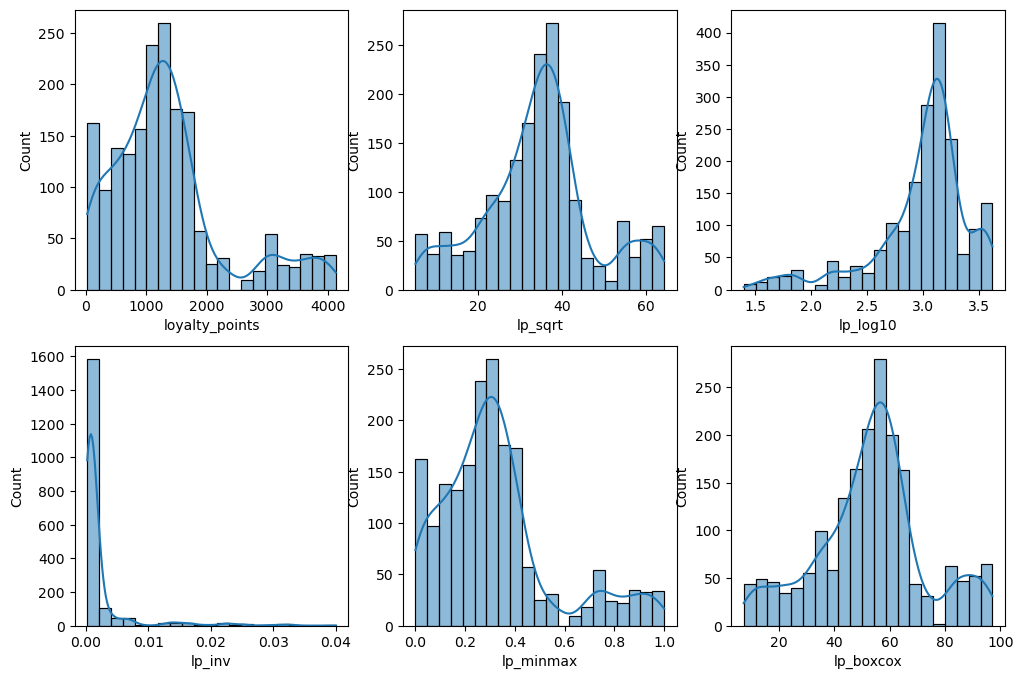

In [88]:
# Create a plot of all six distributions.
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(12, 8)
plt.style.use('default')

# Plot the charts.
sns.histplot(x = 'loyalty_points', data = no_outliers, bins = 21,
             kde = True, ax = axs[0, 0])

sns.histplot(x = 'lp_sqrt', data = no_outliers, bins = 21,
             kde = True, ax = axs[0, 1])

sns.histplot(x = 'lp_log10', data = no_outliers, bins = 21,
             kde = True, ax = axs[0, 2])

sns.histplot(x = 'lp_inv', data = no_outliers, bins = 21,
             kde = True, ax = axs[1, 0])

sns.histplot(x = 'lp_minmax', data = no_outliers, bins = 21,
             kde = True, ax = axs[1, 1])

sns.histplot(x = 'lp_boxcox', data = no_outliers, bins = 21,
             kde = True, ax = axs[1, 2])

fig.savefig('Distribution Plots - Loyalty Points Transformed (Outliers Excl)')

# Display the chart.
# Display normality stats for transformed data, SQRT and Box Cox
print_tests_for_normality(options['lp_sqrt'], 'SQRT Loyalty Points')  

print_tests_for_normality(options['lp_boxcox'], 'Box Cox Loyalty Points')

plt.show()

**COMMENT:** of these six, SQRT  and Box Cox would appear visually to be the closest to normal other than the dip at SQRT ~55, therfore test for normality and compare to laylty point data.

In [90]:
# Display normality stats for transformed data, SQRT and Box Cox
print_tests_for_normality(no_outliers['loyalty_points'], 'Loyalty Points, No Outliers')  

print_tests_for_normality(no_outliers['lp_sqrt'], 'SQRT Loyalty Points, No Outliers')  

print_tests_for_normality(no_outliers['lp_boxcox'], 'Box Cox Loyalty Points, No Outliers') 

Loyalty Points, No Outliers Tests for Normality:
Skew = 1.153
Kurtosis = 1.0429
Shapiro Wilk statistic = 0.8904
Shapiro Wilk p-value = 0.0 

SQRT Loyalty Points, No Outliers Tests for Normality:
Skew = 0.0857
Kurtosis = 0.063
Shapiro Wilk statistic = 0.9691
Shapiro Wilk p-value = 0.0 

Box Cox Loyalty Points, No Outliers Tests for Normality:
Skew = -0.024
Kurtosis = 0.0775
Shapiro Wilk statistic = 0.9695
Shapiro Wilk p-value = 0.0 



**COMMENTS:** none are normally distributed

## Decision point: What to do about non-normality of loyalty points?

**DECISION:** to `proceed at risk using original loyalty points data with outliers and untransformed`.<br><br>
**RATIONALE:**
- none of the data transformations on the data result in a normal distribution either with or without outliers
- although acceptable skew and kurtosis values can be derived when outliers are removed and data transformed, the Shapiro Wilk test consistently has p-value < 0.05
- the data set contains 2000 reviews of 200 products (average 10 reviews per product) and there is likely to be repeat (duplicate) data in the data set for other columns as there is no customer identification, therefore it is unlikely the data would be normally distributed
- the simplest approach is to proceed at risk knowing the original data is not normal, consider this risk during modelling and mitigate where possible (eg ensuring any residuals are normally distributed)
- this would then allow the analysis to be easily re-run in the future with a larger data set (this will be a recommendation to Turtle Games)

## Remove redundant columns

In [97]:
# Delete Platform and langauage columns.
reviews.drop(columns = ['platform', 'language'], inplace = True)

# Check the change worked.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## Change column names for readability and efficiency

In [100]:
# Rename columns for ease of use, format consistency and meaningfulness.
reviews.rename(columns = {'remuneration (k£)': 'remuneration',
                         'spending_score (1-100)': 'spending_score'}, inplace = True)

# Check the change worked.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## Tidy up the education column for readability

In [103]:
# Create a list of conditions.
conditions = [
    (reviews['education'] == 'graduate'),
    (reviews['education'] == 'diploma'),
    (reviews['education'] == 'postgraduate'),
    (reviews['education'] == 'PhD'),
    (reviews['education'] == 'Basic')
    ]

# Create a list of the values we want to assign for each condition
values = ['Graduate', 'Diploma', 'Post Graduate', 'PhD', 'Basic']

# Print value counts before.
print('Before', reviews['education'].value_counts(), '\n')

# Update education column using np.select to assign values.
reviews['education'] = np.select(conditions, values)

# Check the change worked, print value counts after.
print('After', reviews['education'].value_counts())

Before education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64 

After education
Graduate         900
PhD              460
Post Graduate    400
Diploma          190
Basic             50
Name: count, dtype: int64


## Convert product column to str

In [106]:
# Rename columns for ease of use, format consistency and meaningfulness.
reviews['product'] = reviews['product'].astype('str')

# Check the change worked.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   object 
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


## Create new column age_group

In [109]:
# Create a list of conditions.
conditions = [
    (reviews['age'] < 30),
    ( (reviews['age'] >= 30) & (reviews['age'] < 40) ),
    ( (reviews['age'] >= 40) & (reviews['age'] < 50) ),
    ( (reviews['age'] >= 50) & (reviews['age'] < 60) ),
    ( (reviews['age'] >= 60) & (reviews['age'] < 70) ),
    (reviews['age'] >= 70)
    ]

# Create a list of the values to assign for each condition.
values = ['30 & Below', '30-39', '40-49', '50-59', '60-69', '70 & Over']

# Create a new column and use np.select to assign values.
reviews['age_group'] = np.select(conditions, values)

# Check the change worked.
print(reviews['age_group'].value_counts())
reviews[['age', 'age_group']].sample(n = 5)

age_group
30-39         730
30 & Below    510
40-49         360
50-59         200
60-69         140
70 & Over      60
Name: count, dtype: int64


age age_group
1197   34     30-39
20     37     30-39
1321   38     30-39
510    67     60-69
129    38     30-39

## Further exploratory analysis

### Loyalty points by age group

Text(0.5, 1.0, 'Loyalty Points vs Age Group')

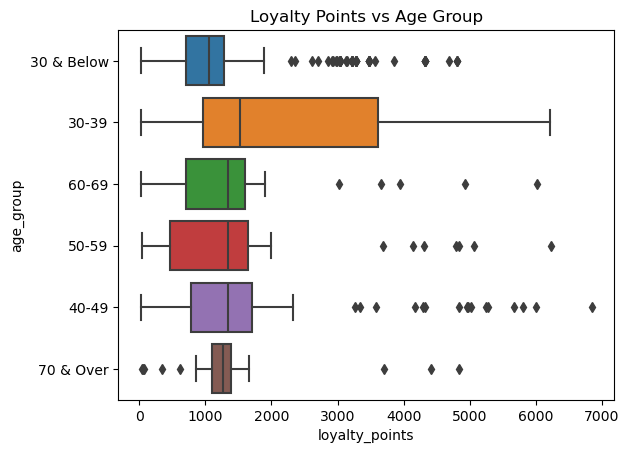

In [113]:
# View spread of loyalty points by new column age group.
sns.boxplot(x = 'loyalty_points', y = 'age_group', data = reviews).set_title('Loyalty Points vs Age Group')

Text(0.5, 1.0, 'Loyalty By Age Group')

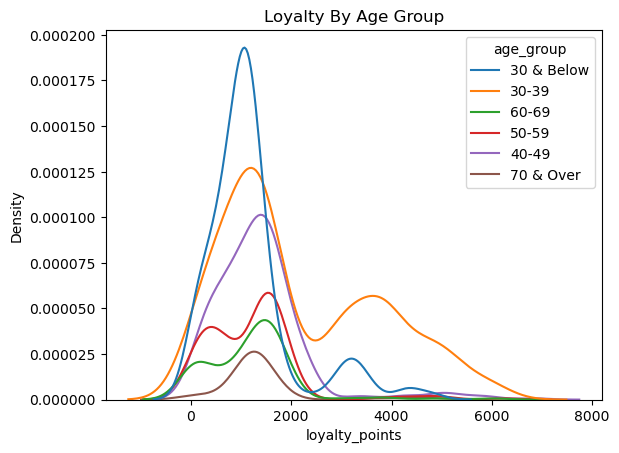

In [114]:
# Plot loyalty points by age_group on a density chart.
sns.kdeplot(data = reviews, x = 'loyalty_points', hue = 'age_group').set_title('Loyalty By Age Group')

In [116]:
# Create a user defined function to plot a Pareto chart.

def plot_pareto_chart(chart_type, df, title, xlabel, ylabel, save):
    """
    This function creates and plots a Pareto chart.  It takes the following
    list of arguments:
        - chart_type = either 'sum' or 'count'
        - df = a dataframe containin the x and y variables in x y order
        - title = the text to be display as the main chart title
        - xlabel = the text to be display on the x axis label
        - ylabel = the text to be display on the x axis label
        - save = boolean, if True the Pareto chart will be as .png file
    """
    # PREPARE THE DATA ------------------------------------------------------ #
    # Make a copy of the data.
    chart_data = df.copy()
    
    # Assign column names to categorical and numerical variables.
    xvar = chart_data.columns[0]
    yvar = chart_data.columns[1]
    
    # Group by categorical variable then calculate sum or count, sort in
    # descending order.
    if chart_type == 'sum':
        chart_data = chart_data.groupby(xvar).sum()\
                            .reset_index()\
                            .sort_values(yvar, ascending = False)
        
    elif chart_type == 'count':
        chart_data = chart_data.groupby(xvar).count()\
                            .reset_index()\
                            .sort_values(yvar, ascending = False)
        
    else: 
        return f"Invalid chart type: {chart_type}.  Chart type must be 'sum' or 'count'." 
     
    # Calculate cumulative percentage.
    chart_data['cumperc'] = chart_data[yvar].cumsum()/chart_data[yvar].sum()*100
    

    # PLOT THE DATA --------------------------------------------------------- #
    # Create the plot figure.
    fig, ax = plt.subplots()
    fig.set_size_inches(6.4, 4.8)
    
    # Plot the the bar chart vs the primary y axis.
    ax = sns.barplot(x = xvar, y = yvar, data = chart_data,
            estimator = sum, color = my_dblue, errorbar = None)
    
    # Plot the the cumulative percentage line chart vs the secondary y axis.
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x = xvar, y = 'cumperc', data = chart_data, marker = 'o', color = my_lorange)
    
    # CUSTOMISE THE PLOT ---------------------------------------------------- #
    # Plot titles and axis labels.
    plt.title(title, fontsize = 16)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax2.set_ylabel('Cumulative Percentage', fontsize = 12)

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
        
    # Customise primary y axis.
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    # Customise secondary y axis.
    ax2.set_ylim(0, 105)
    ax2.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    # Save the plot (if required).
    if save == True:
        filename = title + '.png'
        fig.savefig(filename)

    # Display the chart.
    plt.show()

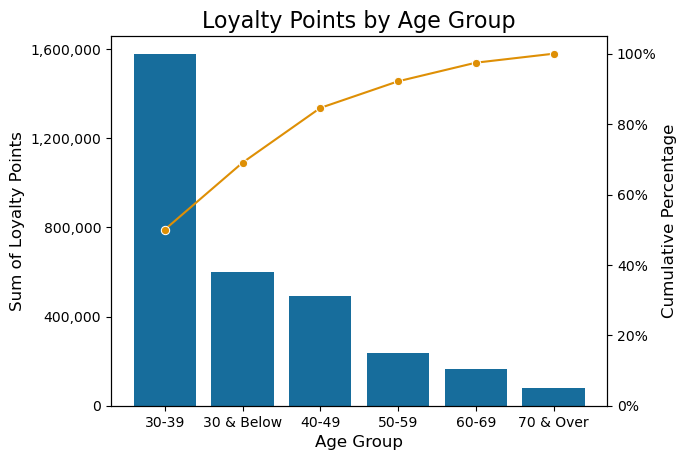

In [119]:
# Plot a Paretochart of loyalty points by age group.
pareto_data = reviews[['age_group', 'loyalty_points']].copy()
plot_pareto_chart('sum', pareto_data, 'Loyalty Points by Age Group', 'Age Group', 'Sum of Loyalty Points', False)

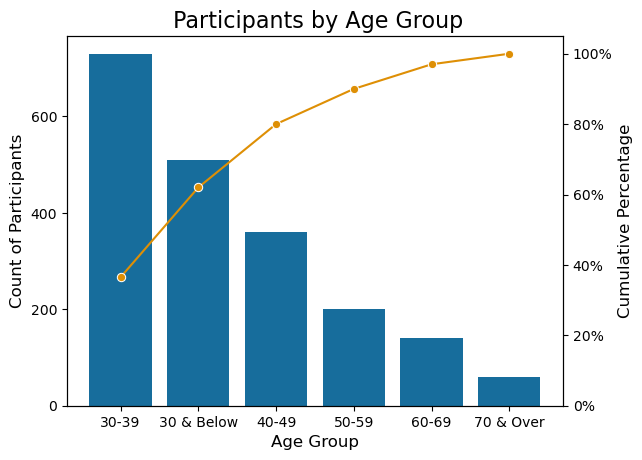

In [121]:
# Plot a Paretochart of loyalty points by age group.
pareto_data = reviews[['age_group', 'age']].copy()
plot_pareto_chart('count', pareto_data, ' Participants by Age Group', 'Age Group', 'Count of Participants', False)

### Loyalty points by gender

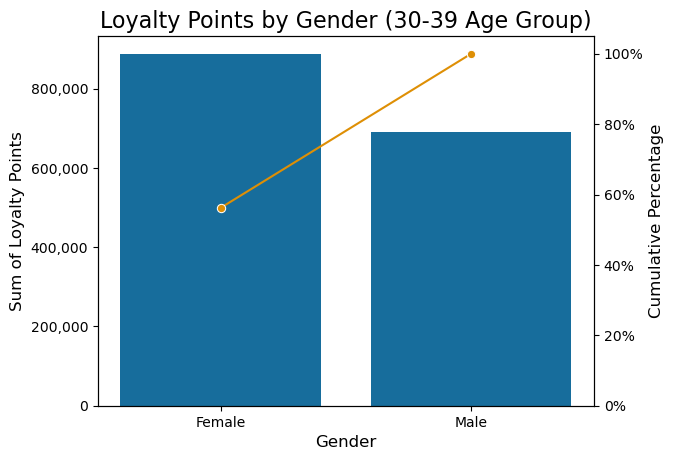

In [124]:
# Plot a Paretochart of loyalty points by education for 30-39.
pareto_data = reviews[['gender', 'loyalty_points']] [reviews['age_group'] == '30-39'].copy()
plot_pareto_chart('sum', pareto_data, 'Loyalty Points by Gender (30-39 Age Group)', 'Gender', 'Sum of Loyalty Points', False)

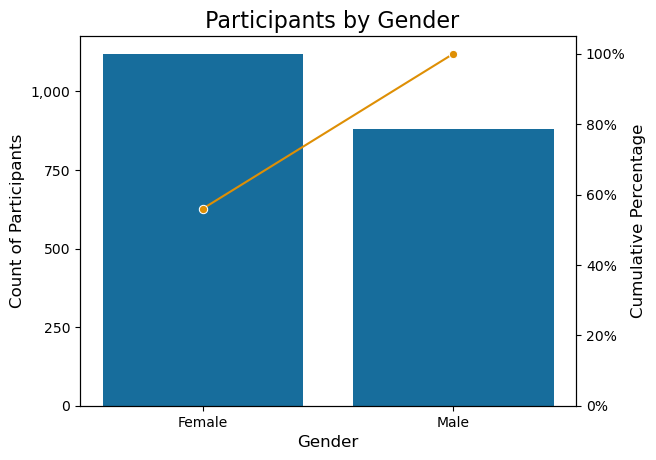

In [126]:
# Plot a Paretochart of loyalty points by age group.
pareto_data = reviews[['gender', 'age']].copy()
plot_pareto_chart('count', pareto_data, ' Participants by Gender', 'Gender', 'Count of Participants', False)

### Loyalty points by education

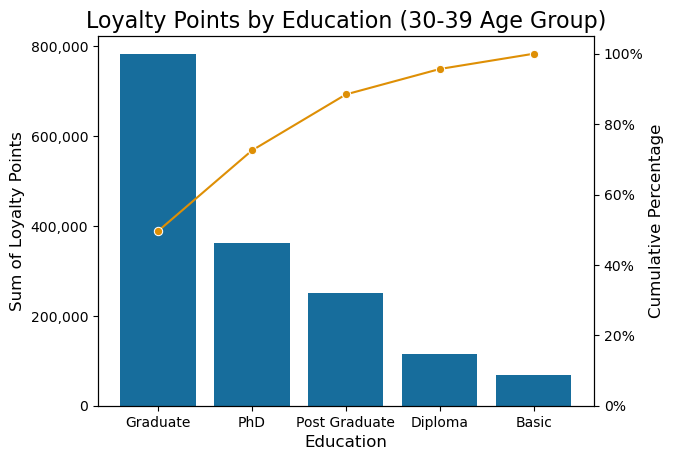

In [129]:
# Plot a Paretochart of loyalty points by education for 30-39.
pareto_data = reviews[['education', 'loyalty_points']] [reviews['age_group'] == '30-39'].copy()
plot_pareto_chart('sum', pareto_data, 'Loyalty Points by Education (30-39 Age Group)', 'Education', 'Sum of Loyalty Points', False)

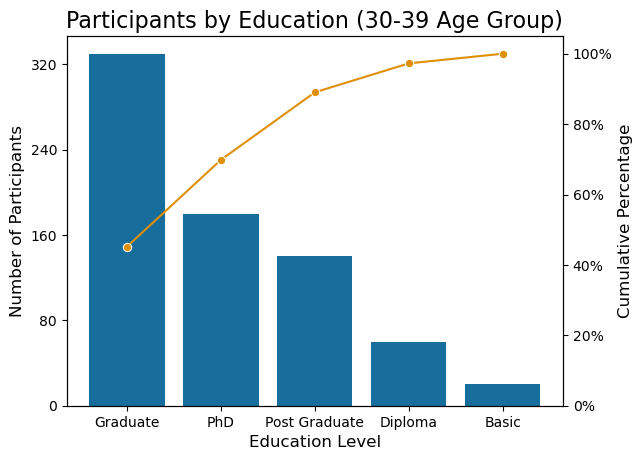

In [131]:
# Plot a Paretochart of participants by education for 30-39.
pareto_data = reviews[['education', 'age']] [reviews['age_group'] == '30-39'].copy()
plot_pareto_chart('count', pareto_data, 'Participants by Education (30-39 Age Group)', 'Education Level', 'Number of Participants', False)

## Save the data to a new version of the file

In [134]:
# Save clean data frame to new csv file without the index.
reviews.to_csv('turtle_reviews_v2.csv', index = False)

# Predictive Modelling - Linear Regression

## Load modified turtle review file

In [138]:
# Import the data and view meta data and data.
tr = pd.read_csv('turtle_reviews_v2.csv')

print(tr.info())
tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  
0  The fact that 50% of this space is wasted on a...  30 & Below  
1  Another worthless Dungeon Master's screen from...  30 & Below  
2                    pretty, but also pretty useless  30 & Below  
3                                         Five Stars  30 & Below  
4                                         Money trap       30-39

## Predictive Modelling: Linear Regression

### Check for correlation between variables

Correlation analysis of remuneration (x) vs loyalty points (y) 
Coeff = 0.6161
p-val = 0.0


Text(0.5, 1.0, 'Remuneration vs Loyalty Points')

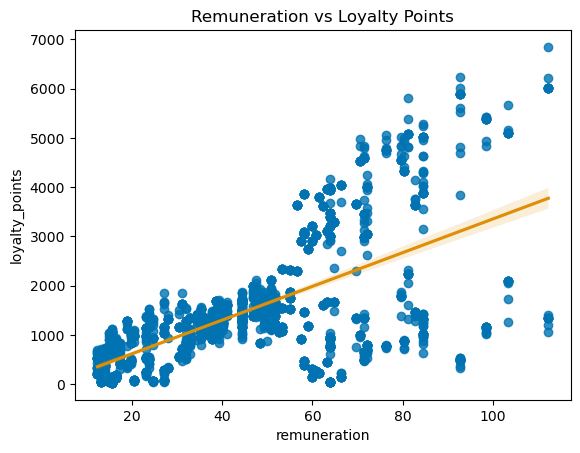

In [142]:
# Check for correlation using Pearsons correlation coefficient.
print('Correlation analysis of remuneration (x) vs loyalty points (y) ')
print('Coeff =', round(pearsonr(tr['remuneration'], tr['loyalty_points'])[0], 4))
print('p-val =', round(pearsonr(tr['remuneration'], tr['loyalty_points'])[1], 4))

# Plot potential relationship.
sns.regplot(data = tr, y = 'loyalty_points', x = 'remuneration',
            scatter_kws = {'color': my_dblue}, line_kws = {'color': my_lorange},
            ci = 95).set_title('Remuneration vs Loyalty Points')

Correlation analysis of spending score (x) vs loyalty points (y) 
Coeff = 0.6723
p-val = 0.0


Text(0.5, 1.0, 'Spending Score vs Loyalty Points')

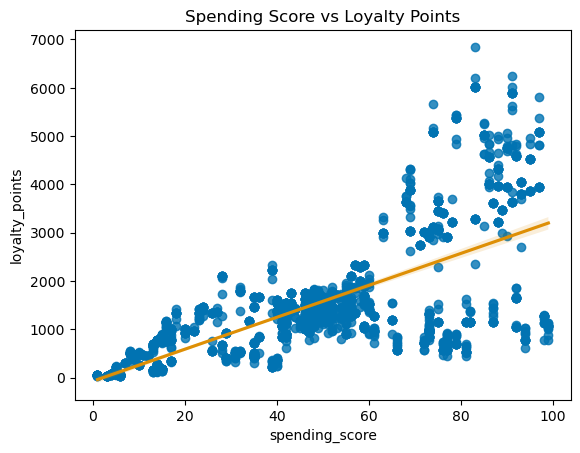

In [143]:
# Check for correlation using Pearsons correlation coefficient.
print('Correlation analysis of spending score (x) vs loyalty points (y) ')
print('Coeff =', round(pearsonr(tr['spending_score'], tr['loyalty_points'])[0], 4))
print('p-val =', round(pearsonr(tr['spending_score'], tr['loyalty_points'])[1], 4))


# Plot potential relationship.
sns.regplot(data = tr, y = 'loyalty_points', x = 'spending_score',
            scatter_kws = {'color': my_dblue}, line_kws = {'color': my_lorange},
            ci = 95).set_title('Spending Score vs Loyalty Points')

Correlation analysis of age (x) vs loyalty points (y) 
Coeff = -0.0424
p-val = 0.0577


Text(0.5, 1.0, 'Age vs Loyalty Points')

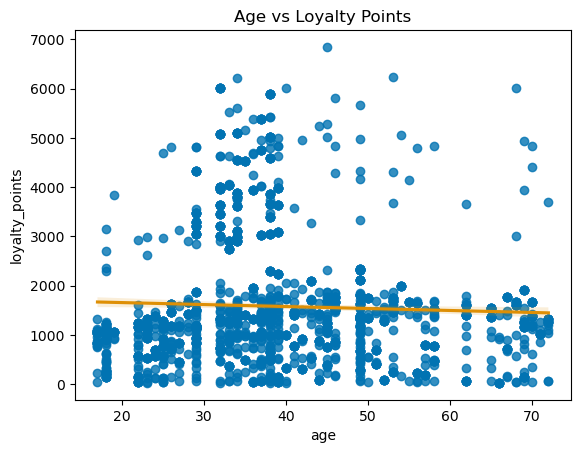

In [144]:
# Check for correlation using Pearsons correlation coefficient.
print('Correlation analysis of age (x) vs loyalty points (y) ')
print('Coeff =', round(pearsonr(tr['age'], tr['loyalty_points'])[0], 4))
print('p-val =', round(pearsonr(tr['age'], tr['loyalty_points'])[1], 4))


# Plot potential relationship.
sns.regplot(data = tr, y = 'loyalty_points', x = 'age',
            scatter_kws = {'color': my_dblue}, line_kws = {'color': my_lorange},
            ci = 95).set_title('Age vs Loyalty Points')

**COMMENTS:** correlation between remuneration (x) vs loyalty points (y) and spending score (x) vs loyalty points (y) confirmed and p-value shows significant; age will be excluded as it has no significant impact on loyalty points.

### MODEL 1 SLR (y = loyalty_points, x = remuneration)

In [150]:
# Prepare the data.
y = tr['loyalty_points'].values.reshape(-1, 1)
X = tr['remuneration'].values.reshape(-1, 1) 

In [152]:
# Split the data 80 / 20 (large data set, 2000 records in total).
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [154]:
# Train the model.
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(X_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(X_test)

# View the output.
#y_pred

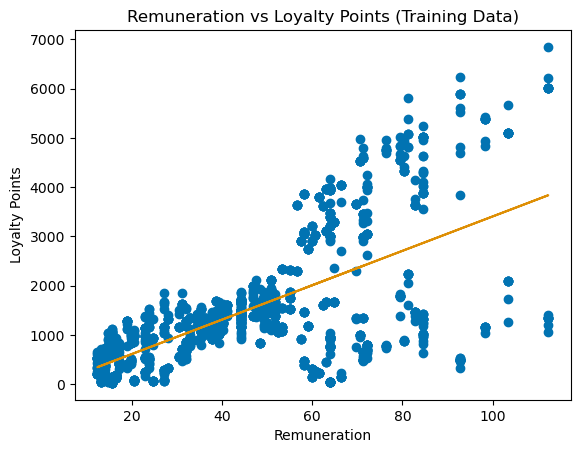

In [156]:
# Visualise the TRAINING set.
plt.scatter(X_train, y_train, color = my_dblue)
plt.plot(X_train, lr.predict(X_train), color = my_lorange)
plt.title('Remuneration vs Loyalty Points (Training Data)')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

plt.show()

In [158]:
# Print the R-squared, intercept and coefficient value.
print('MODEL 1 Goodness of Fit, Intercept and Coefficient (Training Data)')
print('R-squared value:', lr.score(X_train, y_train))
print('Intercept value:', lr.intercept_)
print('Coefficient value:', lr.coef_)

MODEL 1 Goodness of Fit, Intercept and Coefficient (Training Data)
R-squared value: 0.3942033404299261
Intercept value: [-84.93616462]
Coefficient value: [[34.89878575]]


**COMMENT:** the model explains 39% of the variation in the dependent variable (loyalty_points).

In [161]:
# Evaluate the model using the test data.
print('MODEL 1 Evaluation (Test Data)')
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred), 0))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred), 0)) 

MODEL 1 Evaluation (Test Data)
MAE: 748.0
MSE: 1106064.0


In [163]:
# Create a user defined function to plot residuals.
def plot_residuals(pred, obs, title, save):
    """
    This function plots a QQ residuals chart.  It takes the following
    list of arguments:
        - pred = list of predicted values
        - obs = list of observed values
        - title = the text to be display as the main chart title
        - save = boolean, if True the Pareto chart will be as .png file
    """
    # PREPARE THE DATA ------------------------------------------------------ #
    residuals = pred - obs
    
    # PLOT THE DATA --------------------------------------------------------- #
    # Create the plot figure.
    plt.rcParams['figure.figsize'] = [6.4, 4.8]
    plt.style.use('default')
    
    # Plot the standardised residuals, vs theoretical normal distribution.
    ax = sm.qqplot(residuals, fit = True, line = '45')
    
    # CUSTOMISE THE PLOT ---------------------------------------------------- #
    # Plot titles and axis labels.
    plt.title(title, fontsize = 16)
    plt.ylabel('Residual Quartiles', fontsize = 12)
    plt.xlabel('Normal Quartiles', fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    # Save the plot (if required).
    if save == True:
        filename = title + '.png'
        plt.savefig(filename)
        
    # Display the chart.    
    plt.show()

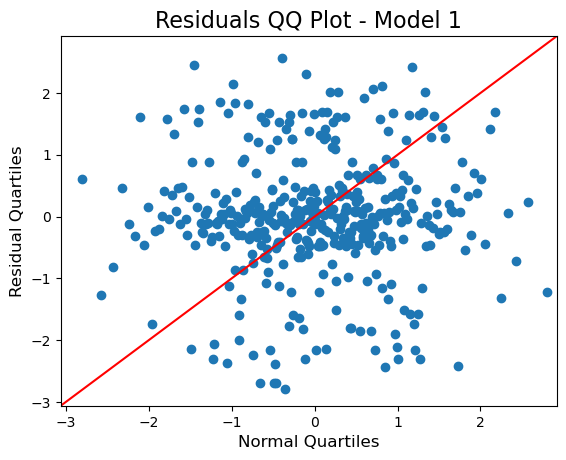

In [165]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Residuals QQ Plot - Model 1', True)

**COMMENT:** residuals not normally distributed.

**COMMENT:** `this will be the baseline model to measure other models against`.

### MODEL 2 SLR (y = loyalty_points, x = spending_score)

In [170]:
# Prepare the data.
y = tr['loyalty_points'].values.reshape(-1, 1)
X = tr['spending_score'].values.reshape(-1, 1) 

In [172]:
# Split the data 80 / 20 (large data set, 2000 records in total).
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [174]:
# Train the model.
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(X_train, y_train)

# Predict is used for predicting on the x_train.
y_pred = lr.predict(X_test)

# View the output.
#y_pred

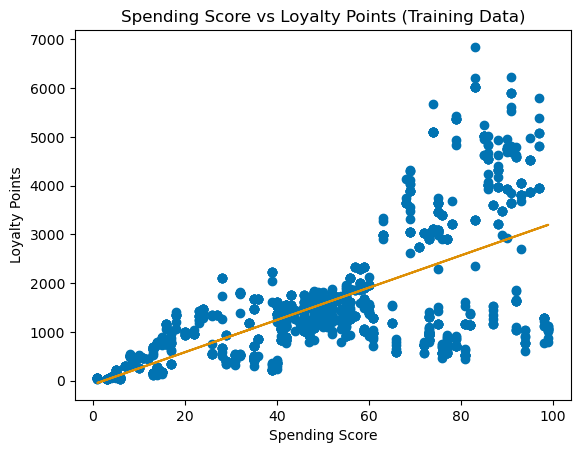

In [176]:
# Visualise the TRAINING set.
plt.scatter(X_train, y_train, color = my_dblue)
plt.plot(X_train, lr.predict(X_train), color = my_lorange)
plt.title('Spending Score vs Loyalty Points (Training Data)')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

plt.show()

In [177]:
# Print the R-squared, intercept and coefficient value.
print('MODEL 2 Goodness of Fit, Intercept and Coefficient (Training Data)')
print('R-squared value:', lr.score(X_train, y_train))
print('Intercept value:', lr.intercept_)
print('Coefficient value:', lr.coef_)

MODEL 2 Goodness of Fit, Intercept and Coefficient (Training Data)
R-squared value: 0.4483889403237179
Intercept value: [-81.62216311]
Coefficient value: [[33.11355993]]


**COMMENT:** the model explains 45% of the variation in the dependent variable (loyalty_points).

In [181]:
# Evaluate the model using the test data.
print('MODEL 2 Evaluation (Test Data)')
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred), 0))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred), 0)) 

MODEL 2 Evaluation (Test Data)
MAE: 652.0
MSE: 865342.0


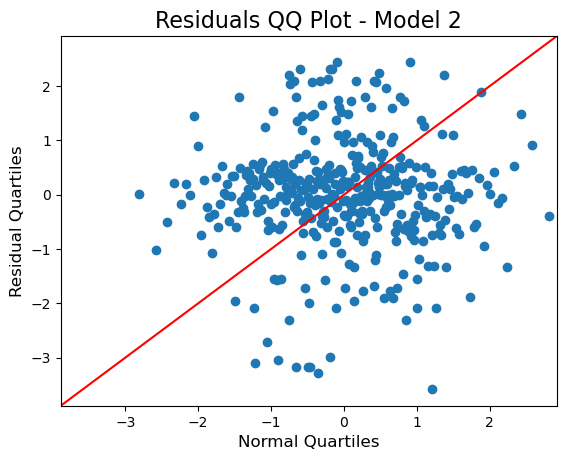

In [183]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Residuals QQ Plot - Model 2', True)

**COMMENT:** residuals not normally distributed.

### Notes and observations

MODEL 1 vs MODEL 2:
- R-squared value: 0.394 vs 0.448
- MAE: 748 vs 652
- MSE: 1106064 vs 865342

Based on the above, `MODEL 2 is the better model and will become the new baseline`.  It explains more of the variation in the response and shows less variation vs the test data.

### MODEL 3 MLR (y = loyalty_points, x = remuneration, spending_score)

In [189]:
# Set the variables.
y = tr['loyalty_points']  
X = tr[['remuneration', 'spending_score']] 

In [191]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [193]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [195]:
# Checking the value of R-squared, intercept and coefficients.
print('MODEL 3 Goodness of Fit (All Data)')
print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

MODEL 3 Goodness of Fit (All Data)
R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('remuneration', 33.97949882180283), ('spending_score', 32.892694687821006)]

In [197]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [199]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred_ols = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:55:30   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3237     39.588    -42.

**COMMENT:** the model explains 83% of the variation (Rsq Adj) in the dependent variable (loyalty_points), the p-values < 0.05 for both remuneration and spending_score therefore both are statistically significant in the model.

In [202]:
# Run the regression test
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)

# Call the predictions for X in the train set.
y_pred = mlr.predict(X_test)  

In [204]:
# Checking the value of R-squared, intercept and coefficients.
print('MODEL 3 Goodness of Fit, Intercept and Coefficient (Training Data)')
print("R-squared: ", mlr.score(X_train, Y_train))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

MODEL 3 Goodness of Fit, Intercept and Coefficient (Training Data)
R-squared:  0.8298594267896443
Intercept:  -1700.3237487205618
Coefficients:


[('remuneration', 34.334599334546944), ('spending_score', 32.64387193637259)]

**COMMENT:** the model explains 83% of the variation in the dependent variable (loyalty_points).

In [207]:
# Check for multi-colinearity
# Add a constant.
X_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif['VIF Factor'] = [variance_inflation_factor(X_temp.values, 
                                               i) for i in range(X_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = X_temp.columns  

# Print the values to two decimal points.
print(vif.round(2)) 

   VIF Factor        features
0        8.91           const
1        1.00    remuneration
2        1.00  spending_score


**COMMENT:** VIF Factors < 5 for remuneration and spending_score indicate there is no multi-colinearity present, thertefore ok to proceed.

In [210]:
# Check for heteroscedasticity
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 45.09301971750066, 'LM Test p-value': 1.6150098749727358e-10, 'F-stat': 23.156868353554195, 'F-test p-value': 1.2194606385152372e-10}


**COMMENT:** The null hypothesis (H0): Homoscedasticity is present, therefore as p-values < 0.05 reject H0, Homoscedasticity not present, thertefore ok to proceed.

In [213]:
# Evaluate the model using the test data.
print('MODEL 3 Evaluation (Test Data)')
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred), 0))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred), 0)) 

MODEL 3 Evaluation (Test Data)
MAE: 430.0
MSE: 300944.0


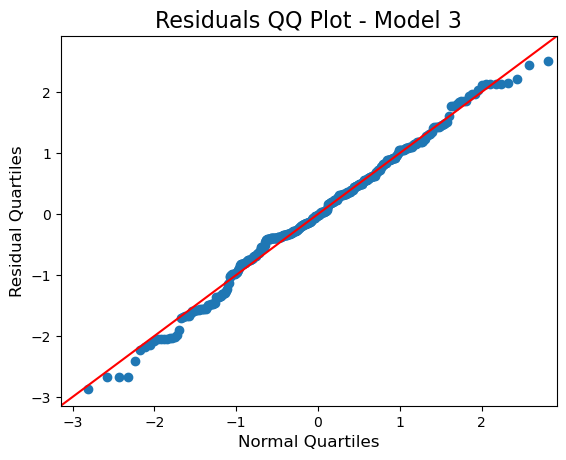

In [215]:
# Plot residuals.
plot_residuals(y_pred, Y_test, 'Residuals QQ Plot - Model 3', True)


**COMMENT:** residuals look normally distributed.

### Notes and observations

MODEL 2 vs MODEL 3:
- R-squared value: 0.448 vs 0.830 (Model 3 = Rsq Adj to take into account number of independent variables)
- MAE: 651 vs 430
- MSE: 865341 vs 300944

Based on the above, `MODEL 3 is the better model and will become the new baseline`.  It explains more of the variation in the response and shows less variation vs the test data.

# Predictive Modelling - Decision Tree Regressor

## Import additional libraries and packages

In [222]:
# Import all the necessary packages.
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

import math

import statsmodels.api as sm

## Further data wrangling


**Which columns does it make sense to use as independent variables in the regression decision tree model?**
- loyalty_points is the dependent variable Y so it cannot be an independent variable
- remuneration and spending_score = YES, both numeric and were correlated with 'loyalty_points' and included in regression models
- age = YES, numeric although age_group maybe better
- product = NO, although originally numeric it is now categorical not suitable for regression type analysis
- gender and education = YES, although categorical they can be converted to numeric as there are 2 and 5 unique values respectively
- review and summary = NO, free text type field not suitable for regression type analysis

**DECISION:** don't include 'product', 'review' and 'summary' from this analysis.  They may be useful later though.

In [226]:
# Create a temp copy of the tr dataframe for data wrangling.
tr_temp = tr.copy()

# View the temp dataframe.
print(tr_temp.info())
tr_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  
0  The fact that 50% of this space is wasted on a...  30 & Below  
1  Another worthless Dungeon Master's screen from...  30 & Below  
2                    pretty, but also pretty useless  30 & Below  
3                                         Five Stars  30 & Below  
4                                         Money trap       30-39

### Create a numeric version of education and age group (order matters)

In [229]:
# Create a class and a user-defined function to encode order of categorical variables.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

In [231]:
# The order of the education column is meaningful, order matter apply label encoder to this column.
# Create a sequential list of values.
education_order = ['Basic', 'Diploma', 'Graduate', 'Post Graduate', 'PhD']

# Create an instance of mylabelencoder and fit the values.
le = MyLabelEncoder()
le.fit(education_order)

# Apply the label encoder to the education column in the dataframe and store result in new column.
tr_temp['education_num'] = tr_temp['education'].apply(lambda x: x if x in education_order else 'other')
tr_temp['education_num'] = le.transform(tr_temp['education'])

# View the dataframe.
tr_temp.sample(n = 10)

gender  age  remuneration  spending_score  loyalty_points  \
1816  Female   37         16.40              79             896   
578     Male   58         76.26              14             772   
125   Female   33         57.40              77            2900   
645   Female   26         31.98              65            1187   
1999    Male   32         92.66               8             479   
1882    Male   69         15.58              14             138   
84    Female   23         44.28              57            1326   
814     Male   39         16.40              13             150   
116   Female   65         53.30              43            1547   
421     Male   27         19.68              73             840   

          education  product  \
1816       Graduate     3645   
578         Diploma     6431   
125        Graduate     8235   
645        Graduate     2114   
1999            PhD      453   
1882       Graduate      283   
84         Graduate      930   
814        Graduate     1307   
116   Post Graduate     2371   
421   Post Graduate     1307   

                                                 review  \
1816                  Good source of words for quiddler   
578   I would like the pidgeon to be a little bigger...   
125   Nice book but it was so small.  I should have ...   
645   I love the product and the concept of the prod...   
1999  This game is fun. A lot like scrabble without ...   
1882                                  Great family game   
84    I was very surprised to see how tiny the book ...   
814   It's actually a really fun game. The game play...   
116   This was a great little book for my Robot "Boy...   
421   Using in one-on-one or family therapy sessions...   

                                                summary   age_group  \
1816                                         Five Stars       30-39   
578   I would like the pidgeon to be a little bigger...       50-59   
125                                                Nice       30-39   
645                          Book binding-POOR QUALITY!  30 & Below   
1999                                     Love this game       30-39   
1882                                         Five Stars       60-69   
84    I was very surprised to see how tiny the book ...  30 & Below   
814                        A Game of Luck and Strategy!       30-39   
116                                          Robot Time       60-69   
421                     The kids love it. Just like Uno  30 & Below   

      education_num  
1816              2  
578               1  
125               2  
645               2  
1999              4  
1882              2  
84                2  
814               2  
116               3  
421               3

In [232]:
# Check number of values in education column.
tr_temp['education'].value_counts()

education
Graduate         900
PhD              460
Post Graduate    400
Diploma          190
Basic             50
Name: count, dtype: int64

In [235]:
# Check same number of values in new education_num column.
tr_temp[['education', 'education_num']].groupby('education').count().sort_values('education_num', ascending = False)

education_num
education                   
Graduate                 900
PhD                      460
Post Graduate            400
Diploma                  190
Basic                     50

In [237]:
# The order of the education column is meaningful, order matter apply label encoder to this column.
# Create a sequential list of values.
age_group_order = ['30 & Below', '30-39', '40-49', '50-59', '60-69', '70 & Over']

# Create an instance of mylabelencoder and fit the values.
le = MyLabelEncoder()
le.fit(age_group_order)

# Apply the label encoder to the education column in the dataframe and store result in new column.
tr_temp['age_group_num'] = tr_temp['age_group'].apply(lambda x: x if x in age_group_order else 'other')
tr_temp['age_group_num'] = le.transform(tr_temp['age_group'])

# View the dataframe.
tr_temp.sample(n = 5)

gender  age  remuneration  spending_score  loyalty_points  \
145     Male   32         63.14              97            3954   
1645  Female   26         17.22              66             649   
1222  Female   44         20.50               5              75   
728     Male   58         58.22              11             463   
158     Male   36         63.96               1              44   

          education  product  \
145           Basic     2811   
1645       Graduate      518   
1222  Post Graduate     2814   
728   Post Graduate     2495   
158   Post Graduate     6271   

                                                 review  \
145   This is a poorly put together piece of junk. W...   
1645  An inspirational story well told.  The story o...   
1222  Pretty good box. Thought there would be a litt...   
728   My mom and I only do Springbok puzzles but we ...   
158                               Love it, very helpful   

                                          summary   age_group  education_num  \
145                                          Junk       30-39              0   
1645             A Teenager Survives A Great Loss  30 & Below              2   
1222                                  Three Stars       40-49              3   
728   Love it! Pieces are cut all the way through       50-59              3   
158                                    Five Stars       30-39              3   

      age_group_num  
145               1  
1645              0  
1222              2  
728               3  
158               1

In [239]:
# Check number of values in education column.
tr_temp['age_group'].value_counts()

age_group
30-39         730
30 & Below    510
40-49         360
50-59         200
60-69         140
70 & Over      60
Name: count, dtype: int64

In [241]:
# Check same number of values in new education_num column.
tr_temp['age_group_num'].value_counts()

age_group_num
1    730
0    510
2    360
3    200
4    140
5     60
Name: count, dtype: int64

### Create a binary version of gender from categorical

In [244]:
# Create dummy variables for gender column
gender_dummies = pd.get_dummies(tr_temp['gender'], prefix = 'gender', drop_first = True)

# Join the new columns to the DataFrame.
tr_temp = pd.concat([tr_temp, gender_dummies.astype(int)], axis=1)

# View the updated DataFrame
tr_temp.sample(n = 5)

gender  age  remuneration  spending_score  loyalty_points  \
1863  Female   53         84.46              69            4307   
1727    Male   38         17.22              66             795   
166     Male   40         70.52              20            1004   
1185    Male   32         81.18              97            5084   
848   Female   29         32.80              42             842   

          education  product  \
1863  Post Graduate     6694   
1727  Post Graduate    11025   
166             PhD    11084   
1185       Graduate     4065   
848        Graduate     3955   

                                                 review     summary  \
1863                                         Great game  Five Stars   
1727                             My children love this!  Five Stars   
166                         love this delivered on time  Five Stars   
1185                                           good set  Four Stars   
848   This is one of our favorite games, we had play...  Great game   

       age_group  education_num  age_group_num  gender_Male  
1863       50-59              3              3            0  
1727       30-39              3              1            1  
166        40-49              4              2            1  
1185       30-39              2              1            1  
848   30 & Below              2              0            0

In [246]:
# Check number of male and female are the same, M = 1, F = 0 vs original data.
print('gender', tr_temp['gender'].value_counts())
print()
print('gender_Male', tr_temp['gender_Male'].value_counts())

gender gender
Female    1120
Male       880
Name: count, dtype: int64

gender_Male gender_Male
0    1120
1     880
Name: count, dtype: int64


### Save temp file as new version of the original file

In [249]:
# Save updated data frame to new csv file without the index.
tr_temp.to_csv('turtle_reviews_v3.csv', index = False)

## Decision tree modelling

### Prepare data for decision tree modelling

In [253]:
# Import the data and view meta data and data.
trv3 = pd.read_csv('turtle_reviews_v3.csv')

print(tr.info())
tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  
0  The fact that 50% of this space is wasted on a...  30 & Below  
1  Another worthless Dungeon Master's screen from...  30 & Below  
2                    pretty, but also pretty useless  30 & Below  
3                                         Five Stars  30 & Below  
4                                         Money trap       30-39

In [255]:
# Set dependent and independent variables.
y = trv3['loyalty_points']

# Drop loyalty_points which is the dependent variable and other unrequired columns.
X = trv3.copy().drop(columns = ['loyalty_points',
                                'product', 'review', 'summary',
                                'education', 'gender',
                                'age', 'age_group'])

# Check X is as expected.
X.head()

remuneration  spending_score  education_num  age_group_num  gender_Male
0         12.30              39              2              0            1
1         12.30              81              2              0            1
2         13.12               6              2              0            0
3         13.12              77              2              0            0
4         13.94              40              2              1            0

In [257]:
# Split the data 70:30 for training and testing the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

**COMMENTS:**
- going to use the same test/train data set to evaluate different decision tree models
- first model will be an unpruned decision tree, followed by post pruning models
- pre-pruning models will also be created

**DECISION:**
- as decision trees do not produce r-sq metrics, will use MSE primarily and RMSE/MAE secondary to compare to regression models

### MODEL 4 DecTree (all independent variables, run to bottom, no pruning)

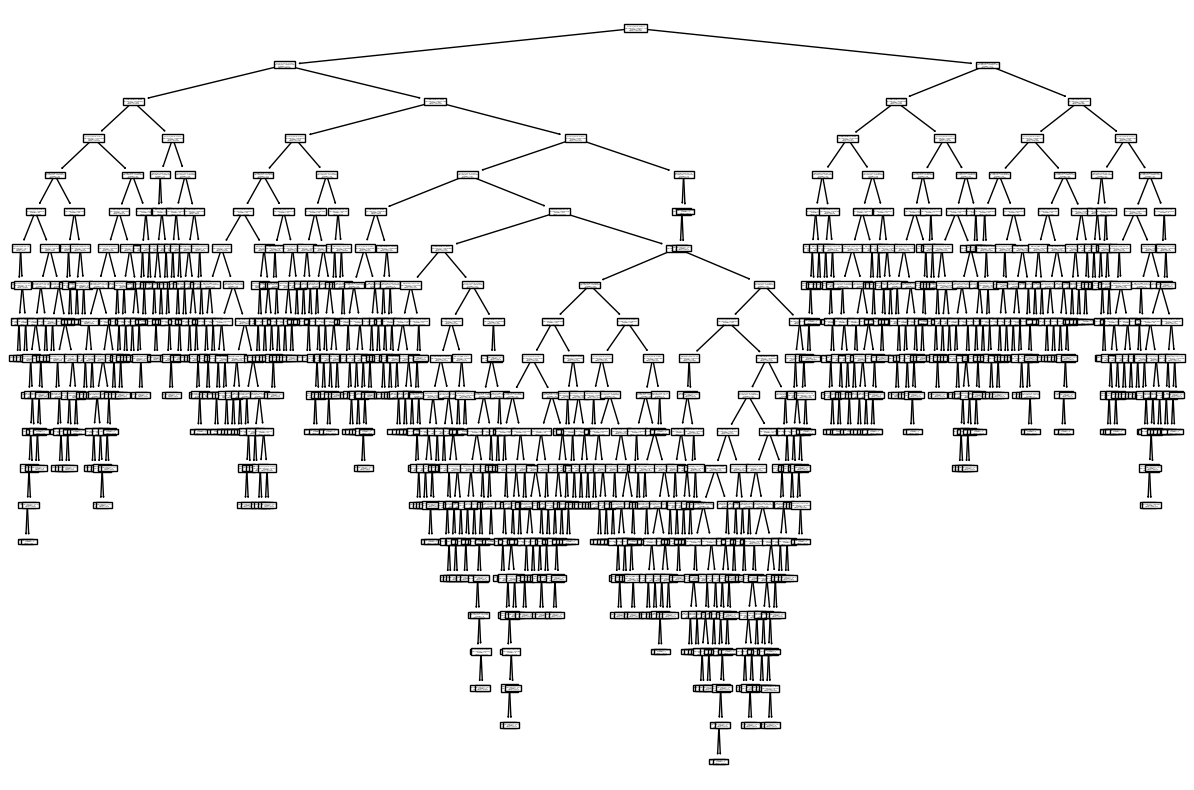

Mean Squared Error:  8663.88628285856
RMSE:  93.07999937074861
Mean Absolute Error:  35.65630357142857
Depth = 20
Num Leaves = 579


In [261]:
# Create decision tree regressor object.
dtr = DecisionTreeRegressor(random_state = 42)

# Train the decision tree.
dtr = dtr.fit(X_train, y_train)

# Predict the response for test dataset.
y_pred = dtr.predict(X_test)

# Display the tree
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
plot_tree(dtr, feature_names = X.columns)
plt.show()

# Calculate and display evaluation metrics and parameters.
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print('Depth =', dtr.get_depth())
print('Num Leaves =', dtr.get_n_leaves())

In [263]:
# View model parameters.
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**COMMENT:** this model is very deep and complex, can it be simplified?

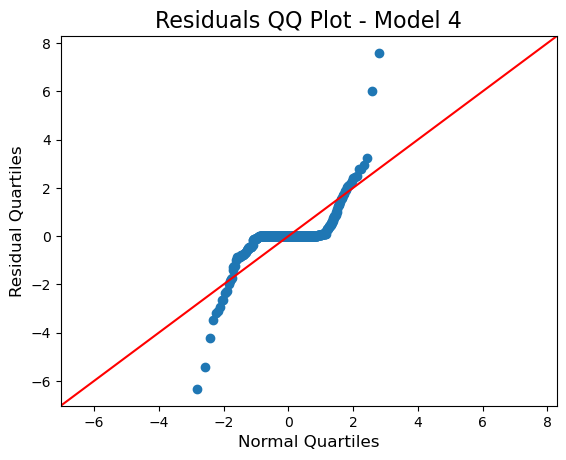

In [266]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Residuals QQ Plot - Model 4', True)

**COMMENT:** residuals not normally distributed.

### Notes and observations

MODEL 3 vs MODEL 4:
- R-squared value: 0.830, not available for Model 4 Ddecision tree
- MSE: 300944 vs 12251
- MAE: 430 vs 42

Based on the above, `retain MODEL 3 as the better model`.  Although the decision tree explains more of the variation by having lower MSE and MAE results the plot of residuals is concerning.  In addiiton the model is very complicated from a staekholder perspective and am concerned about overfitting.<br>
Next step, try to simplify the model.


### MODEL 5 DecTree (important variables only, run to bottom, no pruning)

#### Determine what's important

In [273]:
# Review feature importance
importances = pd.DataFrame({'feature': X_train.columns,'importance': np.round(dtr.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False)
importances

feature  importance
0    remuneration       0.503
1  spending_score       0.484
3   age_group_num       0.011
2   education_num       0.001
4     gender_Male       0.001

#### Create a revised data set of important variables only

In [276]:
# Drop unimportant independent variables from X (no need to change y).
X2 = X.copy().drop(columns = ['age_group_num', 'education_num', 'gender_Male'])

# Check X is as expected.
X2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [278]:
# Split the data 70:30 for training and testing the model.
X_train, X_test, y_train, y_test = train_test_split(X2, y, train_size = 0.7, random_state = 42)

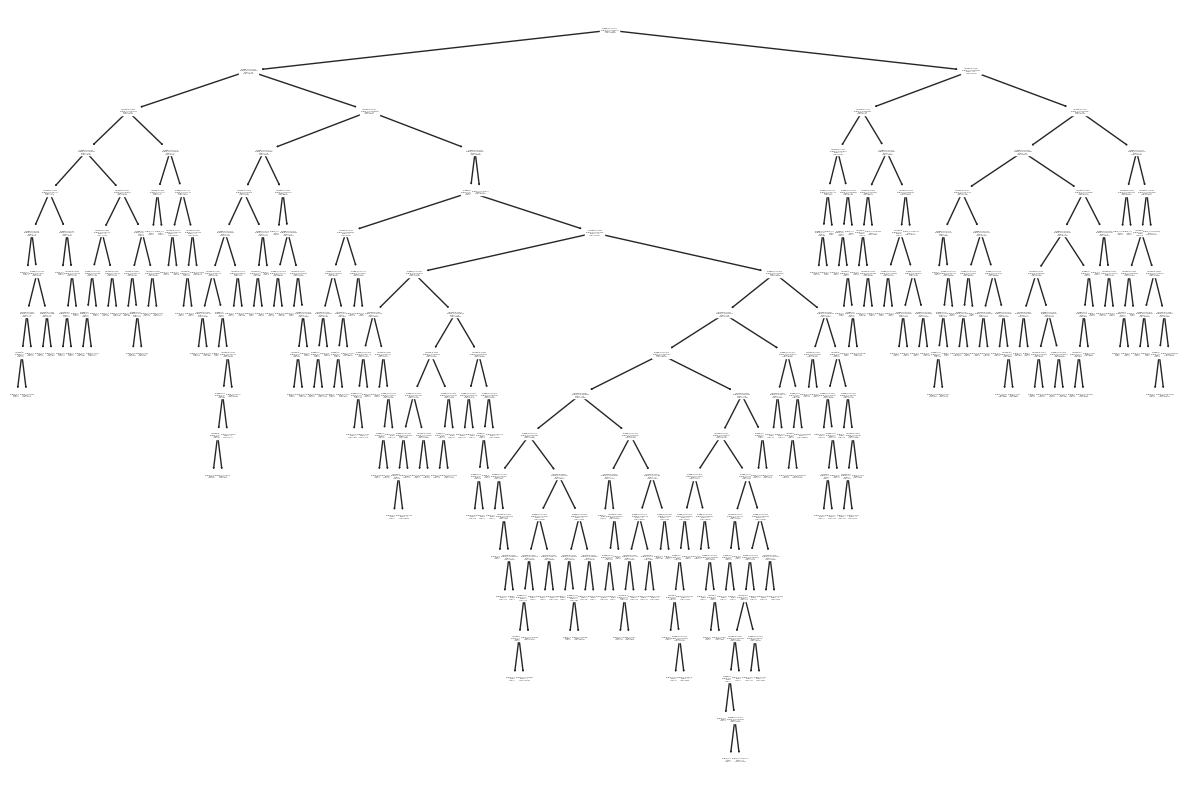

Mean Squared Error:  26097.98366433656
RMSE:  161.54870369129105
Mean Absolute Error:  83.27339035039036
Depth = 18
Num Leaves = 196


In [280]:
# Create decision tree regressor object.
dtr = DecisionTreeRegressor(random_state = 42)

# Train the decision tree.
dtr = dtr.fit(X_train, y_train)

# Predict the response for test dataset.
y_pred = dtr.predict(X_test)

# Display the tree
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid') #Note: this can be any option for set_style
plt.figure()
plot_tree(dtr, feature_names = X.columns)
plt.show()

# Calculate and display evaluation metrics and parameters.
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print('Depth =', dtr.get_depth())
print('Num Leaves =', dtr.get_n_leaves())

In [281]:
# View baseline model parameters.
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

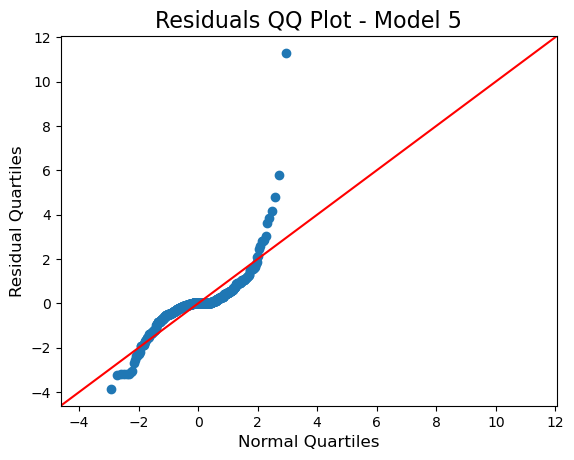

In [284]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Residuals QQ Plot - Model 5', True)

**COMMENT:** residuals not normally distributed.

### Notes and observations

MODEL 3 vs MODEL 5:
- R-squared value: 0.830, not available for Model 5 Ddecision tree
- MSE: 300944 vs 26098 (vs 12251 Model 4)
- MAE: 430 vs 83 (vs 42 Model 4)

Although the decision tree explains more of the variation by having lower MSE and MAE results the plot of residuals is concerning.  In addiiton the model is still very complicated from a staekholder perspective and am concerned about overfitting.<br>
Next step, try to simplify the model further.

### Determine optimal levels of depth and number of leaves

#### Determine optimal depth

Text(0.5, 1.0, 'DecTree: MSE by Depth')

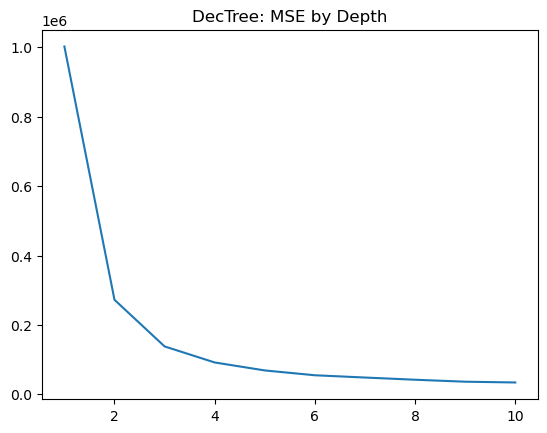

In [291]:
# Determine the optimal value for max depth.
# List of values to try for max_depth.
#max_depth_range = list(range(1, 15))
max_depth_range = list(range(1, 11))

# List to store the accuracy for each value of max_depth:
MSE = []
depth = []
for each_value in max_depth_range:
    
    reg_tmp = DecisionTreeRegressor(max_depth = each_value, random_state = 42)
    reg_tmp.fit(X_train, y_train)
    y_pred_tmp = reg_tmp.predict(X_test)
    score = metrics.mean_squared_error(y_test, y_pred_tmp)
    MSE.append(score)
    depth.append(each_value)

sns.lineplot(x = depth, y = MSE).set_title('DecTree: MSE by Depth')

**COMMENT:** elbow appears to occur at a depth of 3, but worth trying either side at 2 and 4.

#### Determine optimal number of leaves at depth of 2, 4 and 6

Text(0.5, 1.0, 'DecTree: MSE by Min Samples per Leaf (Depth = 2)')

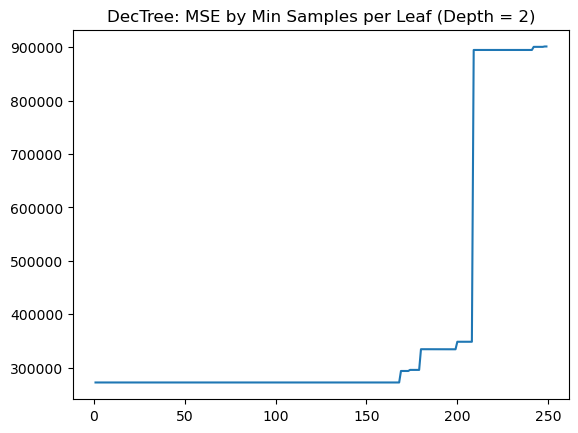

In [295]:
# Determine the optimal value for number of leaves.
# List of values to try for max_depth.
leaf_range = list(range(1, 250))
#leaf_range = list(range(1, 15))

# Lists to store the accuracy for each value of leaves:
MSE = []
leaves = []
for each_value in leaf_range:
    
    reg_tmp = DecisionTreeRegressor(min_samples_leaf = each_value, max_depth = 2, random_state = 42)
    reg_tmp.fit(X_train, y_train)
    y_pred_tmp = reg_tmp.predict(X_test)
    score = metrics.mean_squared_error(y_test, y_pred_tmp)
    MSE.append(score)
    leaves.append(each_value)

sns.lineplot(x = leaves, y = MSE).set_title('DecTree: MSE by Min Samples per Leaf (Depth = 2)')

Text(0.5, 1.0, 'DecTree: MSE by Min Samples per Leaf  (Depth = 3)')

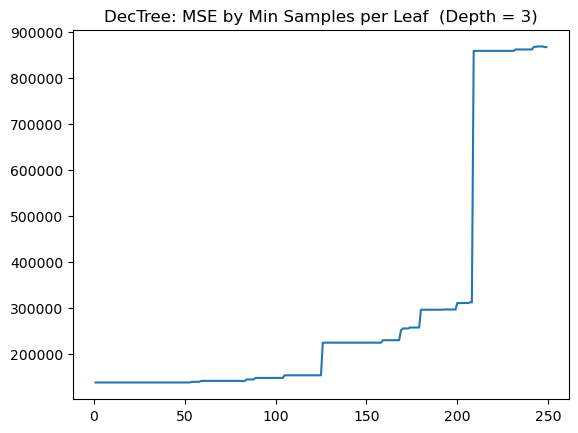

In [296]:
# Determine the optimal value for number of leaves.
# List of values to try for max_depth.
leaf_range = list(range(1, 250))
#leaf_range = list(range(1, 11))

# Lists to store the accuracy for each value of leaves:
MSE = []
leaves = []
for each_value in leaf_range:
    
    reg_tmp = DecisionTreeRegressor(min_samples_leaf = each_value, max_depth = 3, random_state = 42)
    reg_tmp.fit(X_train, y_train)
    y_pred_tmp = reg_tmp.predict(X_test)
    score = metrics.mean_squared_error(y_test, y_pred_tmp)
    MSE.append(score)
    leaves.append(each_value)

sns.lineplot(x = leaves, y = MSE).set_title('DecTree: MSE by Min Samples per Leaf  (Depth = 3)')

Text(0.5, 1.0, 'DecTree: MSE by Min Samples per Leaf (Depth = 4)')

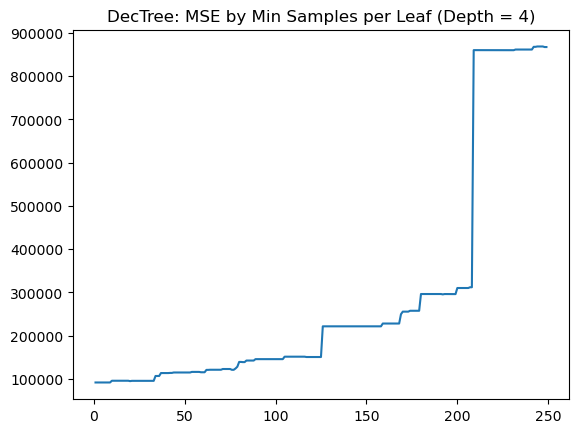

In [299]:
# Determine the optimal value for number of leaves.
# List of values to try for max_depth.
leaf_range = list(range(1, 250))
#leaf_range = list(range(1, 11))

# Lists to store the accuracy for each value of leaves:
MSE = []
leaves = []
for each_value in leaf_range:
    
    reg_tmp = DecisionTreeRegressor(min_samples_leaf = each_value, max_depth = 4, random_state = 42)
    reg_tmp.fit(X_train, y_train)
    y_pred_tmp = reg_tmp.predict(X_test)
    score = metrics.mean_squared_error(y_test, y_pred_tmp)
    MSE.append(score)
    leaves.append(each_value)

sns.lineplot(x = leaves, y = MSE).set_title('DecTree: MSE by Min Samples per Leaf (Depth = 4)')

**COMMENTS:**
- at depth = 2, min samples per of leaves has no impact on MSE until ~170, MSE ~ 272,000
- at depth = 3, min samples per of leaves has no impact on MSE until ~125, MSE ~ 100,000
- at depth = 4, min samples per of leaves has a gradual impact on MSE until ~125, MSE ~ 150,000 

Concerned about over fitting.  MODEL 3 (MLR) had MSE ~ 300,000 with Rsq 0.830.

**DECISION:** going to `discard depth = 4` and run decision trees with depth of 2 and 3 with num leaves = 150 and 125 respectively .  Then evaluate vs MODEL 3.

### MODEL 6 DecTree (important variables only, depth = 2, min samples per leaf = 150)

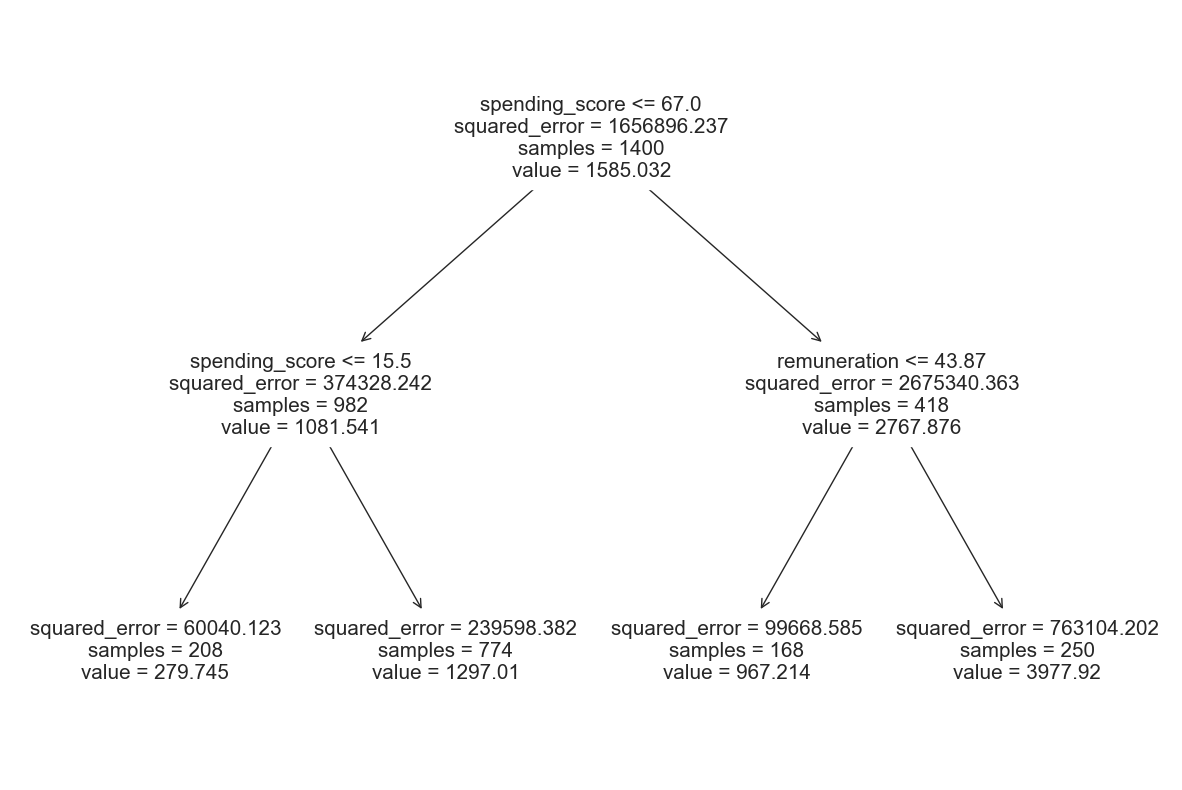

Mean Squared Error:  272343.70689986704
RMSE:  521.86560233442
Mean Absolute Error:  377.185642925765
Depth = 2
Num Leaves = 4


In [302]:
# Create decision tree regressor object.
dtr = DecisionTreeRegressor(max_depth = 2, min_samples_leaf = 150, random_state = 42)

# Train the decision tree.
dtr = dtr.fit(X_train, y_train)

# Predict the response for test dataset.
y_pred = dtr.predict(X_test)

# Display the tree
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid') #Note: this can be any option for set_style
plt.figure()
plot_tree(dtr, feature_names = X.columns)
plt.show()

# Calculate and display evaluation metrics and parameters.
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print('Depth =', dtr.get_depth())
print('Num Leaves =', dtr.get_n_leaves())

In [303]:
# View baseline model parameters.
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 150,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

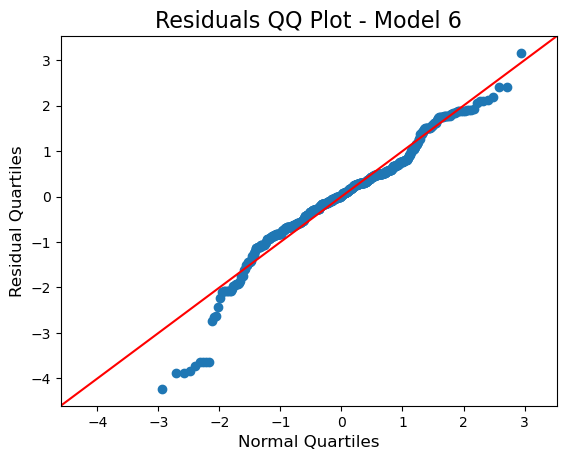

In [305]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Residuals QQ Plot - Model 6', True)

**COMMENT:** residuals not normally distributed.

### Notes and observations

MODEL 3 vs MODEL 6:
- R-squared value: 0.830, not available for Model 5 Ddecision tree
- MSE: 300944 vs 272344 (vs 26098 Model 5)
- MAE: 430 vs 377 (vs 83 Model 5)

This has resulted in a much less complictaed model from a stakeholder perspective (acceptable).  Although the decision tree explains more of the variation by having lower MSE and MAE results the plot of residuals is concerning.

### MODEL 7 DecTree (important variables only, depth = 3, min samples per leaf = 125)

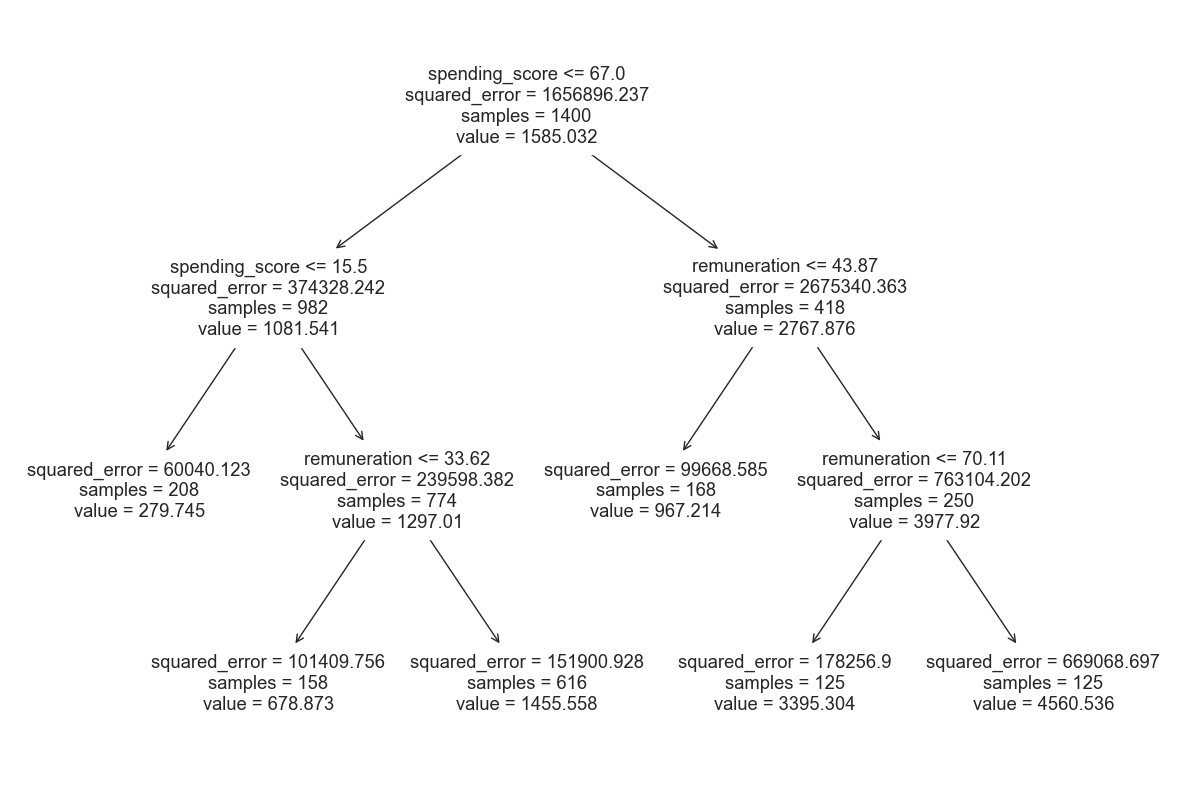

Mean Squared Error:  153559.89271939418
RMSE:  391.867187602374
Mean Absolute Error:  293.7275784595573
Depth = 3
Num Leaves = 6


In [313]:
# Create decision tree regressor object.
dtr = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 125, random_state = 42)

# Train the decision tree.
dtr = dtr.fit(X_train, y_train)

# Predict the response for test dataset.
y_pred = dtr.predict(X_test)

# Display the tree
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid') #Note: this can be any option for set_style
plt.figure()
plot_tree(dtr, feature_names = X.columns)
plt.show()

# Calculate and display evaluation metrics and parameters.
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print('Depth =', dtr.get_depth())
print('Num Leaves =', dtr.get_n_leaves())

In [314]:
# View baseline model parameters.
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 125,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

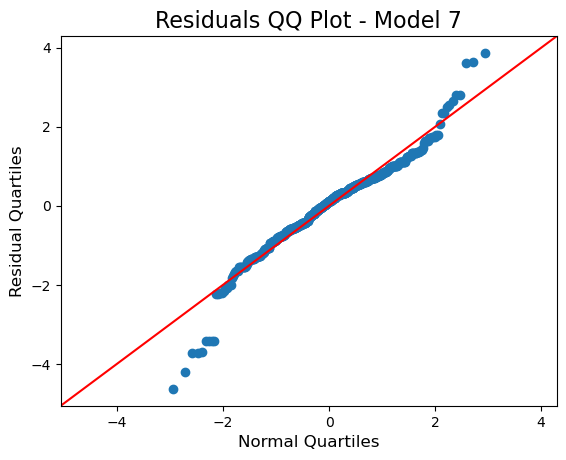

In [315]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Residuals QQ Plot - Model 7', True)

**COMMENT:** residuals not normally distributed.

### Notes and observations

MODEL 3 vs MODEL 7:
- R-squared value: 0.830, not available for Model 5 Ddecision tree
- MSE: 300944 vs 153560 (vs 272344 Model 5)
- MAE: 430 vs 294 (vs 377 Model 5)

This has resulted in a much less complictaed model from a stakeholder perspective (acceptable).  Although the decision tree explains more of the variation by having lower MSE and MAE results the plot of residuals is concerning.

## Recommendation

Based on the above analysis of 7 predictive models, three models appear to be candidates for the stakeholder group (Models 3, 6 and 7).  However, the deciding factor for is the residual plots of which `Model 3` has the most normal distribution and therefore `is the recommended model`.  This is in line with the risk mitigation due to non normality of loyalty points.

# Cluster Analysis - K-Means

In [325]:
# Import the basic python libraries.
import pandas as pd
import numpy as np

# Import the python libraries for visualisation.
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import seaborn as sns

# Import the python libraries for statistical analysis and modelling.
from scipy.stats import pearsonr

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import the data

In [328]:
# Import additional required libraries.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import math

# Import the KMeans class.
from sklearn.cluster import KMeans

In [330]:
# Reset: make sure using the full set of the correct version of the data.
trv3 = pd.read_csv('turtle_reviews_v3.csv')

print(trv3.info())
trv3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
 10  education_num   2000 non-null   int64  
 11  age_group_num   2000 non-null   int64  
 12  gender_Male     2000 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 203.3+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  \
0  The fact that 50% of this space is wasted on a...  30 & Below   
1  Another worthless Dungeon Master's screen from...  30 & Below   
2                    pretty, but also pretty useless  30 & Below   
3                                         Five Stars  30 & Below   
4                                         Money trap       30-39   

   education_num  age_group_num  gender_Male  
0              2              0            1  
1              2              0            1  
2              2              0            0  
3              2              0            0  
4              2              1            0

## Visualise potential clusters

Text(0.5, 1.0, 'Spending Score vs Remuneration')

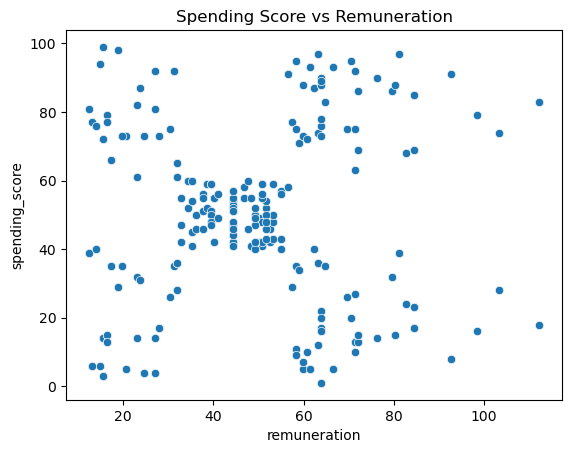

In [333]:
# Review the scatterplot of remuneration and spending_score.
sns.scatterplot(x = 'remuneration', y = 'spending_score', data = trv3)\
    .set_title('Spending Score vs Remuneration')

Text(65, 80, 'Cluster 5')

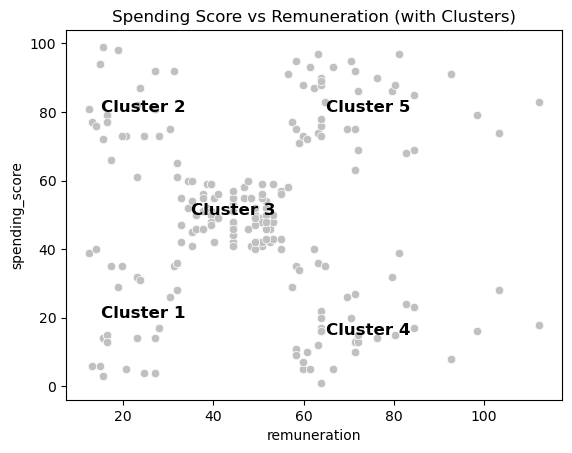

In [335]:
# Review the scatterplot of remuneration and spending_score.
sns.scatterplot(x = 'remuneration', y = 'spending_score', data = trv3,
                     color = 'silver')\
                     .set_title('Spending Score vs Remuneration (with Clusters)')
# Add annotations.
plt.text(15, 20, 'Cluster 1', fontweight = 'bold', fontsize = 'large')
plt.text(15, 80, 'Cluster 2', fontweight = 'bold', fontsize = 'large')
plt.text(35, 50, 'Cluster 3', fontweight = 'bold', fontsize = 'large')
plt.text(65, 15, 'Cluster 4', fontweight = 'bold', fontsize = 'large')
plt.text(65, 80, 'Cluster 5', fontweight = 'bold', fontsize = 'large')


**COMMENT:** Based on this initial scatterplot it appears there may be 5 clusters.

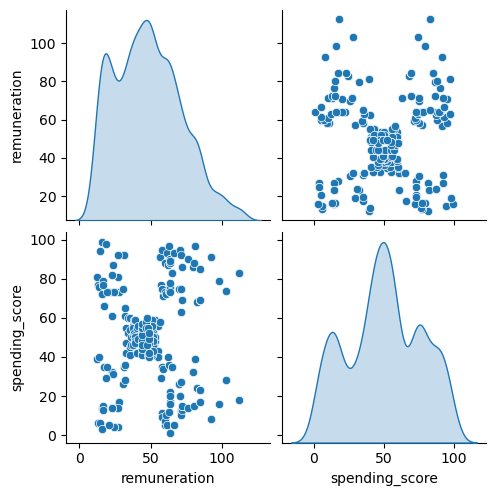

In [337]:
# Create a pairplot with Seaborn.
x_vals = trv3[['remuneration', 'spending_score']]

sns.pairplot(data = trv3, vars = x_vals, diag_kind = 'kde')

## Determine number of clusters k

### Elbow method

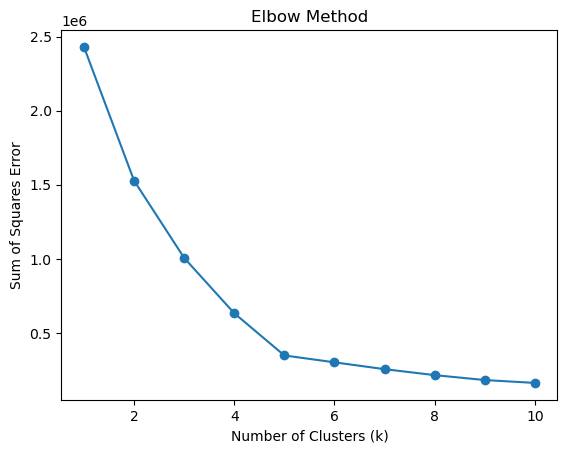

In [342]:
# Create amd elbow chart for us to decide on the number of optimal clusters.
# Prepare the data.
ss = []
for each_value in range(1, 11):
    kmeans = KMeans(n_clusters = each_value,
                    init = 'k-means++',
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x_vals)
    ss.append(kmeans.inertia_)

# Plot the elbow chart.
plt.plot(range(1, 11), ss, marker = 'o')

# Customise the chart.
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares Error')

plt.show()

**COMMENT:** elbow likely to occur in range 4 to 6 clusters.

### Silhouette method

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

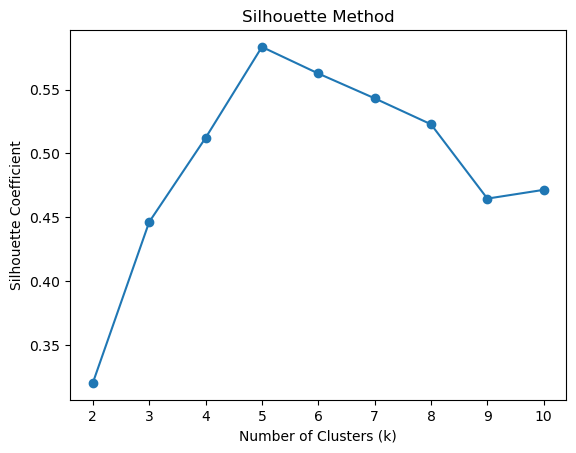

In [346]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for each_value in range(2, (kmax + 1)):
    kmeans_s = KMeans(n_clusters = each_value).fit(x_vals)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x_vals, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, (kmax + 1)), sil, marker = 'o')

# Insert labels and title.
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')

plt.show()

**COMMENT:** highest silhouette scores in range of 4 to 7 clusters.

### Conclusion

Based on Elbow and Silhouette methods conduct kMeans analysis using k = 4, 5 and 6 and determine best fit model.

## K-Means cluster modelling

### Cluster Model 1 (`k = 4`)

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/j_/nn1z74dn1f701mdlfm07w3w40000gn/T/ipykernel_40478/3201106069.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vals['K-Means Predicted'] = clusters


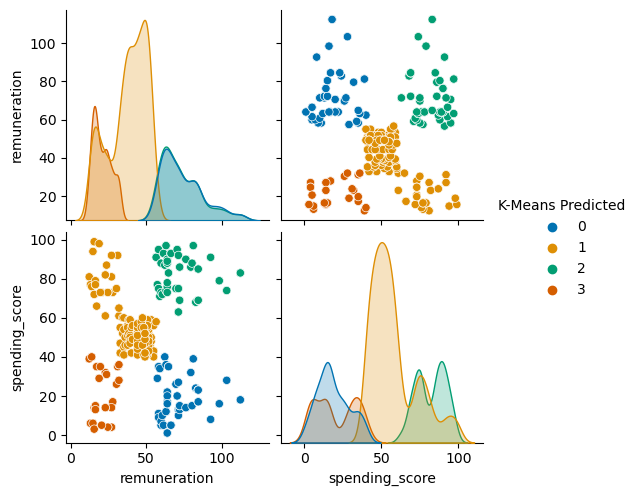

In [655]:
# Run kMeans with 4 clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x_vals)

clusters = kmeans.labels_

x_vals['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x_vals,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

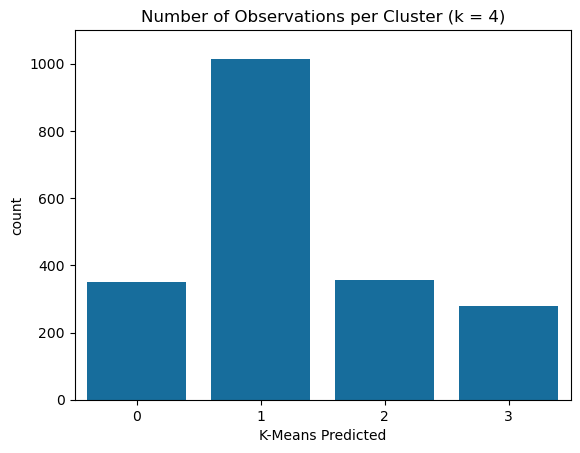

In [657]:
# Check the number of observations per predicted class.
fig, ax = plt.subplots()
sns.countplot(data = x_vals, x = 'K-Means Predicted', color = my_dblue)\
    .set_title('Number of Observations per Cluster (k = 4)')
ax.set_ylim(0, 1100)
plt.show()

Text(0.5, 1.0, 'Spending Score vs Remuneration (kMeans k =4)')

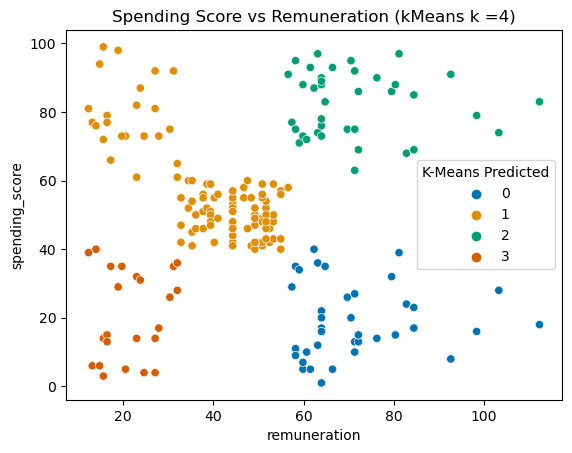

In [356]:
# Visualising the clusters.
# Set plot size.
plt.rcParams['figure.figsize'] = [6.4, 4.8]
# Create a scatterplot.
sns.scatterplot(x = 'remuneration' , 
                y = 'spending_score',
                data = x_vals,
                hue = 'K-Means Predicted',
                palette = 'colorblind').set_title('Spending Score vs Remuneration (kMeans k =4)')

### Cluster Model 2 (`k = 5`)

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/j_/nn1z74dn1f701mdlfm07w3w40000gn/T/ipykernel_40478/2913850420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vals['K-Means Predicted'] = clusters


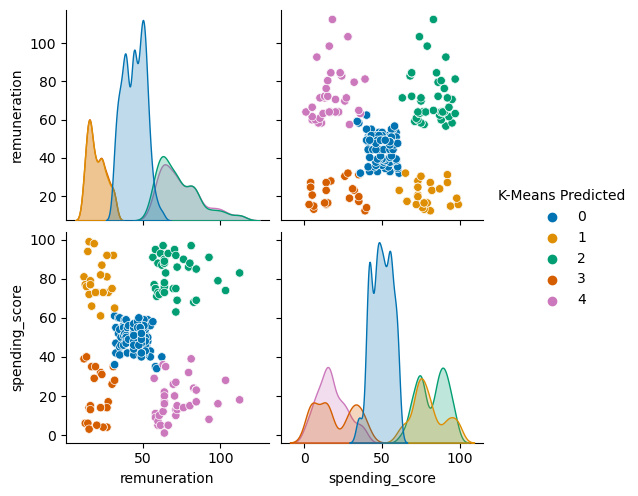

In [358]:
# Run kMeans with 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x_vals)

clusters = kmeans.labels_

x_vals['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x_vals,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

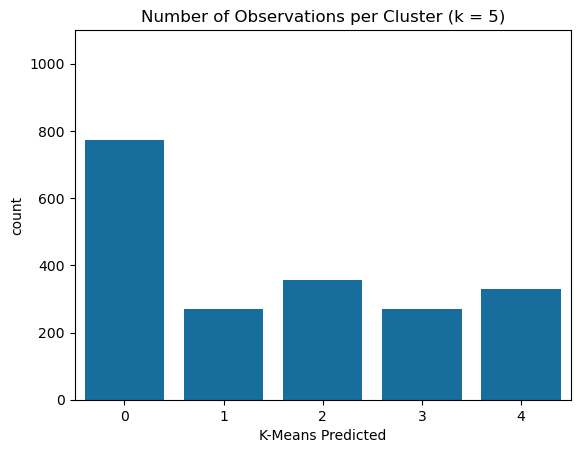

In [364]:
# Check the number of observations per predicted class.
fig, ax = plt.subplots()
sns.countplot(data = x_vals, x = 'K-Means Predicted', color = my_dblue)\
    .set_title('Number of Observations per Cluster (k = 5)')
ax.set_ylim(0, 1100)
plt.show()

Text(0.5, 1.0, 'Spending Score vs Remuneration (kMeans k = 5)')

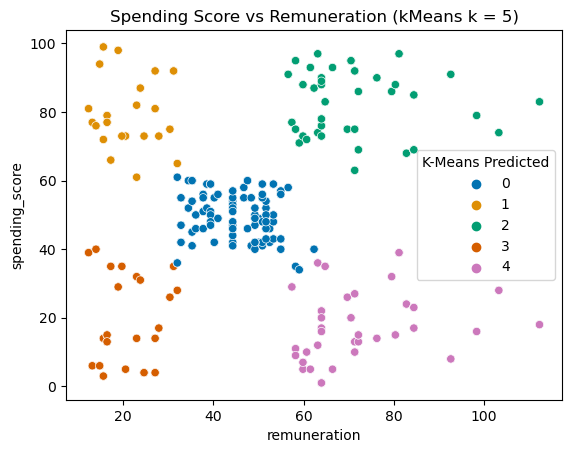

In [366]:
# Visualising the clusters.
# Set plot size.
plt.rcParams['figure.figsize'] = [6.4, 4.8]
# Create a scatterplot.
sns.scatterplot(x = 'remuneration' , 
                y = 'spending_score',
                data = x_vals,
                hue = 'K-Means Predicted',
                palette = 'colorblind').set_title('Spending Score vs Remuneration (kMeans k = 5)')

### Cluster Model 3 (`k = 6`)

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/j_/nn1z74dn1f701mdlfm07w3w40000gn/T/ipykernel_40478/3608352390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vals['K-Means Predicted'] = clusters


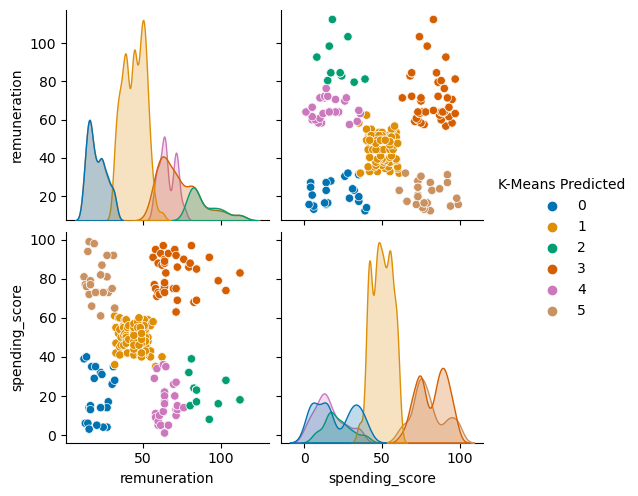

In [369]:
# Run kMeans with 6 clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x_vals)

clusters = kmeans.labels_

x_vals['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x_vals,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

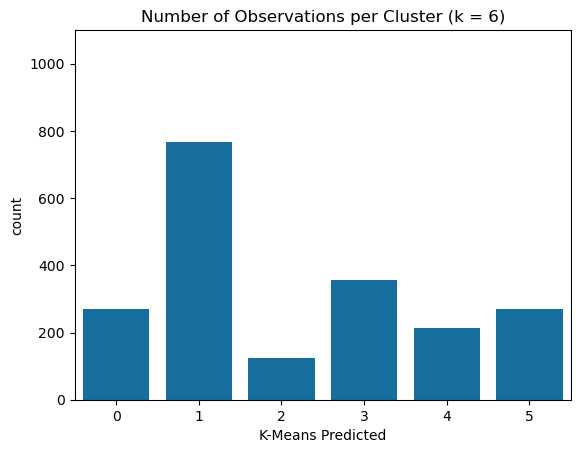

In [373]:
# Check the number of observations per predicted class.
fig, ax = plt.subplots()
sns.countplot(data = x_vals, x = 'K-Means Predicted', color = my_dblue)\
    .set_title('Number of Observations per Cluster (k = 6)')
ax.set_ylim(0, 1100)
plt.show()

Text(0.5, 1.0, 'Spending Score vs Remuneration (kMeans k = 6)')

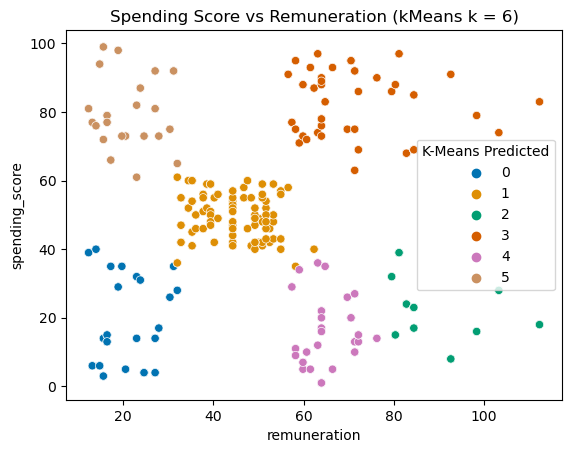

In [375]:
# Visualising the clusters.
# Set plot size.
plt.rcParams['figure.figsize'] = [6.4, 4.8]
# Create a scatterplot.
sns.scatterplot(x = 'remuneration' , 
                y = 'spending_score',
                data = x_vals,
                hue = 'K-Means Predicted',
                palette = 'colorblind').set_title('Spending Score vs Remuneration (kMeans k = 6)')

### Notes and observations

There is a clearly visible central cluster.  Question is how may other clusters are there?

All of the cluster models have one cluster that has a significantly higher number of data points that the others (2-3 times higher) which is the central cluster.  Model 2 has reasonable balance of observations and looks most logical.  Go with Model 2.

### How does Cluster Model 2 relate to loyalty points?

### Reset the data modelling to k = 5

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/j_/nn1z74dn1f701mdlfm07w3w40000gn/T/ipykernel_40478/2913850420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vals['K-Means Predicted'] = clusters


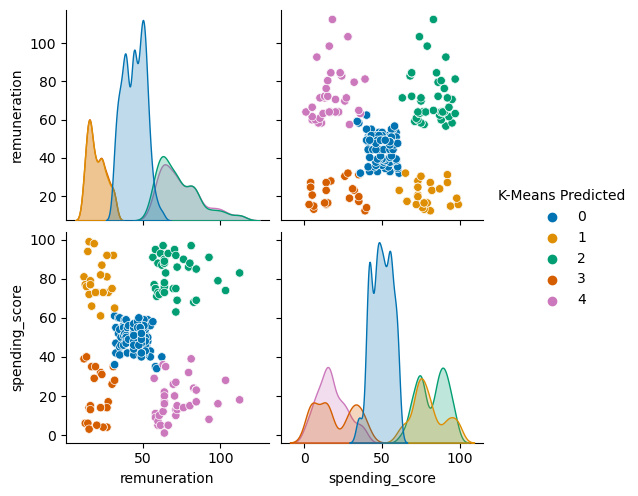

In [381]:
# Run kMeans with 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x_vals)

clusters = kmeans.labels_

x_vals['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x_vals,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

In [382]:
# Determine where centre of the clusters are for potential use later on.
centres = pd.DataFrame(kmeans.cluster_centers_, columns = ['X', 'Y', 'NA'])

# View the poistion of the cluster centres.
centres

X          Y            NA
0  44.418786  49.529716  1.027132e+00
1  20.353680  79.416357  5.000000e+00
2  73.240281  82.008427  3.000000e+00
3  20.424354  19.763838  8.881784e-16
4  74.831212  17.424242  3.254545e+00

### Merge the cluster data with the original data and save

In [386]:
# Create a new data frame to merge original data with x_vals
new_df = pd.merge(trv3, x_vals, left_index = True, right_index = True)

In [388]:
# View the metadata and a sample of the data.
print(new_df.info())
new_df.sample(n = 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   age                2000 non-null   int64  
 2   remuneration_x     2000 non-null   float64
 3   spending_score_x   2000 non-null   int64  
 4   loyalty_points     2000 non-null   int64  
 5   education          2000 non-null   object 
 6   product            2000 non-null   int64  
 7   review             2000 non-null   object 
 8   summary            2000 non-null   object 
 9   age_group          2000 non-null   object 
 10  education_num      2000 non-null   int64  
 11  age_group_num      2000 non-null   int64  
 12  gender_Male        2000 non-null   int64  
 13  remuneration_y     2000 non-null   float64
 14  spending_score_y   2000 non-null   int64  
 15  K-Means Predicted  2000 non-null   int32  
dtypes: float64(2), int32(1),

gender  age  remuneration_x  spending_score_x  loyalty_points  \
1615    Male   24           37.72                56            1143   
355   Female   29           63.96                89            3478   
1430    Male   62           49.20                52            1788   
1311  Female   18           51.66                54            1222   
1237  Female   32           27.88                73            1314   

          education  product  \
1615       Graduate     3878   
355   Post Graduate     4702   
1430            PhD     3955   
1311       Graduate     2877   
1237  Post Graduate     3955   

                                                 review  \
1615  It would have been nice if they had a Velcro p...   
355   A friend of my daughters was making these pups...   
1430                                          SUPER FUN   
1311  Great game if you enjoy euro games. We play al...   
1237  This resource was a  great help in running D&D...   

                                 summary   age_group  education_num  \
1615     little old lady, what can I say  30 & Below              2   
355          Great for the crafty child!  30 & Below              3   
1430                          Five Stars       60-69              4   
1311  Great game if you enjoy euro games  30 & Below              2   
1237              Easy to use Master Set       30-39              3   

      age_group_num  gender_Male  remuneration_y  spending_score_y  \
1615              0            1           37.72                56   
355               0            0           63.96                89   
1430              4            1           49.20                52   
1311              0            0           51.66                54   
1237              1            0           27.88                73   

      K-Means Predicted  
1615                  0  
355                   2  
1430                  0  
1311                  0  
1237                  1

#### Remove duplicate columns

In [391]:
# Drop duplicate columns *_y and rename columns *_x.
new_df.drop(columns = ['remuneration_y', 'spending_score_y'], inplace = True)

new_df.rename(columns = {'remuneration_x': 'remuneration',
                      'spending_score_x': 'spending_score',
                      'K-Means Predicted': 'kMean_cluster'}, inplace = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
 10  education_num   2000 non-null   int64  
 11  age_group_num   2000 non-null   int64  
 12  gender_Male     2000 non-null   int64  
 13  kMean_cluster   2000 non-null   int32  
dtypes: float64(1), int32(1), int64(7), object(5)
memory usage: 211.1+ KB


#### Give the clusters names rather than numbers

In [394]:
# Create a list of conditions.
conditions = [
    (new_df['kMean_cluster'] == 0),
    (new_df['kMean_cluster'] == 1),
    (new_df['kMean_cluster'] == 2),
    (new_df['kMean_cluster'] == 3),
    (new_df['kMean_cluster'] == 4)
    ]

# Create a list of the values we want to assign for each condition
values = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']

# Print value counts before.
print('Before', new_df['kMean_cluster'].value_counts(), '\n')

# Update education column using np.select to assign values.
new_df['cluster_name'] = np.select(conditions, values)

# Check the change worked, print value counts after.
print('After', new_df['cluster_name'].value_counts())

Before kMean_cluster
0    774
2    356
4    330
3    271
1    269
Name: count, dtype: int64 

After cluster_name
Alpha      774
Gamma      356
Epsilon    330
Delta      271
Beta       269
Name: count, dtype: int64


In [396]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
 10  education_num   2000 non-null   int64  
 11  age_group_num   2000 non-null   int64  
 12  gender_Male     2000 non-null   int64  
 13  kMean_cluster   2000 non-null   int32  
 14  cluster_name    2000 non-null   object 
dtypes: float64(1), int32(1), int64(7), object(6)
memory usage: 226.7+ KB


#### Save a this data frame as a new version of file (for efficiency)

In [399]:
# Save clean data frame to new csv file without the index.
new_df.to_csv('turtle_reviews_v4.csv', index = False)

#### Load modified turtle review file

In [402]:
# Import the data and view meta data and data.
trv4 = pd.read_csv('turtle_reviews_v4.csv')

print(trv4.info())
trv4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
 10  education_num   2000 non-null   int64  
 11  age_group_num   2000 non-null   int64  
 12  gender_Male     2000 non-null   int64  
 13  kMean_cluster   2000 non-null   int64  
 14  cluster_name    2000 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 234.5+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  \
0  The fact that 50% of this space is wasted on a...  30 & Below   
1  Another worthless Dungeon Master's screen from...  30 & Below   
2                    pretty, but also pretty useless  30 & Below   
3                                         Five Stars  30 & Below   
4                                         Money trap       30-39   

   education_num  age_group_num  gender_Male  kMean_cluster cluster_name  
0              2              0            1              3        Delta  
1              2              0            1              1         Beta  
2              2              0            0              3        Delta  
3              2              0            0              1         Beta  
4              2              1            0              3        Delta

Text(0.5, 1.0, 'Loyalty Points vs K-Means Cluster')

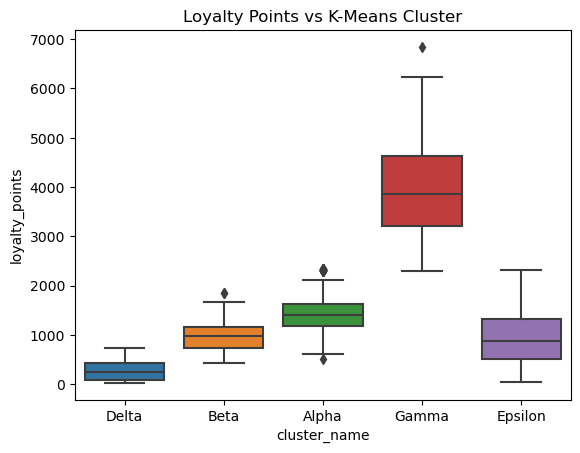

In [404]:
# Plot boxplot of loyalty_points by cluster name.
sns.boxplot(y = 'loyalty_points', x = 'cluster_name',
            data = new_df).set_title('Loyalty Points vs K-Means Cluster')

Text(0.5, 1.0, 'Spending Score vs Remuneration by Cluster')

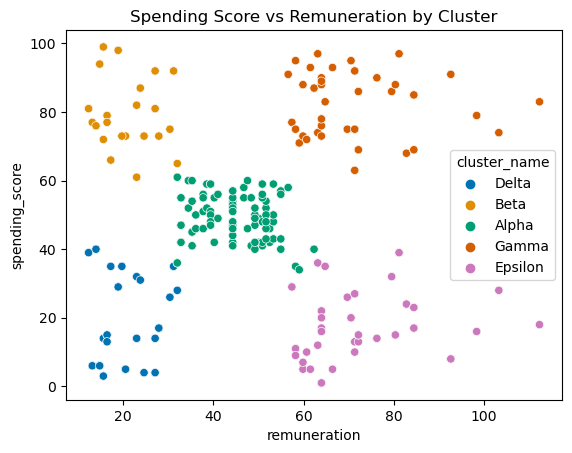

In [406]:
# Visualising the clusters.
# Set plot size.
plt.rcParams['figure.figsize'] = [6.4, 4.8]
# Create a scatterplot.
sns.scatterplot(x = 'remuneration' , 
                y = 'spending_score',
                data = trv4,
                hue = 'cluster_name',
                palette = 'colorblind').set_title('Spending Score vs Remuneration by Cluster')

Text(65, 80, 'Gamma')

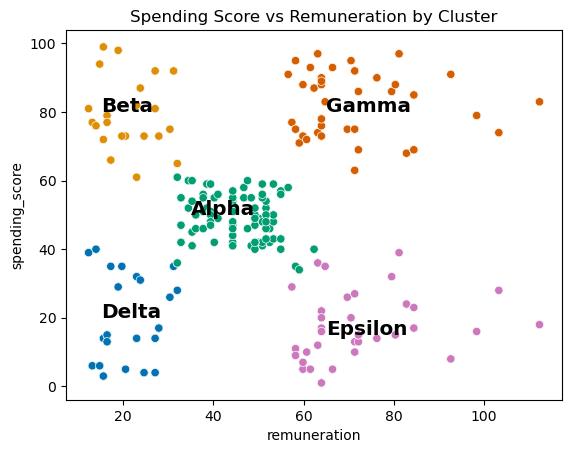

In [407]:
# Visualising the clusters.
# Set plot size.
plt.rcParams['figure.figsize'] = [6.4, 4.8]
# Create a scatterplot.
sns.scatterplot(x = 'remuneration' , 
                y = 'spending_score',
                data = trv4,
                hue = 'cluster_name',
                legend = False,
                palette = 'colorblind').set_title('Spending Score vs Remuneration by Cluster')

# Add annotations.
plt.text(15, 20, 'Delta', fontweight = 'bold', fontsize = 'x-large')
plt.text(15, 80, 'Beta', fontweight = 'bold', fontsize = 'x-large')
plt.text(35, 50, 'Alpha', fontweight = 'bold', fontsize = 'x-large')
plt.text(65, 15, 'Epsilon', fontweight = 'bold', fontsize = 'x-large')
plt.text(65, 80, 'Gamma', fontweight = 'bold', fontsize = 'x-large')

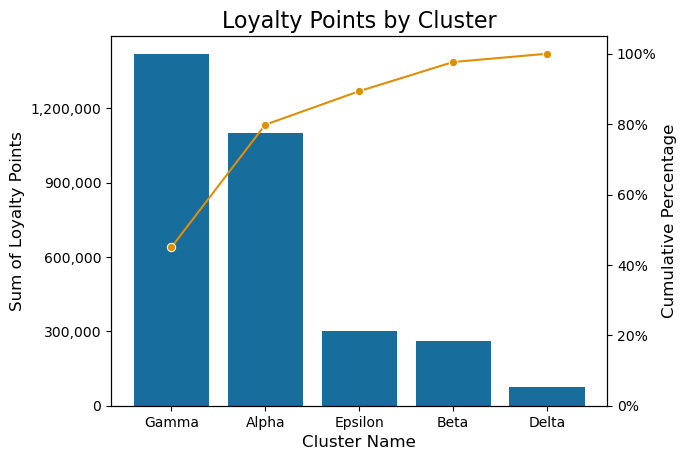

In [408]:
# Plot a Paretochart of loyalty points by cluster name.
pareto_data = trv4[['cluster_name', 'loyalty_points']].copy()
plot_pareto_chart('sum', pareto_data, 'Loyalty Points by Cluster', 'Cluster Name', 'Sum of Loyalty Points', False)

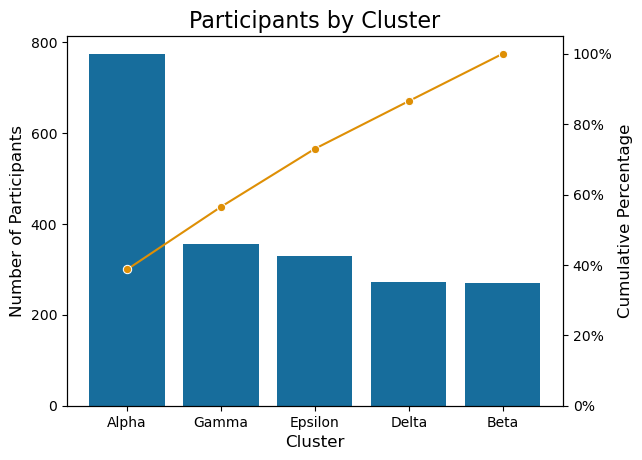

In [410]:
# Plot a Paretochart of participants by education for 30-39.
pareto_data = trv4[['cluster_name', 'age']].copy()
plot_pareto_chart('count', pareto_data, 'Participants by Cluster', 'Cluster', 'Number of Participants', False)

### Can the clusters be described / defined?

              loyalty_points
cluster_name                
Alpha            1420.382429
Beta              971.944238
Delta             275.059041
Epsilon           911.760606
Gamma            3988.238764


Text(0.5, 1.0, 'Loyalty Points by Cluster')

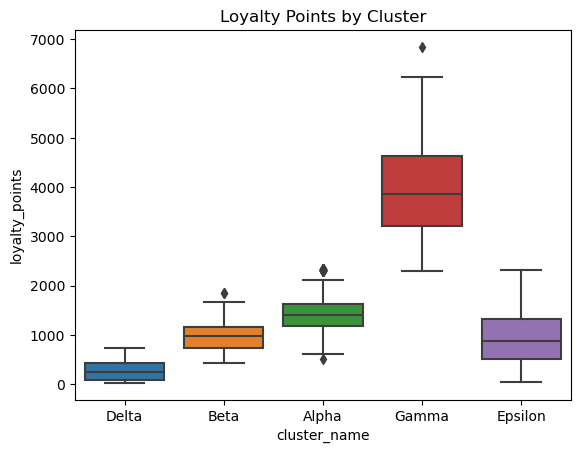

In [415]:
# What is the mean loyalty points by cluster?
print(trv4[['cluster_name', 'loyalty_points']].groupby('cluster_name').mean())

# Plot boxplot of loyalty_points by education.
sns.boxplot(y = 'loyalty_points', x = 'cluster_name',
            data = new_df).set_title('Loyalty Points by Cluster')

              remuneration
cluster_name              
Alpha            44.418786
Beta             20.353680
Delta            20.424354
Epsilon          74.831212
Gamma            73.240281


Text(0.5, 1.0, 'Remuneration by Cluster')

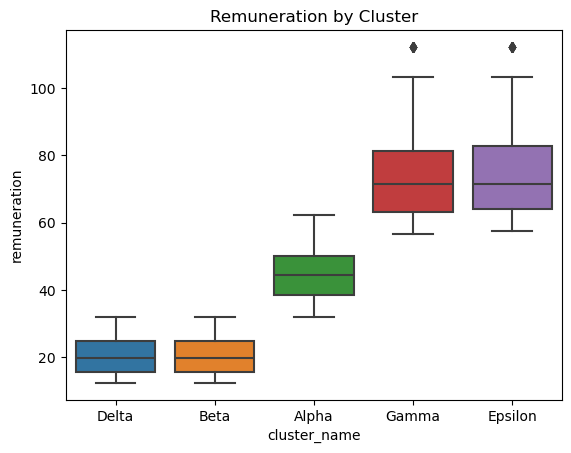

In [416]:
# What is the mean remuneration by cluster?
print(trv4[['cluster_name', 'remuneration']].groupby('cluster_name').mean())

# Plot boxplot of remuneration by education.
sns.boxplot(y = 'remuneration', x = 'cluster_name',
            data = new_df).set_title('Remuneration by Cluster')

              spending_score
cluster_name                
Alpha              49.529716
Beta               79.416357
Delta              19.763838
Epsilon            17.424242
Gamma              82.008427


Text(0.5, 1.0, 'Spending Score by Cluster')

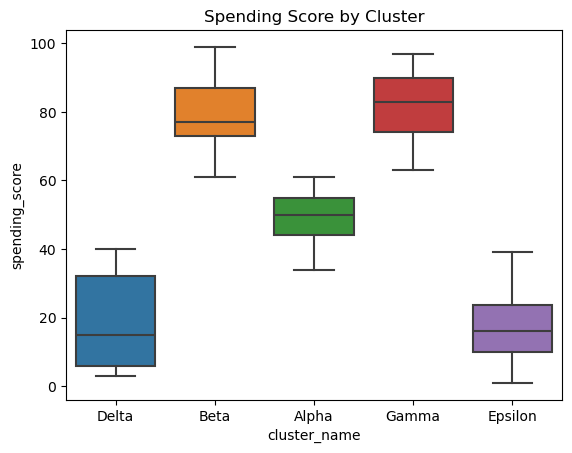

In [418]:
# What is the mean spending score by cluster?
print(trv4[['cluster_name', 'spending_score']].groupby('cluster_name').mean())

# Plot boxplot of spending score by education.
sns.boxplot(y = 'spending_score', x = 'cluster_name',
            data = new_df).set_title('Spending Score by Cluster')

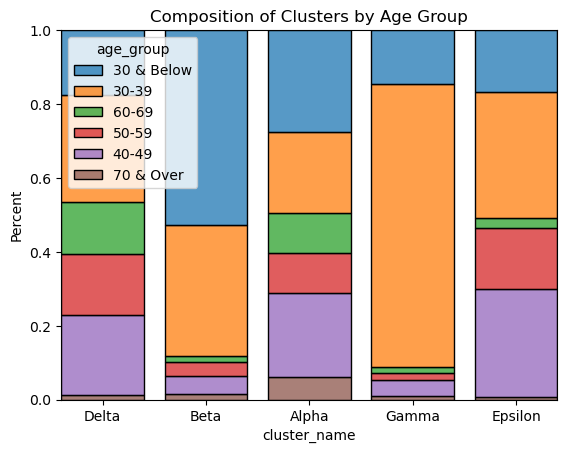

In [421]:
# Plot stacked bar chart to show composition of clusters by age group.
ax = sns.histplot(data = trv4, x = 'cluster_name', hue = 'age_group',
                  multiple = 'fill', stat = 'percent', discrete = True,
                  shrink = .8).set_title('Composition of Clusters by Age Group')

Text(0.5, 1.0, 'Composition of Clusters by Education')

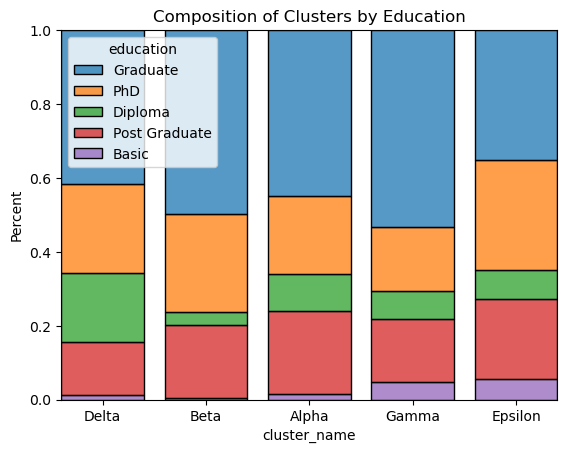

In [422]:
# Plot stacked bar chart to show composition of clusters by education.
sns.histplot(
    data = trv4,
    x = 'cluster_name', hue = 'education',
    multiple = 'fill', stat = 'percent',
    discrete = True, shrink = .8).set_title('Composition of Clusters by Education')

Text(0.5, 1.0, 'Composition of Clusters by Gender')

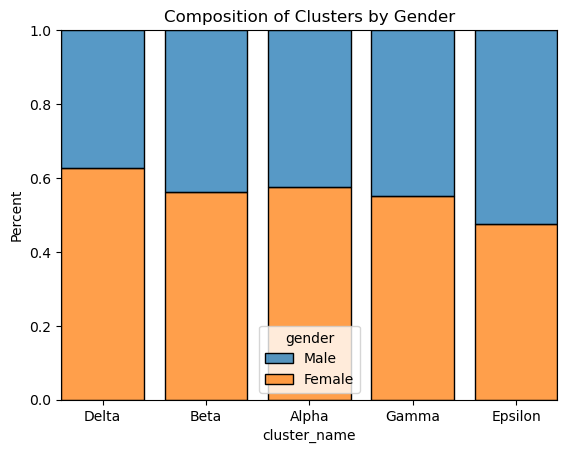

In [423]:
# Plot stacked bar chart to show composition of clusters by education.
sns.histplot(
    data = trv4,
    x = 'cluster_name', hue = 'gender',
    multiple = 'fill', stat = 'percent',
    discrete = True, shrink = .8).set_title('Composition of Clusters by Gender')

### Create a bubble chart for stakeholder review

In [427]:
# Determine where centre of the clusters are.for potential use later on.
centres = pd.DataFrame(kmeans.cluster_centers_, columns = ['X', 'Y', 'NA'])

# View the poistion of the cluster centres.
centres

X          Y            NA
0  44.418786  49.529716  1.027132e+00
1  20.353680  79.416357  5.000000e+00
2  73.240281  82.008427  3.000000e+00
3  20.424354  19.763838  8.881784e-16
4  74.831212  17.424242  3.254545e+00

In [428]:
# Drop the NA column and rename X and Y to remuneration and spending score.
centres.drop(columns = 'NA', inplace = True)
centres.rename(columns = {'X': 'remuneration', 'Y': 'spending_score'}, inplace = True)

# View dataframe.
centres

remuneration  spending_score
0     44.418786       49.529716
1     20.353680       79.416357
2     73.240281       82.008427
3     20.424354       19.763838
4     74.831212       17.424242

In [432]:
# Create dataframe to hold mean loyalty points by cluster name.
loyalty = trv4[['kMean_cluster', 'cluster_name','loyalty_points']]\
    .groupby(['kMean_cluster', 'cluster_name']).mean().reset_index()

# Drop unwanted column.
loyalty.drop(columns = 'kMean_cluster', inplace = True)

# View dataframe
loyalty

cluster_name  loyalty_points
0        Alpha     1420.382429
1         Beta      971.944238
2        Gamma     3988.238764
3        Delta      275.059041
4      Epsilon      911.760606

In [434]:
# Create a new data frame to merge loyalty and centres for use in bubble chart data with x_vals
chart_data = pd.merge(loyalty, centres, left_index = True, right_index = True)

# View dataframe
chart_data

cluster_name  loyalty_points  remuneration  spending_score
0        Alpha     1420.382429     44.418786       49.529716
1         Beta      971.944238     20.353680       79.416357
2        Gamma     3988.238764     73.240281       82.008427
3        Delta      275.059041     20.424354       19.763838
4      Epsilon      911.760606     74.831212       17.424242

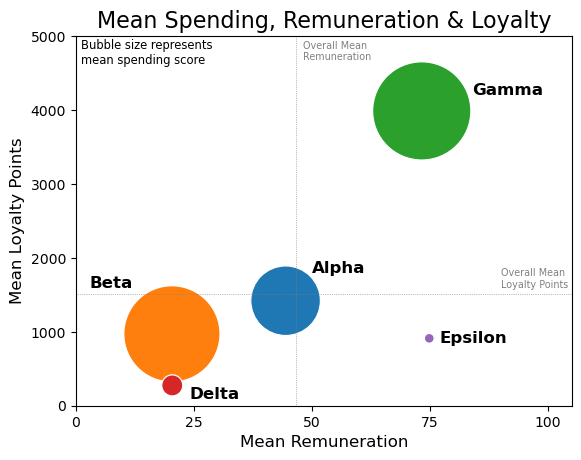

In [436]:
# use the scatterplot function to build the bubble m
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
plt.style.use('default')
sns.color_palette('colorblind')


sns.scatterplot(data = chart_data, x = 'remuneration', y = 'loyalty_points',
                hue = 'cluster_name',
                size = 'spending_score', sizes = (50, 5000),
                legend = False)

plt.title('Mean Spending, Remuneration & Loyalty', fontsize = 16)

ax.set_xlabel('Mean Remuneration', fontsize = 12)
ax.set_xlim(0, 105)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax.set_ylabel('Mean Loyalty Points', fontsize = 12)
ax.set_ylim(0, 5000)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Add annotations.

plt.text(50, 1800, 'Alpha', fontweight = 'bold', fontsize = 'large')
plt.text(3, 1600, 'Beta', fontweight = 'bold', fontsize = 'large')
plt.text(84, 4200, 'Gamma', fontweight = 'bold', fontsize = 'large')
plt.text(24, 100, 'Delta', fontweight = 'bold', fontsize = 'large')
plt.text(77, 850, 'Epsilon', fontweight = 'bold', fontsize = 'large')

plt.text(1, 4625, 'Bubble size represents\nmean spending score', fontweight = 'light',
         fontsize = 'small', color = 'black')

plt.axvline(x = chart_data['remuneration'].mean(), ls = ':', lw = 0.5, color = 'grey')
plt.text(48, 4675, 'Overall Mean\nRemuneration', fontweight = 'light',
         fontsize = 'x-small', color = 'grey')

plt.axhline(y = chart_data['loyalty_points'].mean(), ls = ':', lw = 0.5, color = 'grey')
plt.text(90, 1600, 'Overall Mean\nLoyalty Points', fontweight = 'light',
         fontsize = 'x-small', color = 'grey')
# show the graph
plt.show()

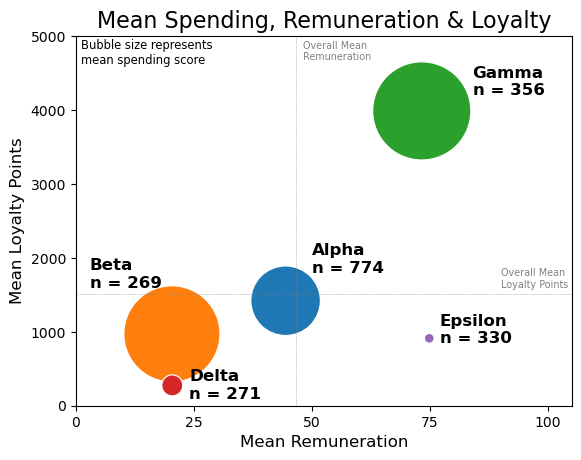

In [438]:
# use the scatterplot function to build the bubble m
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
plt.style.use('default')
sns.color_palette('colorblind')


sns.scatterplot(data = chart_data, x = 'remuneration', y = 'loyalty_points',
                hue = 'cluster_name',
                size = 'spending_score', sizes = (50, 5000),
                legend = False)

plt.title('Mean Spending, Remuneration & Loyalty', fontsize = 16)

ax.set_xlabel('Mean Remuneration', fontsize = 12)
ax.set_xlim(0, 105)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax.set_ylabel('Mean Loyalty Points', fontsize = 12)
ax.set_ylim(0, 5000)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Add annotations.

plt.text(50, 1800, 'Alpha\nn = 774', fontweight = 'bold', fontsize = 'large')
plt.text(3, 1600, 'Beta\nn = 269', fontweight = 'bold', fontsize = 'large')
plt.text(84, 4200, 'Gamma\nn = 356', fontweight = 'bold', fontsize = 'large')
plt.text(24, 100, 'Delta\nn = 271', fontweight = 'bold', fontsize = 'large')
plt.text(77, 850, 'Epsilon\nn = 330', fontweight = 'bold', fontsize = 'large')

plt.text(1, 4625, 'Bubble size represents\nmean spending score', fontweight = 'light',
         fontsize = 'small', color = 'black')

plt.axvline(x = chart_data['remuneration'].mean(), ls = ':', lw = 0.5, color = 'grey')
plt.text(48, 4675, 'Overall Mean\nRemuneration', fontweight = 'light',
         fontsize = 'x-small', color = 'grey')

plt.axhline(y = chart_data['loyalty_points'].mean(), ls = ':', lw = 0.5, color = 'grey')
plt.text(90, 1600, 'Overall Mean\nLoyalty Points', fontweight = 'light',
         fontsize = 'x-small', color = 'grey')
# show the graph
plt.show()

## Notes and observations

- Can now convert this data and output into descritions of each cluster
- Epsilon cluster is an opportunity, they earn roughly the same as Gamma but spend much less and accumulate much less loyalty points
- Beta cluster spend a lot, but don't accumulate loyalty points at the same rate as Gamma
- Could regression or decision tree models be built for each cluster

Text(0.5, 1.0, 'Loyalty By CLuster')

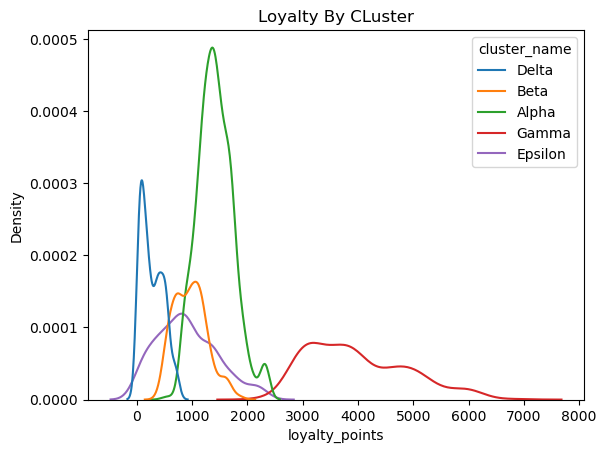

In [442]:
# Plot loyalty points by age_group on a density chart.
sns.kdeplot(data = trv4, x = 'loyalty_points', hue = 'cluster_name').set_title('Loyalty By CLuster')

In [443]:
# Check normality of loyalty points in each cluster.
# Create a list of clusters.
clusters = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']

# For each cluster print out normality test statistics.
for each_cluster in clusters:
    test_data = trv4['loyalty_points'].copy() [trv4['cluster_name'] == each_cluster]
    print_tests_for_normality(test_data, each_cluster) 

Alpha Tests for Normality:
Skew = 0.4256
Kurtosis = 0.2886
Shapiro Wilk statistic = 0.9825
Shapiro Wilk p-value = 0.0 

Beta Tests for Normality:
Skew = 0.4678
Kurtosis = -0.1984
Shapiro Wilk statistic = 0.9685
Shapiro Wilk p-value = 0.0 

Gamma Tests for Normality:
Skew = 0.6323
Kurtosis = -0.3779
Shapiro Wilk statistic = 0.9449
Shapiro Wilk p-value = 0.0 

Delta Tests for Normality:
Skew = 0.4868
Kurtosis = -0.9487
Shapiro Wilk statistic = 0.9147
Shapiro Wilk p-value = 0.0 

Epsilon Tests for Normality:
Skew = 0.4754
Kurtosis = -0.3419
Shapiro Wilk statistic = 0.9661
Shapiro Wilk p-value = 0.0 



In [444]:
trv4_subset = trv4[['loyalty_points', 'remuneration', 'spending_score']].copy() [trv4['cluster_name'] == 'Alpha']
trv4_subset

loyalty_points  remuneration  spending_score
42               849         31.98              36
43              1280         31.98              61
46              1338         32.80              55
47               942         32.80              47
48               842         32.80              42
...              ...           ...             ...
1953            1387         48.38              41
1954            1770         49.20              49
1955            1202         49.20              40
1956            1459         49.20              42
1957            1652         49.20              52

[774 rows x 3 columns]


 Alpha Cluster


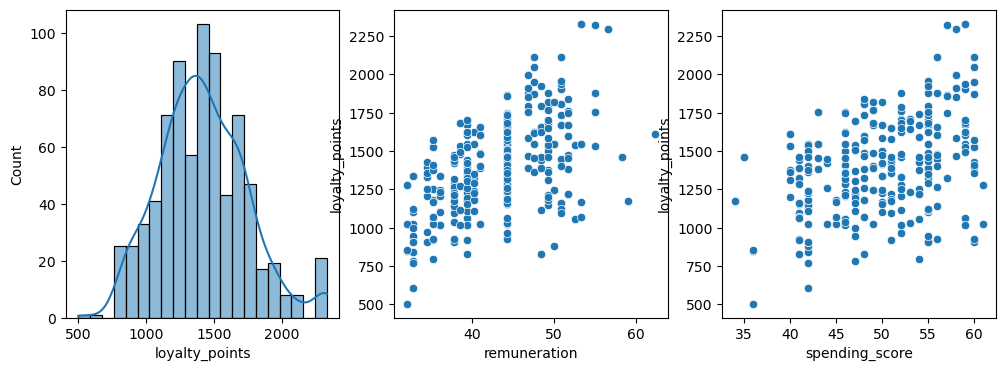


Correlation: loyalty vs remuneration:
Coeff = 0.5352
p-val = 0.0

Correlation: loyalty vs spending score:
Coeff = 0.4121
p-val = 0.0

 Beta Cluster


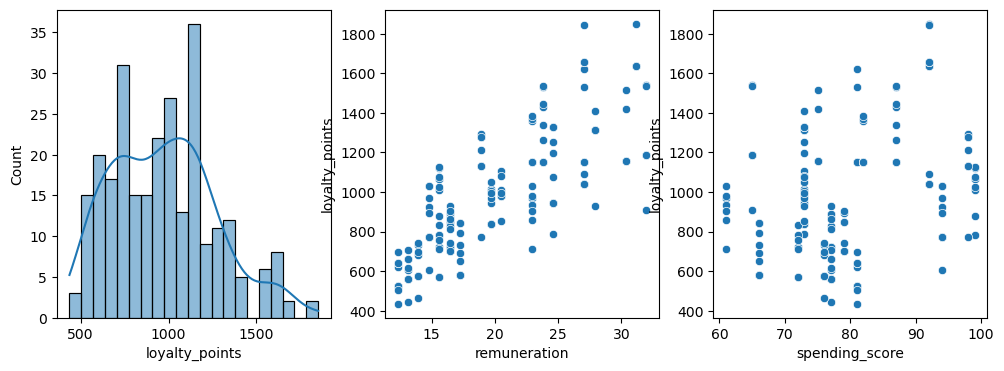


Correlation: loyalty vs remuneration:
Coeff = 0.7776
p-val = 0.0

Correlation: loyalty vs spending score:
Coeff = 0.2987
p-val = 0.0

 Gamma Cluster


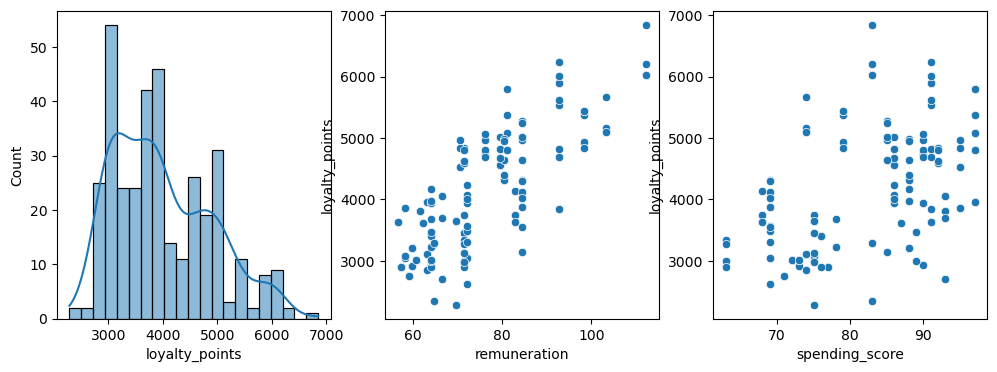


Correlation: loyalty vs remuneration:
Coeff = 0.8053
p-val = 0.0

Correlation: loyalty vs spending score:
Coeff = 0.4647
p-val = 0.0

 Delta Cluster


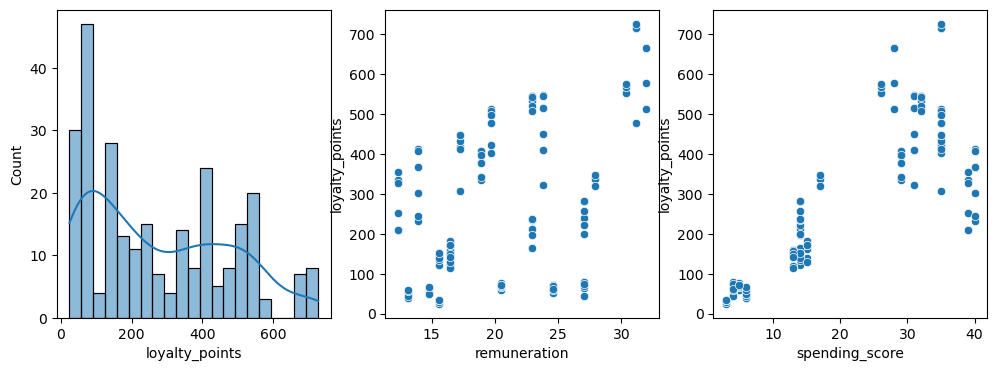


Correlation: loyalty vs remuneration:
Coeff = 0.5166
p-val = 0.0

Correlation: loyalty vs spending score:
Coeff = 0.8203
p-val = 0.0

 Epsilon Cluster


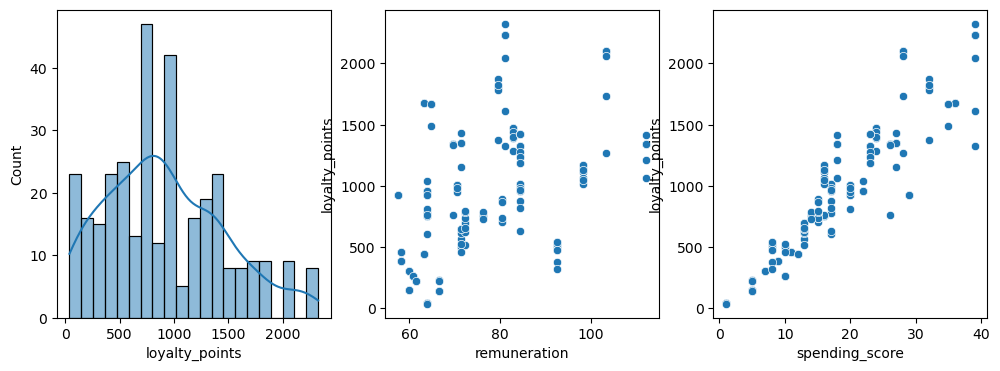


Correlation: loyalty vs remuneration:
Coeff = 0.4752
p-val = 0.0

Correlation: loyalty vs spending score:
Coeff = 0.9276
p-val = 0.0


In [448]:
# Plot a pair plot for each cluster
# Create a list of clusters.
clusters = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']

# For each cluster plot the histogram and scatterplots and correlation stats.
for each_cluster in clusters:
    # Prepare the data.
    chart_data = trv4[['loyalty_points', 'remuneration', 'spending_score']].copy() [trv4['cluster_name'] == each_cluster]
    
    # Print a heading.
    print('\n', each_cluster, 'Cluster')
    
    # Create the plot.
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(12, 4)
    plt.style.use('default')
    
    # Plot the charts.
    sns.histplot(data = chart_data, x = 'loyalty_points', bins = 21,
                 kde = True, ax = axs[0])
    
    sns.scatterplot(data = chart_data, x = 'remuneration',
                    y = 'loyalty_points', ax = axs[1])
    
    sns.scatterplot(data = chart_data, x = 'spending_score',
                    y = 'loyalty_points', ax = axs[2])

    # Display the chart.
    plt.show()
    
    # Print correlation stats.
    print('\nCorrelation: loyalty vs remuneration:')
    print('Coeff =', round(pearsonr(chart_data['remuneration'], chart_data['loyalty_points'])[0], 4))
    print('p-val =', round(pearsonr(chart_data['remuneration'], chart_data['loyalty_points'])[1], 4))
    
    print('\nCorrelation: loyalty vs spending score:')
    print('Coeff =', round(pearsonr(chart_data['spending_score'], chart_data['loyalty_points'])[0], 4))
    print('p-val =', round(pearsonr(chart_data['spending_score'], chart_data['loyalty_points'])[1], 4))

## Zoom in on the Epsilon cluster

### Epsilon Cluster SLR (y = loyalty_points, x = spending_score)

In [451]:
# Prepare the data.
regr_data = trv4[['loyalty_points', 'spending_score', 'remuneration']].copy() [trv4['cluster_name'] == 'Epsilon']

y = regr_data['loyalty_points'].values.reshape(-1, 1)
X = regr_data['spending_score'].values.reshape(-1, 1) 

In [452]:
# Split the data 80 / 20 (330 records in total).
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    random_state = 42)

In [453]:
# Train the model.
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(X_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(X_test)

# View the output.
#y_pred

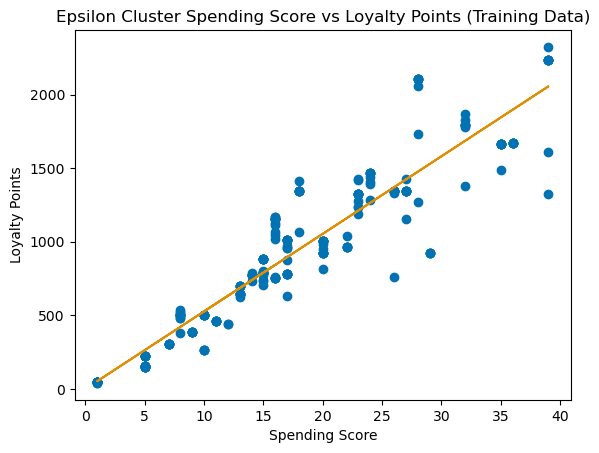

In [460]:
# Visualise the TRAINING set.
plt.scatter(X_train, y_train, color = my_dblue)
plt.plot(X_train, lr.predict(X_train), color = my_lorange)
plt.title('Epsilon Cluster Spending Score vs Loyalty Points (Training Data)')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

plt.show()

**COMMENT:** visually looks like a good fit; data points are less well packed at the higher spending scores.

In [463]:
# Print the R-squared, intercept and coefficient value.
print('MODEL 1 Goodness of Fit, Intercept and Coefficient (Training Data)')
print('R-squared value:', lr.score(X_train, y_train))
print('Intercept value:', lr.intercept_)
print('Coefficient value:', lr.coef_)

MODEL 1 Goodness of Fit, Intercept and Coefficient (Training Data)
R-squared value: 0.8682380525721599
Intercept value: [-0.47251753]
Coefficient value: [[52.7301652]]


**COMMENT:** the model explains 39% of the variation in the dependent variable (loyalty_points).

In [466]:
# Evaluate the model using the test data.
print('MODEL 1 Evaluation (Test Data)')
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred), 0))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred), 0)) 

MODEL 1 Evaluation (Test Data)
MAE: 161.0
MSE: 50359.0


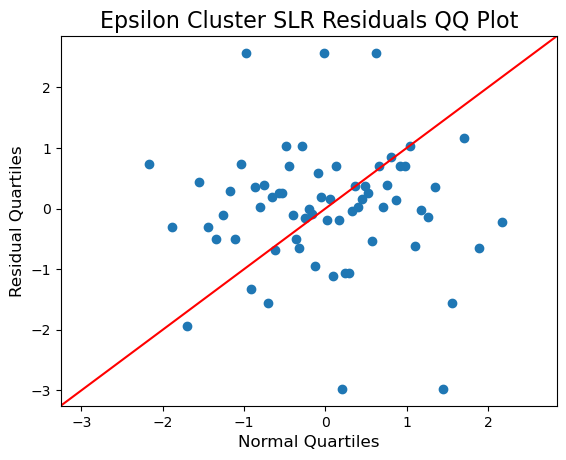

In [468]:
# Plot residuals.
plot_residuals(y_pred, y_test, 'Epsilon Cluster SLR Residuals QQ Plot', True)

**COMMENTS:** residuals not normally distributed

### Epsilon Cluster MLR (y = loyalty_points, x = remuneration, spending_score)

In [472]:
# Set the variables.
y = regr_data['loyalty_points']  
X = regr_data[['remuneration', 'spending_score']] 

In [474]:
print(X)

      remuneration  spending_score
124          57.40              29
128          58.22              11
130          58.22               9
134          59.86               5
136          59.86               7
...            ...             ...
1992         84.46              17
1994         84.46              23
1996         92.66               8
1998         98.40              16
1999         92.66               8

[330 rows x 2 columns]


In [476]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [478]:
# Call the predictions for X (array).
mlr.predict(X) 

array([1279.13439262,  394.02984376,  294.59701304,  115.3132068 ,
        214.74603752,  373.6862112 ,  134.895062  ,  502.49182471,
       1695.68579333, 1009.4469059 ,  760.8648291 ,  910.01407518,
        711.14841374,  -34.59781664,  -34.59781664, 1665.55123316,
        193.64062759, 1276.84906053,  988.34149597, 1346.14733108,
        650.11751606,  500.96826998,  659.90844366,  759.34127438,
        758.57949701, 1692.63868387,  857.25055037, 2060.23544658,
       1334.07107139, 1005.63801908, 1303.93651123,  656.09955684,
       1122.3673729 , 1777.7099228 , 1388.2459728 , 1279.13439262,
        394.02984376,  294.59701304,  115.3132068 ,  214.74603752,
        373.6862112 ,  134.895062  ,  502.49182471, 1695.68579333,
       1009.4469059 ,  760.8648291 ,  910.01407518,  711.14841374,
        -34.59781664,  -34.59781664, 1665.55123316,  193.64062759,
       1276.84906053,  988.34149597, 1346.14733108,  650.11751606,
        500.96826998,  659.90844366,  759.34127438,  758.57949

In [480]:
# Checking the value of R-squared, intercept and coefficients.
print('MODEL 3 Goodness of Fit (All Data)')
print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

MODEL 3 Goodness of Fit (All Data)
R-squared:  0.9456531157630232
Intercept:  -848.0065847182509
Coefficients:


[('remuneration', 11.940155608493482), ('spending_score', 49.71641535899169)]

In [482]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

In [484]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred_ols = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     2321.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          5.70e-167
Time:                        14:58:45   Log-Likelihood:                -1651.5
No. Observations:                 264   AIC:                             3309.
Df Residuals:                     261   BIC:                             3320.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -808.0208     44.273    -18.

**COMMENT:** the model explains 83% of the variation (Rsq Adj) in the dependent variable (loyalty_points), the p-values < 0.05 for both remuneration and spending_score therefore both are statistically significant in the model.

In [487]:
# Run the regression test
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)

# Call the predictions for X in the train set.
y_pred = mlr.predict(X_test)  

In [489]:
# Checking the value of R-squared, intercept and coefficients.
print('MODEL 3 Goodness of Fit, Intercept and Coefficient (Training Data)')
print("R-squared: ", mlr.score(X_train, Y_train))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

MODEL 3 Goodness of Fit, Intercept and Coefficient (Training Data)
R-squared:  0.9467770149440062
Intercept:  -808.0207883037156
Coefficients:


[('remuneration', 11.51309823470005), ('spending_score', 49.527290837643285)]

**COMMENT:** the model explains 83% of the variation in the dependent variable (loyalty_points).

In [492]:
# Check for multi-colinearity
# Add a constant.
X_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif['VIF Factor'] = [variance_inflation_factor(X_temp.values, 
                                               i) for i in range(X_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = X_temp.columns  

# Print the values to two decimal points.
print(vif.round(2)) 

   VIF Factor        features
0       32.19           const
1        1.04    remuneration
2        1.04  spending_score


**COMMENT:** VIF Factors < 5 for remuneration and spending_score indicate there is no multi-colinearity present, thertefore ok to proceed.

In [495]:
# Check for heteroscedasticity
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 28.015369937219024, 'LM Test p-value': 8.251629387400348e-07, 'F-stat': 15.492558883324072, 'F-test p-value': 4.385435405390325e-07}


**COMMENT:** The null hypothesis (H0): Homoscedasticity is present, therefore as p-values < 0.05 reject H0, Homoscedasticity not present, thertefore ok to proceed.

In [498]:
# Evaluate the model using the test data.
print('MODEL 3 Evaluation (Test Data)')
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred), 0))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred), 0)) 

MODEL 3 Evaluation (Test Data)
MAE: 92.0
MSE: 17472.0


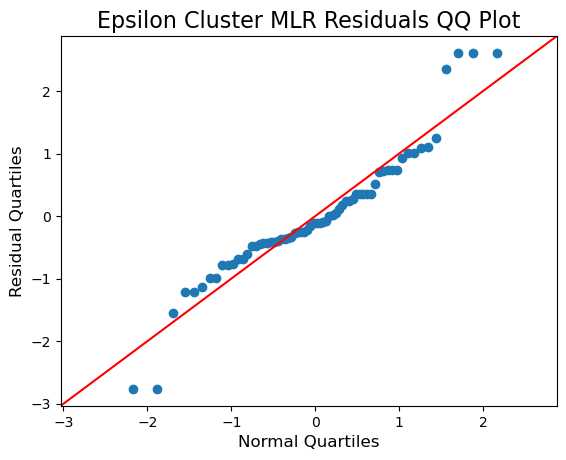

In [500]:
# Plot residuals.
plot_residuals(y_pred, Y_test, 'Epsilon Cluster MLR Residuals QQ Plot', True)


**COMMENTS:** close to normal if not normal; keep MLR model

# Sentiment Analysis - NLP

## Import additional libraries

In [506]:
# Import additional packages.
from wordcloud import WordCloud
from collections import Counter
from nltk.probability import FreqDist
from textblob import TextBlob

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/genaferguson/anaconda3/lib/python3.11/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


## Import the version of the data latest data

In [509]:
# Import the data and view meta data and data.
tr = pd.read_csv('turtle_reviews_v4.csv')

print(tr.info())
tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   age_group       2000 non-null   object 
 10  education_num   2000 non-null   int64  
 11  age_group_num   2000 non-null   int64  
 12  gender_Male     2000 non-null   int64  
 13  kMean_cluster   2000 non-null   int64  
 14  cluster_name    2000 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 234.5+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  \
0  The fact that 50% of this space is wasted on a...  30 & Below   
1  Another worthless Dungeon Master's screen from...  30 & Below   
2                    pretty, but also pretty useless  30 & Below   
3                                         Five Stars  30 & Below   
4                                         Money trap       30-39   

   education_num  age_group_num  gender_Male  kMean_cluster cluster_name  
0              2              0            1              3        Delta  
1              2              0            1              1         Beta  
2              2              0            0              3        Delta  
3              2              0            0              1         Beta  
4              2              1            0              3        Delta

## Initial data wrangling

### Retain only the necessary columns

In [513]:
# Only need summary and review columns.
tr_nlp = tr[['summary', 'review']]

# View data.
tr_nlp

summary  \
0     The fact that 50% of this space is wasted on a...   
1     Another worthless Dungeon Master's screen from...   
2                       pretty, but also pretty useless   
3                                            Five Stars   
4                                            Money trap   
...                                                 ...   
1995     The perfect word game for mixed ages (with Mom   
1996                                          Super fun   
1997                                         Great Game   
1998                                         Four Stars   
1999                                     Love this game   

                                                 review  
0     When it comes to a DM's screen, the space on t...  
1     An Open Letter to GaleForce9*:\n\nYour unpaint...  
2     Nice art, nice printing.  Why two panels are f...  
3     Amazing buy! Bought it as a gift for our new d...  
4     As my review of GF9's previous screens these w...  
...                                                 ...  
1995  The perfect word game for mixed ages (with Mom...  
1996  Great game.  Did not think I would like it whe...  
1997  Great game for all.........\nKeeps the mind ni...  
1998                                          fun game!  
1999  This game is fun. A lot like scrabble without ...  

[2000 rows x 2 columns]

In [515]:
# Determine the number of rows where the summary and/or review are not populated
tr_nlp.isna().sum()

summary    0
review     0
dtype: int64

**COMMENT:** no missing values.

### Convert to lower case

In [519]:
# Transform summary and review data to lowercase.
tr_nlp['summary'] = tr_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tr_nlp['review'] = tr_nlp['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the result.
tr_nlp.head()

/var/folders/j_/nn1z74dn1f701mdlfm07w3w40000gn/T/ipykernel_40478/590001206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_nlp['summary'] = tr_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))


summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              review  
0  when it comes to a dm's screen, the space on t...  
1  an open letter to galeforce9*: your unpainted ...  
2  nice art, nice printing. why two panels are fi...  
3  amazing buy! bought it as a gift for our new d...  
4  as my review of gf9's previous screens these w...

### Remove punctuation

In [522]:
# Create function to remove punctuations.
import string 
def remove_punctuation(text):

    punctuation = string.punctuation

    return text.translate(str.maketrans('', '', punctuation))

# Remove punctuation from summary and review data.
tr_nlp['summary'] = tr_nlp['summary'].apply(remove_punctuation)
tr_nlp['review'] = tr_nlp['review'].apply(remove_punctuation)

# View the result.
tr_nlp.head()

/var/folders/j_/nn1z74dn1f701mdlfm07w3w40000gn/T/ipykernel_40478/701442169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_nlp['summary'] = tr_nlp['summary'].apply(remove_punctuation)


summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              review  
0  when it comes to a dms screen the space on the...  
1  an open letter to galeforce9 your unpainted mi...  
2  nice art nice printing why two panels are fill...  
3  amazing buy bought it as a gift for our new dm...  
4  as my review of gf9s previous screens these we...

## Should duplicates be removed?

In [525]:
# Check the number of duplicate values in the summary and review columns.
print('Duplicate values in SUMMARY column =', tr_nlp.summary.duplicated().sum())
print('Duplicate values in REVIEW column =', tr_nlp.review.duplicated().sum())

Duplicate values in SUMMARY column = 649
Duplicate values in REVIEW column = 50


In [527]:
# Identify duplicates in summary column.
duplicates = tr_nlp['summary'][tr_nlp['summary'].duplicated(keep = False)]

# View value counts of top 5 occurences.
print('Top 5 value counts of duplicates in SUMMARY column ...')
duplicates.value_counts().head(10)

Top 5 value counts of duplicates in SUMMARY column ...


summary
five stars         378
four stars          57
great game          22
fun                 16
three stars         14
fun game            14
two stars           12
great               12
great expansion     10
love it              8
Name: count, dtype: int64

In [529]:
# Identify duplicates in review column.
duplicates = tr_nlp['review'][tr_nlp['review'].duplicated(keep = False)]

# View value counts of top 5 occurences.
print('Top 5 value counts of duplicates in REVIEW column ...')
duplicates.value_counts().head(10)

Top 5 value counts of duplicates in REVIEW column ...


review
great game                         8
love it                            8
great                              7
fun game                           4
good                               4
very cute                          3
good product                       3
cute                               3
as expected                        3
great expansion to a great game    2
Name: count, dtype: int64

**COMMENTS:**
- there are a 649 duplicates in the summary column out of 2000 rows = 32% of data
- there are much fewer duplicates in the review column, 50 out of 2000 records = 2.5% of data
- deleting all of these would remove a significant amount of data and hide positive and negative sentiment comments, so keeping them in would make this analysis a better representation of true sentiment than if they were taken out.

**DECISION:** proceed with the full data set, keeping duplicates in.

## Prepare the data for analysis

### Tokenise the data

In [534]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/genaferguson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [536]:
# Create a copy of the data frame and add token columns for review and summary
tr_nlp2 = tr_nlp.copy()

# Tokenise the words.
tr_nlp2['summary_tkns'] = tr_nlp['summary'].apply(word_tokenize)
tr_nlp2['review_tkns'] = tr_nlp['review'].apply(word_tokenize)


# Preview data.
tr_nlp2.head()

summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                        summary_tkns  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                         review_tkns  
0  [when, it, comes, to, a, dms, screen, the, spa...  
1  [an, open, letter, to, galeforce9, your, unpai...  
2  [nice, art, nice, printing, why, two, panels, ...  
3  [amazing, buy, bought, it, as, a, gift, for, o...  
4  [as, my, review, of, gf9s, previous, screens, ...

### Remove stop words

In [538]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = list(stopwords.words('english'))
#english_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/genaferguson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 'Summary' data

In [542]:
# Define an empty list of tokens.
tokens = []

for i in range(tr_nlp2.shape[0]):
    # Add each token to the list.
    tokens = tokens + tr_nlp2['summary_tkns'][i]
    
# Create a filtered list of tokens without stopwords.
tokens_no_stop = [x for x in tokens if x not in english_stopwords]

# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
sum_tokens = [word for word in tokens_no_stop if word.isalnum()]

# Define an empty string variable.
sum_tokens_str = ''

for value in sum_tokens:
    # Add each filtered token word to the string.
    sum_tokens_str = sum_tokens_str + value + ' '

#### 'Review' data

In [545]:
# Define an empty list of tokens.
tokens = []

for i in range(tr_nlp2.shape[0]):
    # Add each token to the list.
    tokens = tokens + tr_nlp2['review_tkns'][i]
    
# Create a filtered list of tokens without stopwords.
tokens_no_stop = [x for x in tokens if x not in english_stopwords]

# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
rvw_tokens = [word for word in tokens_no_stop if word.isalnum()]

# Define an empty string variable.
rvw_tokens_str = ''

for value in rvw_tokens:
    # Add each filtered token word to the string.
    rvw_tokens_str = rvw_tokens_str + value + ' '

### Create WordCloud for 'Summary' data

In [547]:
# String all the summaries together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(tr_nlp['summary'].shape[0]):
    # Add each comment.
    all_summary = all_summary + tr_nlp['summary'][i]

# Uncomment below and re-run to view output.
#all_summary

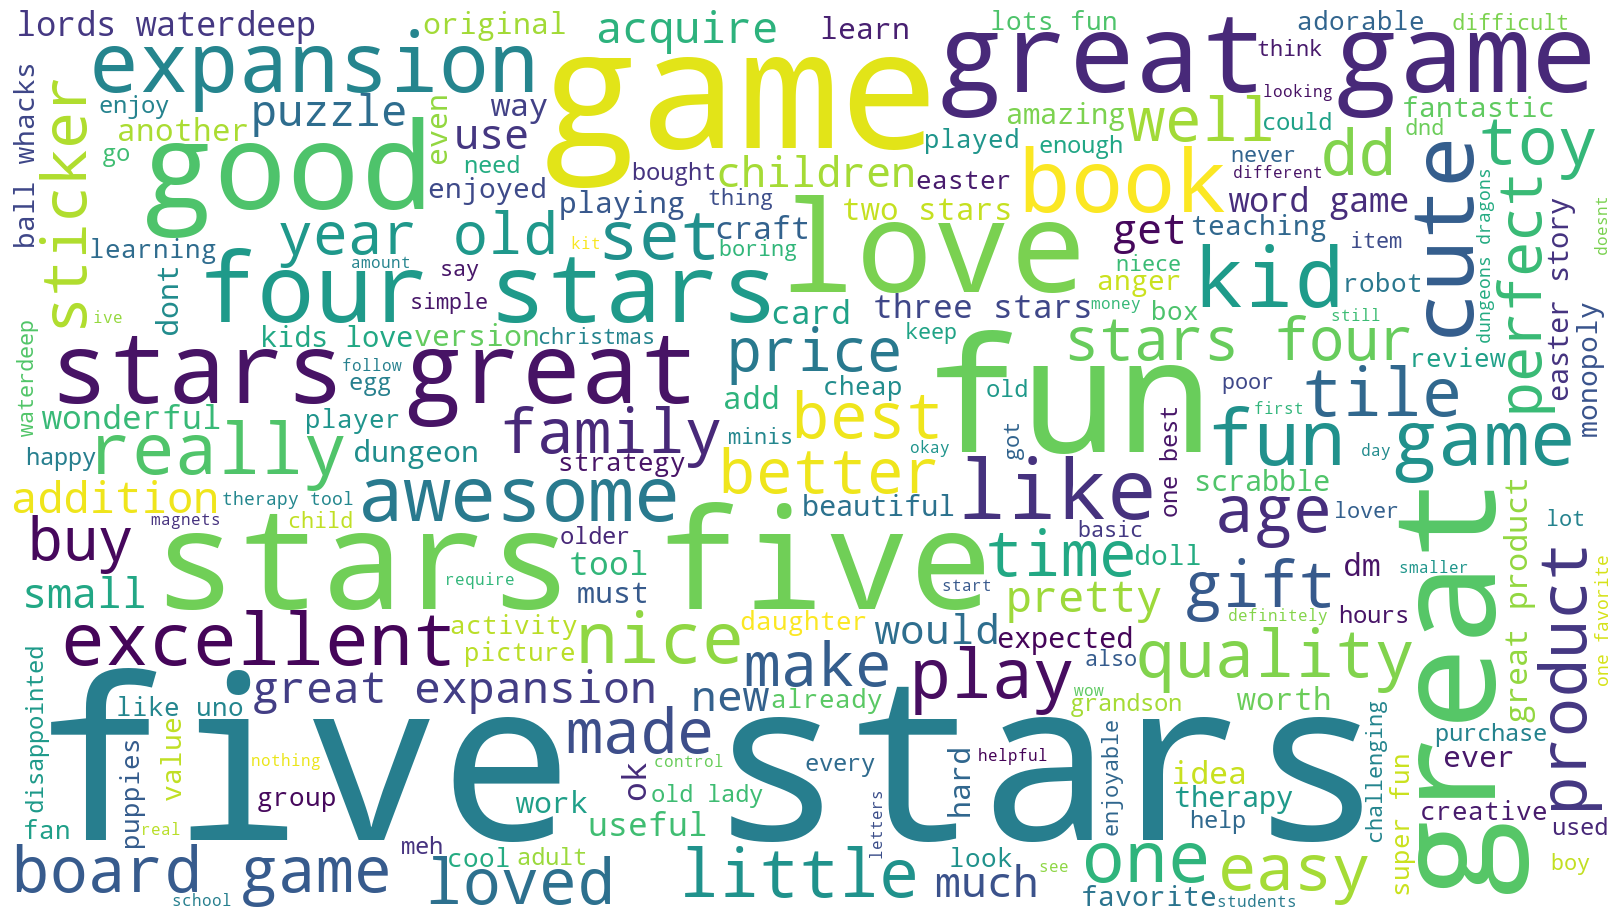

In [548]:
# Create a WordCloud object with summary data.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                stopwords = 'none',
                min_font_size = 10).generate(sum_tokens_str)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

**COMMENTS:** pretty but not very helpful from a quantitative perspective!

### Create WordCloud for 'Review' data

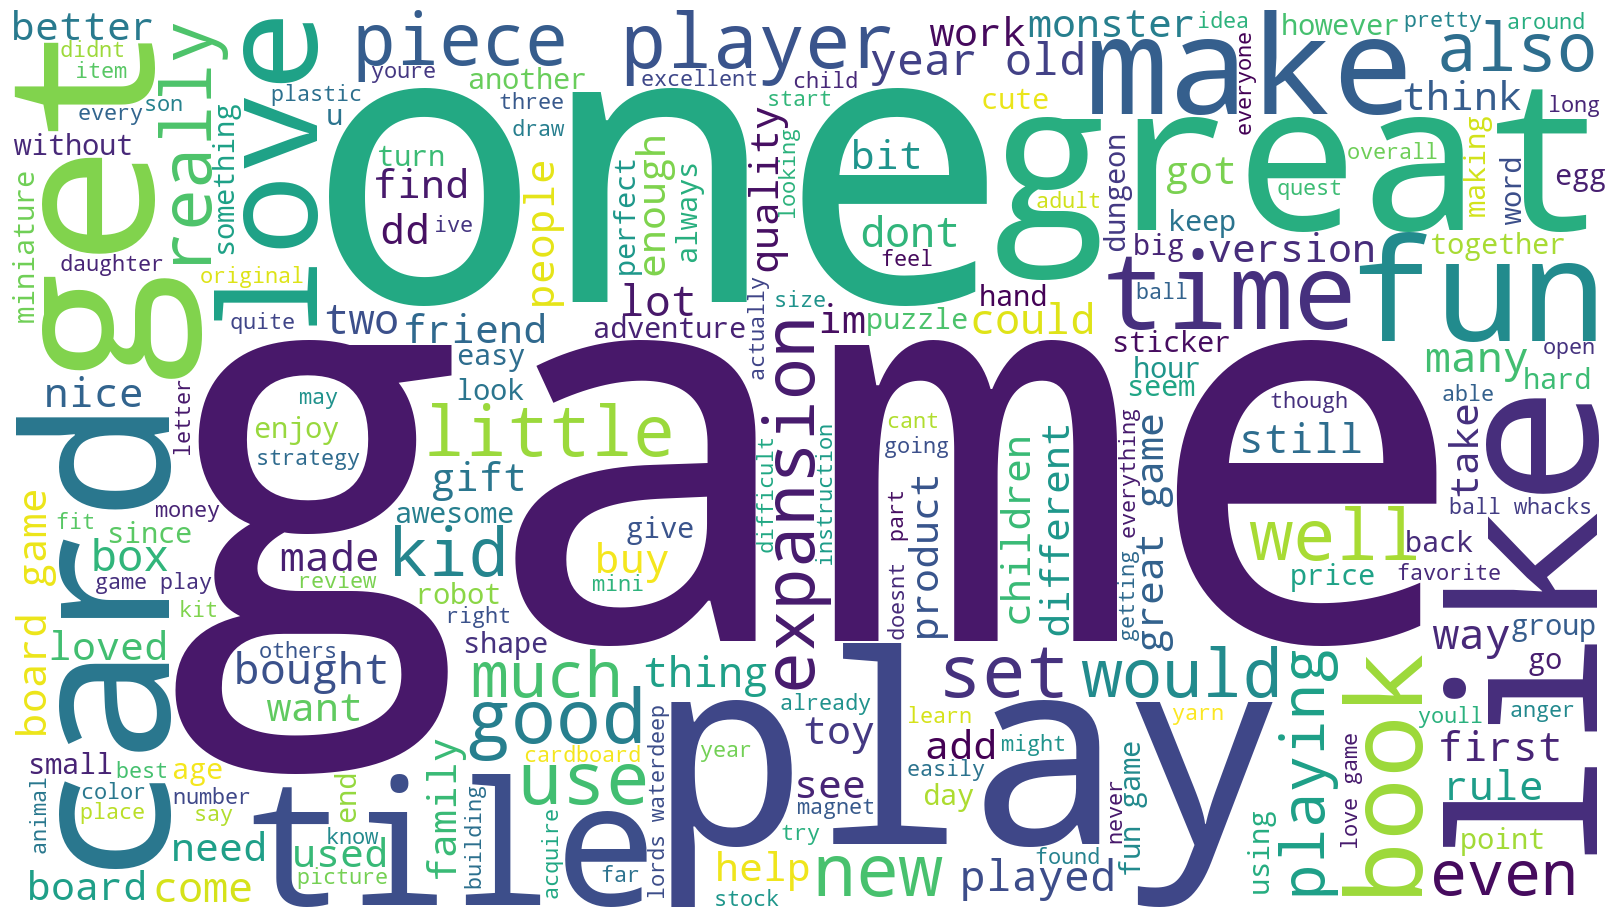

In [553]:
# Create a WordCloud object with review data.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                stopwords = 'none',
                min_font_size = 10).generate(rvw_tokens_str)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

**COMMENTS:** pretty but not very helpful from a quantitative perspective!

## Create frequency distributions for 'Summary' and 'Review'

In [557]:
# View the frequency distribution of review tokens.
fdist_rvw = FreqDist(rvw_tokens)

# Preview the data.
print('Freq Dist of REVIEW tokens:')
fdist_rvw

Freq Dist of REVIEW tokens:


FreqDist({'game': 1685, 'great': 596, 'fun': 553, 'one': 530, 'play': 502, 'like': 414, 'love': 331, 'really': 319, 'get': 319, 'cards': 301, ...})

In [558]:
# View the frequency distribution of summary tokens.
fdist_sum = FreqDist(sum_tokens)

# Preview the data.
print('Freq Dist of SUMMARY tokens:')
fdist_sum

Freq Dist of SUMMARY tokens:


FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [559]:
# View the Top n words that occuer in Review and Summary.
# Define n = number.
n = 10

# Generate a count of most common summary tokens.
count_sum = pd.DataFrame(Counter(sum_tokens).most_common(n),
                         columns = ['Word', 'Frequency'])\
                         .sort_values('Frequency', ascending = False)

# Generate a count of most common summary tokens.
count_rvw = pd.DataFrame(Counter(rvw_tokens).most_common(n),
                         columns = ['Word', 'Frequency'])\
                         .sort_values('Frequency', ascending = False)

Text(0.5, 1.0, 'Top 10 Words in Summaries')

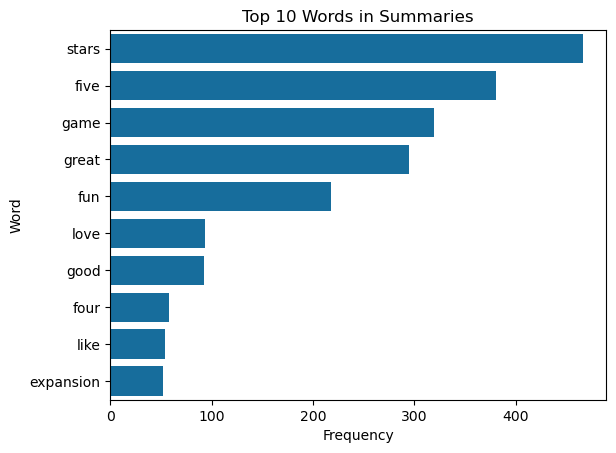

In [564]:
sns.barplot(x = 'Frequency', y = 'Word', data = count_sum,
            estimator = sum, color = '#0173b2',
            errorbar = None).set_title('Top 10 Words in Summaries')

Text(0.5, 1.0, 'Top 10 Words in Reviews')

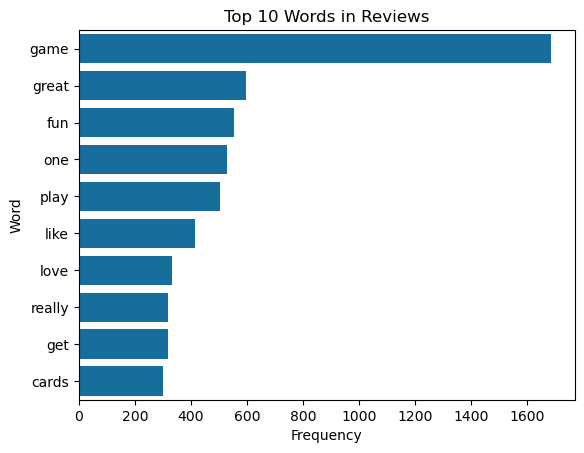

In [565]:
sns.barplot(x = 'Frequency', y = 'Word', data = count_rvw,
            estimator = sum, color = '#0173b2',
            errorbar = None).set_title('Top 10 Words in Reviews')

## Calculate polarity and subjectivity measures

In [569]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new columns for polarity scores and subjectivity.
tr_nlp2['polarity_rvw'] = tr_nlp2['review'].apply(generate_polarity)
tr_nlp2['subjectivity_rvw'] = tr_nlp2['review'].apply(generate_subjectivity)

tr_nlp2['polarity_sum'] = tr_nlp2['summary'].apply(generate_polarity)
tr_nlp2['subjectivity_sum'] = tr_nlp2['summary'].apply(generate_subjectivity)

# Preview the result.
tr_nlp2.head()

summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                        summary_tkns  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                         review_tkns  polarity_rvw  \
0  [when, it, comes, to, a, dms, screen, the, spa...     -0.036111   
1  [an, open, letter, to, galeforce9, your, unpai...      0.035952   
2  [nice, art, nice, printing, why, two, panels, ...      0.116640   
3  [amazing, buy, bought, it, as, a, gift, for, o...      0.578788   
4  [as, my, review, of, gf9s, previous, screens, ...     -0.316667   

   subjectivity_rvw  polarity_sum  subjectivity_sum  
0          0.486111          0.15          0.500000  
1          0.442976         -0.80          0.900000  
2          0.430435          0.00          0.733333  
3          0.784848          0.00          0.000000  
4          0.316667          0.00          0.000000

In [570]:
# View mean for each of the new columns.
tr_nlp2[['polarity_rvw', 'polarity_sum', 'subjectivity_rvw', 'subjectivity_sum']].mean()

polarity_rvw        0.217688
polarity_sum        0.219317
subjectivity_rvw    0.519119
subjectivity_sum    0.378096
dtype: float64

**COMMENTS:**
- polarity scale -1 (negative sentiment) to +1 (positive sentiment)
- both polarities are positive so 22% positive sentiment, positive but not very positive
- subjectivity scale 0 (objective) to +1 (full of opinion)
- both subjectivities are positive (38% and 52%) suggesting that reviews are subject to opinion, less than 40% is good, less than 20% very good

## 'Review' data analysis

Text(0.5, 1.0, 'Review Polarity')

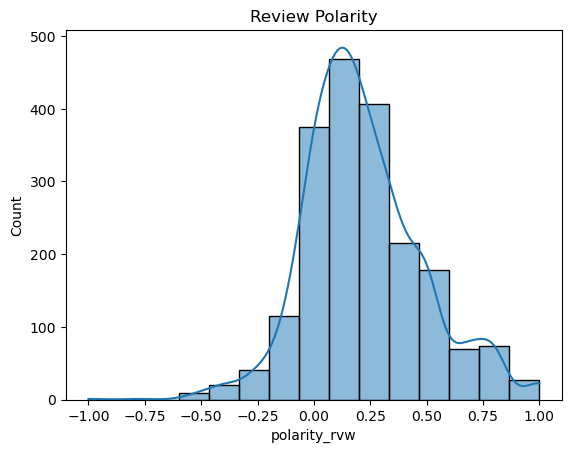

In [573]:
# Plot a histogram of Review data polarity.
sns.histplot(data = tr_nlp2, x = 'polarity_rvw', bins = 15, kde = True)\
             .set_title('Review Polarity')

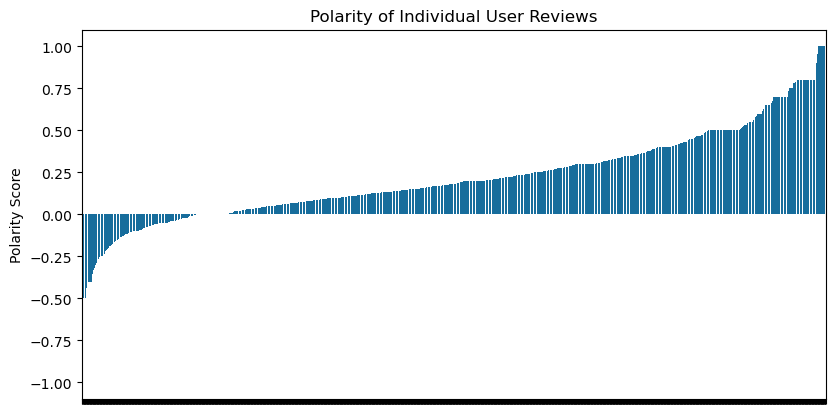

In [574]:
# Plot indiviudal polarity scores ascending across x-axis.
# Prepare the data.
chart_data = tr_nlp2['polarity_rvw'].sort_values().reset_index()
chart_data.drop(columns = 'index', inplace = True)

# Plot the chart.
fig, axs = plt.subplots()
fig.set_size_inches(9.6, 4.8)

plt.style.use('default')

sns.barplot(data = chart_data, y = 'polarity_rvw', x = chart_data.index,
            color = my_dblue, errorbar = None)\
   .set(title = 'Polarity of Individual User Reviews', xticklabels = [],
       ylabel = 'Polarity Score')

# CUstomise the chart.
ax.set_ylim(-1, 1)

plt.show()

In [575]:
print('Review column\n',
      'Values LT 0 =', len(tr_nlp2[tr_nlp2['polarity_rvw'] < 0]), '\n',
      'Values EQ 0 =', len(tr_nlp2[tr_nlp2['polarity_rvw'] == 0]), '\n',
      'Values GT 0 =', len(tr_nlp2[tr_nlp2['polarity_rvw'] > 0]), '\n')

Review column
 Values LT 0 = 306 
 Values EQ 0 = 81 
 Values GT 0 = 1613 



Text(0.5, 1.0, 'Review Subjectivity')

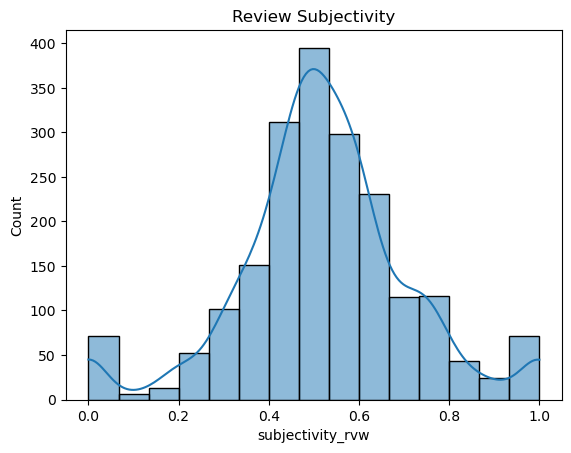

In [576]:
# Plot a histogram of Review data subjectivity.
sns.histplot(data = tr_nlp2, x = 'subjectivity_rvw', bins = 15, kde = True)\
             .set_title('Review Subjectivity')

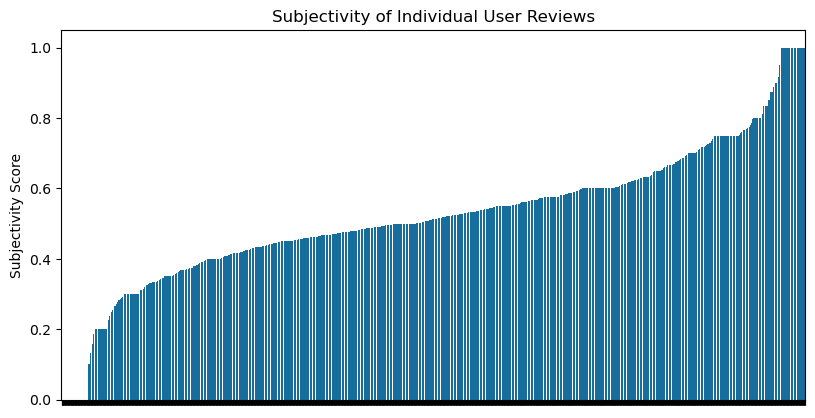

In [579]:
# Plot indiviudal subjectivity scores ascending across x-axis.
# Prepare the data.
chart_data = tr_nlp2['subjectivity_rvw'].sort_values().reset_index()
chart_data.drop(columns = 'index', inplace = True)

# Plot the chart.
fig, axs = plt.subplots()
fig.set_size_inches(9.6, 4.8)

plt.style.use('default')

sns.barplot(data = chart_data, y = 'subjectivity_rvw', x = chart_data.index,
            color = my_dblue, errorbar = None)\
   .set(title = 'Subjectivity of Individual User Reviews', xticklabels = [],
       ylabel = 'Subjectivity Score')

# CUstomise the chart.
ax.set_ylim(0, 1)

plt.show()

## 'Summary' data analysis

Text(0.5, 1.0, 'Summary Polarity')

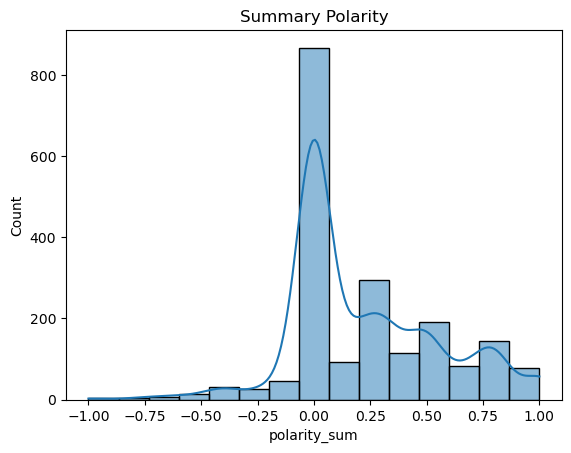

In [582]:
# Plot a histogram of Summary data polarity.
sns.histplot(data = tr_nlp2, x = 'polarity_sum', bins = 15, kde = True)\
             .set_title('Summary Polarity')

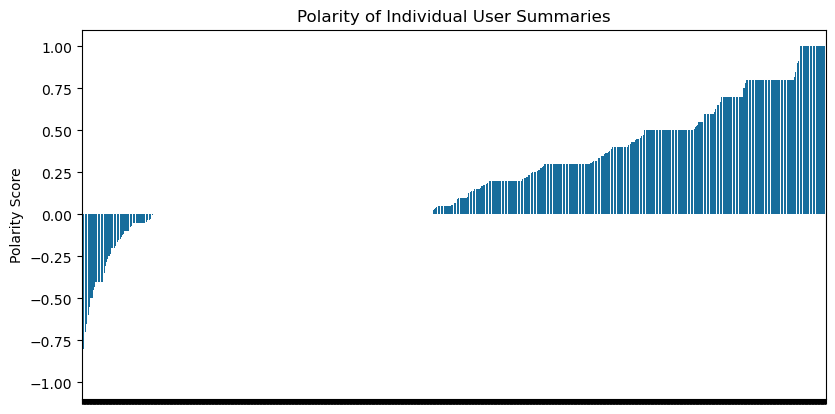

In [583]:
# Plot indiviudal polarity scores ascending across x-axis.
# Prepare the data.
chart_data = tr_nlp2['polarity_sum'].sort_values().reset_index()
chart_data.drop(columns = 'index', inplace = True)

# Plot the chart.
fig, axs = plt.subplots()
fig.set_size_inches(9.6, 4.8)

plt.style.use('default')


sns.barplot(data = chart_data, y = 'polarity_sum', x = chart_data.index,
            color = my_dblue, errorbar = None)\
   .set(title = 'Polarity of Individual User Summaries', xticklabels = [],
       ylabel = 'Polarity Score')

# CUstomise the chart.
ax.set_ylim(-1, 1)

plt.show()

In [584]:
print('Summary column\n',
      'Values LT 0 =', len(tr_nlp2[tr_nlp2['polarity_sum'] < 0]), '\n',
      'Values EQ 0 =', len(tr_nlp2[tr_nlp2['polarity_sum'] == 0]), '\n',
      'Values GT 0 =', len(tr_nlp2[tr_nlp2['polarity_sum'] > 0]), '\n')

Summary column
 Values LT 0 = 192 
 Values EQ 0 = 750 
 Values GT 0 = 1058 



Text(0.5, 1.0, 'Summary Subjectivity')

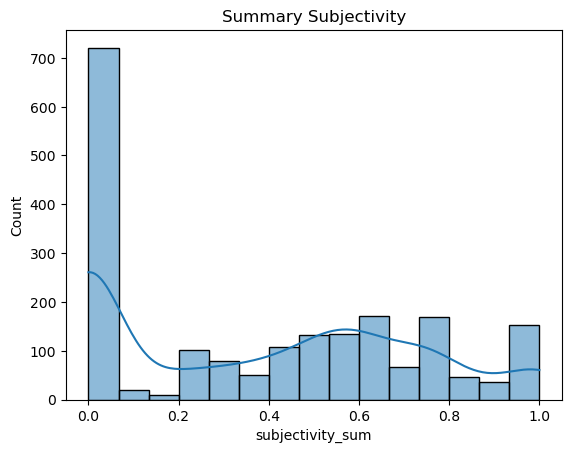

In [585]:
# Plot a histogram of Summary data subjectivity.
sns.histplot(data = tr_nlp2, x = 'subjectivity_sum', bins = 15, kde = True)\
             .set_title('Summary Subjectivity')

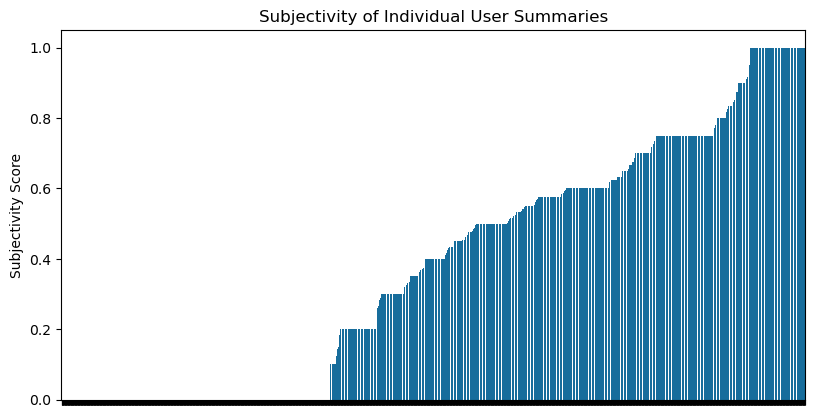

In [586]:
# Plot indiviudal subjectivity scores ascending across x-axis.
# Prepare the data.
chart_data = tr_nlp2['subjectivity_sum'].sort_values().reset_index()
chart_data.drop(columns = 'index', inplace = True)

# Plot the chart.
fig, axs = plt.subplots()
fig.set_size_inches(9.6, 4.8)

plt.style.use('default')


sns.barplot(data = chart_data, y = 'subjectivity_sum', x = chart_data.index,
            color = my_dblue, errorbar = None)\
   .set(title = 'Subjectivity of Individual User Summaries', xticklabels = [],
       ylabel = 'Subjectivity Score')

# CUstomise the chart.
ax.set_ylim(0, 1)

plt.show()

## Do review and summaries agree with each other (ie polarity scores)?

In [588]:
# Create new columns to hold differences in polarity between summary and review columns.
tr_nlp2['polarity_delta'] = tr_nlp2['polarity_sum'] - tr_nlp2['polarity_rvw']

# View descriptive statistics for each columns
tr_nlp2[['polarity_sum', 'polarity_rvw', 'polarity_delta']].describe()


polarity_sum  polarity_rvw  polarity_delta
count   2000.000000   2000.000000     2000.000000
mean       0.219317      0.217688        0.001628
std        0.335627      0.262502        0.388048
min       -1.000000     -1.000000       -1.400000
25%        0.000000      0.049888       -0.217566
50%        0.062500      0.182258        0.000000
75%        0.451250      0.361028        0.225000
max        1.000000      1.000000        1.333333

**COMMENT:** based on this table there doesn' appear to be any difference in polarity between review and summary (this could be tested statistically) - polarity delta mean = 0.001628

Text(0.5, 1.0, 'Polarity Difference Between Summary and Review')

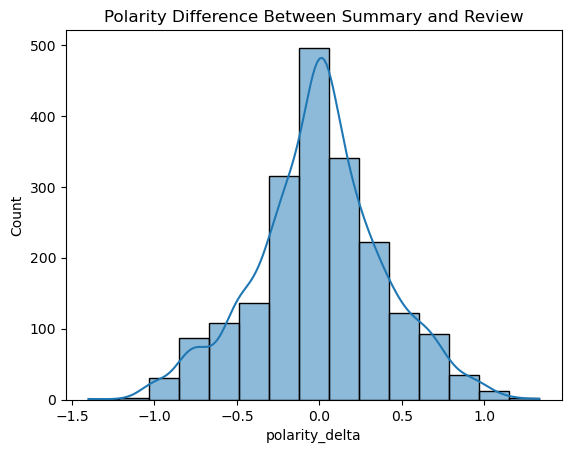

In [590]:
# Plot a histogram of the difference in Polarity.
sns.histplot(data = tr_nlp2, x = 'polarity_delta', bins = 15, kde = True)\
             .set_title('Polarity Difference Between Summary and Review')

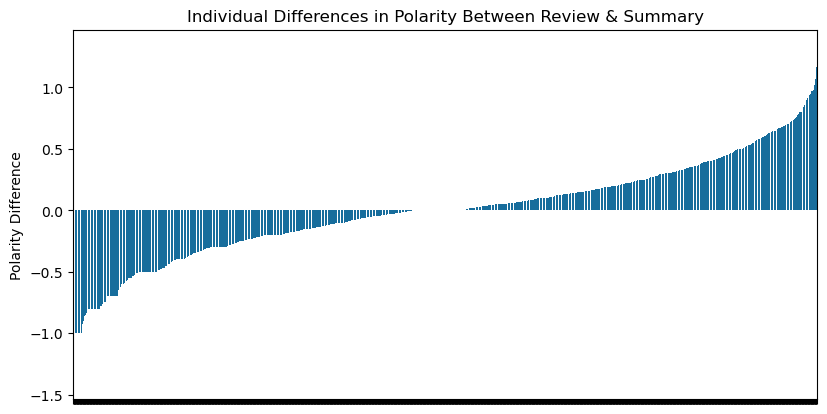

In [591]:
# Plot indiviudal polarity delta scores ascending across x-axis.
# Prepare the data.
chart_data = tr_nlp2['polarity_delta'].sort_values().reset_index()
chart_data.drop(columns = 'index', inplace = True)


#use orange for bar with max value and grey for all other bars
#custom_colors = [my_dorange if (chart_data['polarity_rvw'] < 0) else my_dblue for chart_data['polarity_rvw'] in chart_data['polarity_rvw']]

# Plot the chart.
fig, axs = plt.subplots()
fig.set_size_inches(9.6, 4.8)

plt.style.use('default')


sns.barplot(data = chart_data, y = 'polarity_delta', x = chart_data.index,
            color = my_dblue, errorbar = None)\
   .set(title = 'Individual Differences in Polarity Between Review & Summary', xticklabels = [],
       ylabel = 'Polarity Difference')

# CUstomise the chart.
ax.set_ylim(-1, 1)

plt.show()

**COMMENT:** overall reviews and summaries agree with each other from a sentiment perspective, but their is a wide spread of disagreement

## Merge the NLP data with the original data and save

In [594]:
# View the first five records of the original data.
trv4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  \
0  The fact that 50% of this space is wasted on a...  30 & Below   
1  Another worthless Dungeon Master's screen from...  30 & Below   
2                    pretty, but also pretty useless  30 & Below   
3                                         Five Stars  30 & Below   
4                                         Money trap       30-39   

   education_num  age_group_num  gender_Male  kMean_cluster cluster_name  
0              2              0            1              3        Delta  
1              2              0            1              1         Beta  
2              2              0            0              3        Delta  
3              2              0            0              1         Beta  
4              2              1            0              3        Delta

In [608]:
# View the first five records of the nlp data.
tr_nlp2.head()

summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                        summary_tkns  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                         review_tkns  polarity_rvw  \
0  [when, it, comes, to, a, dms, screen, the, spa...     -0.036111   
1  [an, open, letter, to, galeforce9, your, unpai...      0.035952   
2  [nice, art, nice, printing, why, two, panels, ...      0.116640   
3  [amazing, buy, bought, it, as, a, gift, for, o...      0.578788   
4  [as, my, review, of, gf9s, previous, screens, ...     -0.316667   

   subjectivity_rvw  polarity_sum  subjectivity_sum  polarity_delta  
0          0.486111          0.15          0.500000        0.186111  
1          0.442976         -0.80          0.900000       -0.835952  
2          0.430435          0.00          0.733333       -0.116640  
3          0.784848          0.00          0.000000       -0.578788  
4          0.316667          0.00          0.000000        0.316667

In [610]:
# Create a new data frame to merge original data with nlp data.
new_df = pd.merge(trv4, tr_nlp2, left_index = True, right_index = True)

In [612]:
# View the metadata and a sample of the data.
print(new_df.info())
new_df.sample(n = 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   age               2000 non-null   int64  
 2   remuneration      2000 non-null   float64
 3   spending_score    2000 non-null   int64  
 4   loyalty_points    2000 non-null   int64  
 5   education         2000 non-null   object 
 6   product           2000 non-null   int64  
 7   review_x          2000 non-null   object 
 8   summary_x         2000 non-null   object 
 9   age_group         2000 non-null   object 
 10  education_num     2000 non-null   int64  
 11  age_group_num     2000 non-null   int64  
 12  gender_Male       2000 non-null   int64  
 13  kMean_cluster     2000 non-null   int64  
 14  cluster_name      2000 non-null   object 
 15  summary_y         2000 non-null   object 
 16  review_y          2000 non-null   object 


gender  age  remuneration  spending_score  loyalty_points education  \
1113    Male   18         52.48              46            1057  Graduate   
373     Male   38         71.34              92            4588  Graduate   
1084  Female   23         44.28              57            1326  Graduate   
145     Male   32         63.14              97            3954     Basic   
1392    Male   35         92.66               8             500       PhD   

      product                                           review_x  \
1113     8275  What this game is:  A rather simple, fast pace...   
373      5758  The kids love this game. They already know how...   
1084     3427  There isn't much balance in class choices, I w...   
145      2811  This is a poorly put together piece of junk. W...   
1392     1175  Super fun expansion to Lords of Waterdeep. Mak...   

                                              summary_x   age_group  ...  \
1113  Great board game for both casual and experienc...  30 & Below  ...   
373                              Excellent Therapy Game       30-39  ...   
1084                          Not quite what I expected  30 & Below  ...   
145                                                Junk       30-39  ...   
1392                                         Five Stars       30-39  ...   

      cluster_name                                          summary_y  \
1113         Alpha  great board game for both casual and experienc...   
373          Gamma                             excellent therapy game   
1084         Alpha                          not quite what i expected   
145          Gamma                                               junk   
1392       Epsilon                                         five stars   

                                               review_y  \
1113  what this game is a rather simple fast paced d...   
373   the kids love this game they already know how ...   
1084  there isnt much balance in class choices i was...   
145   this is a poorly put together piece of junk we...   
1392  super fun expansion to lords of waterdeep make...   

                                           summary_tkns  \
1113  [great, board, game, for, both, casual, and, e...   
373                          [excellent, therapy, game]   
1084                    [not, quite, what, i, expected]   
145                                              [junk]   
1392                                      [five, stars]   

                                            review_tkns polarity_rvw  \
1113  [what, this, game, is, a, rather, simple, fast...     0.042941   
373   [the, kids, love, this, game, they, already, k...     0.166667   
1084  [there, isnt, much, balance, in, class, choice...     0.193939   
145   [this, is, a, poorly, put, together, piece, of...     0.098413   
1392  [super, fun, expansion, to, lords, of, waterde...     0.108333   

     subjectivity_rvw polarity_sum subjectivity_sum  polarity_delta  
1113         0.468263        0.175         0.729167        0.132059  
373          0.500000        0.300         0.700000        0.133333  
1084         0.648485       -0.100         0.400000       -0.293939  
145          0.439947        0.000         0.000000       -0.098413  
1392         0.416667        0.000         0.000000       -0.108333  

[5 rows x 24 columns]

In [614]:
# Rename columns to improve understanding.
new_df.rename(columns = {
    'review_x': 'review',
    'summary_x': 'summary',
    'review_y': 'review_lowercase',
    'summary_y': 'summary_lowercase'}, inplace = True)

# Check the change.
print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   age                2000 non-null   int64  
 2   remuneration       2000 non-null   float64
 3   spending_score     2000 non-null   int64  
 4   loyalty_points     2000 non-null   int64  
 5   education          2000 non-null   object 
 6   product            2000 non-null   int64  
 7   review             2000 non-null   object 
 8   summary            2000 non-null   object 
 9   age_group          2000 non-null   object 
 10  education_num      2000 non-null   int64  
 11  age_group_num      2000 non-null   int64  
 12  gender_Male        2000 non-null   int64  
 13  kMean_cluster      2000 non-null   int64  
 14  cluster_name       2000 non-null   object 
 15  summary_lowercase  2000 non-null   object 
 16  review_lowercase   2000 

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  ...  \
0  The fact that 50% of this space is wasted on a...  30 & Below  ...   
1  Another worthless Dungeon Master's screen from...  30 & Below  ...   
2                    pretty, but also pretty useless  30 & Below  ...   
3                                         Five Stars  30 & Below  ...   
4                                         Money trap       30-39  ...   

   cluster_name                                  summary_lowercase  \
0         Delta  the fact that 50 of this space is wasted on ar...   
1          Beta  another worthless dungeon masters screen from ...   
2         Delta                     pretty but also pretty useless   
3          Beta                                         five stars   
4         Delta                                         money trap   

                                    review_lowercase  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                        summary_tkns  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                         review_tkns polarity_rvw  \
0  [when, it, comes, to, a, dms, screen, the, spa...    -0.036111   
1  [an, open, letter, to, galeforce9, your, unpai...     0.035952   
2  [nice, art, nice, printing, why, two, panels, ...     0.116640   
3  [amazing, buy, bought, it, as, a, gift, for, o...     0.578788   
4  [as, my, review, of, gf9s, previous, screens, ...    -0.316667   

  subjectivity_rvw polarity_sum subjectivity_sum  polarity_delta  
0         0.486111         0.15         0.500000        0.186111  
1         0.442976        -0.80         0.900000       -0.835952  
2         0.430435         0.00         0.733333       -0.116640  
3         0.784848         0.00         0.000000       -0.578788  
4         0.316667         0.00         0.000000        0.316667  

[5 rows x 24 columns]

#### Save this data frame as a new version of file (for efficiency)

In [617]:
# Save clean data frame to new csv file without the index.
new_df.to_csv('turtle_reviews_v5.csv', index = False)

## Identify and print the top 20 positive reviews and summaries and the top 20 negative reviews and summaries

### Load modified turtle review file

In [621]:
# Import the data and view meta data and data.
trv5 = pd.read_csv('turtle_reviews_v5.csv')

print(trv5.info())
trv5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   age                2000 non-null   int64  
 2   remuneration       2000 non-null   float64
 3   spending_score     2000 non-null   int64  
 4   loyalty_points     2000 non-null   int64  
 5   education          2000 non-null   object 
 6   product            2000 non-null   int64  
 7   review             2000 non-null   object 
 8   summary            2000 non-null   object 
 9   age_group          2000 non-null   object 
 10  education_num      2000 non-null   int64  
 11  age_group_num      2000 non-null   int64  
 12  gender_Male        2000 non-null   int64  
 13  kMean_cluster      2000 non-null   int64  
 14  cluster_name       2000 non-null   object 
 15  summary_lowercase  2000 non-null   object 
 16  review_lowercase   2000 

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary   age_group  ...  \
0  The fact that 50% of this space is wasted on a...  30 & Below  ...   
1  Another worthless Dungeon Master's screen from...  30 & Below  ...   
2                    pretty, but also pretty useless  30 & Below  ...   
3                                         Five Stars  30 & Below  ...   
4                                         Money trap       30-39  ...   

   cluster_name                                  summary_lowercase  \
0         Delta  the fact that 50 of this space is wasted on ar...   
1          Beta  another worthless dungeon masters screen from ...   
2         Delta                     pretty but also pretty useless   
3          Beta                                         five stars   
4         Delta                                         money trap   

                                    review_lowercase  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                        summary_tkns  \
0  ['the', 'fact', 'that', '50', 'of', 'this', 's...   
1  ['another', 'worthless', 'dungeon', 'masters',...   
2     ['pretty', 'but', 'also', 'pretty', 'useless']   
3                                  ['five', 'stars']   
4                                  ['money', 'trap']   

                                         review_tkns polarity_rvw  \
0  ['when', 'it', 'comes', 'to', 'a', 'dms', 'scr...    -0.036111   
1  ['an', 'open', 'letter', 'to', 'galeforce9', '...     0.035952   
2  ['nice', 'art', 'nice', 'printing', 'why', 'tw...     0.116640   
3  ['amazing', 'buy', 'bought', 'it', 'as', 'a', ...     0.578788   
4  ['as', 'my', 'review', 'of', 'gf9s', 'previous...    -0.316667   

  subjectivity_rvw polarity_sum subjectivity_sum  polarity_delta  
0         0.486111         0.15         0.500000        0.186111  
1         0.442976        -0.80         0.900000       -0.835952  
2         0.430435         0.00         0.733333       -0.116640  
3         0.784848         0.00         0.000000       -0.578788  
4         0.316667         0.00         0.000000        0.316667  

[5 rows x 24 columns]

### Calculate combined polarity score to determine Top 20's

In [624]:
# Calculate combined polarity score.
trv5['combined_polarity'] = (trv5['polarity_rvw'] + trv5['polarity_sum'])

# View Top 5 / Bottom 5 combined scores.
print('Top 5 ... \n', trv5['combined_polarity'].sort_values().tail())
print('\nBottom 5 ... \n', trv5['combined_polarity'].sort_values().head())

Top 5 ... 
 1543    1.75
32      1.75
418     1.80
1245    1.88
1550    2.00
Name: combined_polarity, dtype: float64

Bottom 5 ... 
 208    -2.000000
1804   -1.183333
364    -1.100000
1166   -1.033333
1003   -0.985417
Name: combined_polarity, dtype: float64


### Prepare and display the Top / Bottom 20

In [627]:
# Create a subset of the data for manipulating.
trv5_subset = trv5[['summary', 'review', 'polarity_sum', 'polarity_rvw', 
                    'combined_polarity']].copy().sort_values('combined_polarity', ascending = False)

In [629]:
# View Top 20 reviews and summaries.
trv5_subset.head(20)

summary  \
1550                          Awesome seller! Thank You   
1245                                 Excellent tile set   
418                                            Perfect!   
32                                             Perfect!   
1543  ... loves stickers and she loves Peppa so this...   
6                                   Best gm screen ever   
703   Great quality, very cute and perfect for my to...   
1854                               and a great product.   
474                                      Great for kids   
961                      All these D&D games are great.   
1005                                             Great!   
804                                            great !!   
36    The pictures are great, I've done one and gave...   
620                         Great Easter gift for kids!   
1536           So happy to find Peppa Pig items for her   
1602           Great doll to go with the book & animals   
1966                                       Great Helper   
457   This is a great product! I use it as a therape...   
1417                                      wonderful and   
724                                    Excellent puzzle   

                                                 review  polarity_sum  \
1550  My daughter loves her stickers! Awesome seller...      1.000000   
1245  The best part I see is the box!  What a wonder...      1.000000   
418   Great resource for BHIS care coordinators!! Wo...      1.000000   
32    Awesome! My 8 year old's favorite Xmas gift! I...      1.000000   
1543  Grand daughter loves stickers and she loves Pe...      1.000000   
6     I have bought many gm screens over the years, ...      1.000000   
703   Great quality,  very cute and perfect for my t...      0.816667   
1854               Prompt service, and a great product.      0.800000   
474   Great Seller!!! Happy with my purchase!!! 5 st...      0.800000   
961   Bought this because I wanted it. All these D&D...      0.800000   
1005                                  Great! Thank you.      0.800000   
804                                             great!!      0.800000   
36    The pictures are great , I've done one and gav...      0.800000   
620                         Great Easter gift for kids!      0.800000   
1536  My granddaughter loves these.  So happy to fin...      0.800000   
1602  Great doll to go with the book & animals! Can'...      0.800000   
1966  This is a great tool to have at hand when play...      0.800000   
457   This is a great product! I use it as a therape...      0.800000   
1417                  Yes Quick, wonderful and accurate      1.000000   
724   I was impressed with the quality of this puzzl...      1.000000   

      polarity_rvw  combined_polarity  
1550      1.000000           2.000000  
1245      0.880000           1.880000  
418       0.800000           1.800000  
32        0.750000           1.750000  
1543      0.750000           1.750000  
6         0.660000           1.660000  
703       0.816667           1.633333  
1854      0.800000           1.600000  
474       0.800000           1.600000  
961       0.800000           1.600000  
1005      0.800000           1.600000  
804       0.800000           1.600000  
36        0.800000           1.600000  
620       0.800000           1.600000  
1536      0.800000           1.600000  
1602      0.800000           1.600000  
1966      0.800000           1.600000  
457       0.790000           1.590000  
1417      0.577778           1.577778  
724       0.577778           1.577778

In [631]:
# View Bottom 20 reviews and summaries.
trv5_subset.tail(20)

summary  \
75                           Really small disappointed!   
476                                     Not really good   
101                                    Small and boring   
247   It's really annoying because when you click th...   
631                                       Disappointed.   
1     Another worthless Dungeon Master's screen from...   
182                                     INCOMPLETE KIT!   
793                                        Disappointed   
437   This game although it appears to be like Uno a...   
363   Promotes anger instead of teaching calming met...   
829                                              Boring   
890                       Bad Quality-All made of paper   
178   At age 31 I found these very difficult to make...   
21                       The worst value I've ever seen   
1620                                       Disappointed   
1003  Then you will find this board game to be dumb ...   
1166  before this I hated running any RPG campaign d...   
364                                  Anger Control game   
1804                                      Disappointing   
208   BORING UNLESS YOU ARE A CRAFT PERSON WHICH I A...   

                                                 review  polarity_sum  \
75    They were ok but not really considered it a bo...     -0.500000   
476   Confusing instructions and its not for 6 year ...     -0.350000   
101   The book is only 4 pages and it's about the si...     -0.625000   
247   It's really annoying because when you click th...     -0.450000   
631                       Eggs split and were unusable.     -0.750000   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...     -0.800000   
182                Incomplete kit!  Very disappointing!      0.000000   
793   My mom already owned an Acquire game but she a...     -0.750000   
437   This game although it appears to be like Uno a...     -0.400000   
363   I found that this card game does the opposite ...     -0.700000   
829   I've discovered that I'm really "new school" w...     -1.000000   
890   The game tiles, board, and tile stands are all...     -0.700000   
178   At age 31 I found these very difficult to make...     -0.650000   
21    These are cute tatoos for those who love pirat...     -1.000000   
1620  I was thinking it was a puppet but it is not, ...     -0.750000   
1003  If you play Dungeons and Dragons. Then you wil...     -0.591667   
1166  before this I hated running any RPG campaign d...     -0.900000   
364   One of my staff will be using this game soon, ...     -0.550000   
1804  I'm sorry. I just find this product to be bori...     -0.600000   
208   BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...     -1.000000   

      polarity_rvw  combined_polarity  
75       -0.150000          -0.650000  
476      -0.325000          -0.675000  
101      -0.075000          -0.700000  
247      -0.250000          -0.700000  
631       0.000000          -0.750000  
1         0.035952          -0.764048  
182      -0.780000          -0.780000  
793      -0.046364          -0.796364  
437      -0.400000          -0.800000  
363      -0.126190          -0.826190  
829       0.156399          -0.843601  
890      -0.162500          -0.862500  
178      -0.275000          -0.925000  
21        0.050000          -0.950000  
1620     -0.218750          -0.968750  
1003     -0.393750          -0.985417  
1166     -0.133333          -1.033333  
364      -0.550000          -1.100000  
1804     -0.583333          -1.183333  
208      -1.000000          -2.000000

### Save to Top 20 / Bottom 20 as a CSV file for technical report

In [634]:
# Save clean data frame to new csv file without the index.
top20_bottom20_reviews = pd.concat([trv5_subset.head(20), trv5_subset.tail(20)], axis = 0)
#top20_bottom20_reviews
top20_bottom20_reviews.to_csv('turtle_reviews_top20bottom20.csv', index = False)

### Save to Top 5 / Bottom 5 as a CSV file for stakeholder presentation

In [637]:
# Save clean data frame to new csv file without the index.
top5_bottom5_reviews = pd.concat([trv5_subset.head(), trv5_subset.tail()], axis = 0)
#top5_bottom5_reviews
top5_bottom5_reviews.to_csv('turtle_reviews_top5bottom5.csv', index = False)

## Look for relationships between polarity and other variables

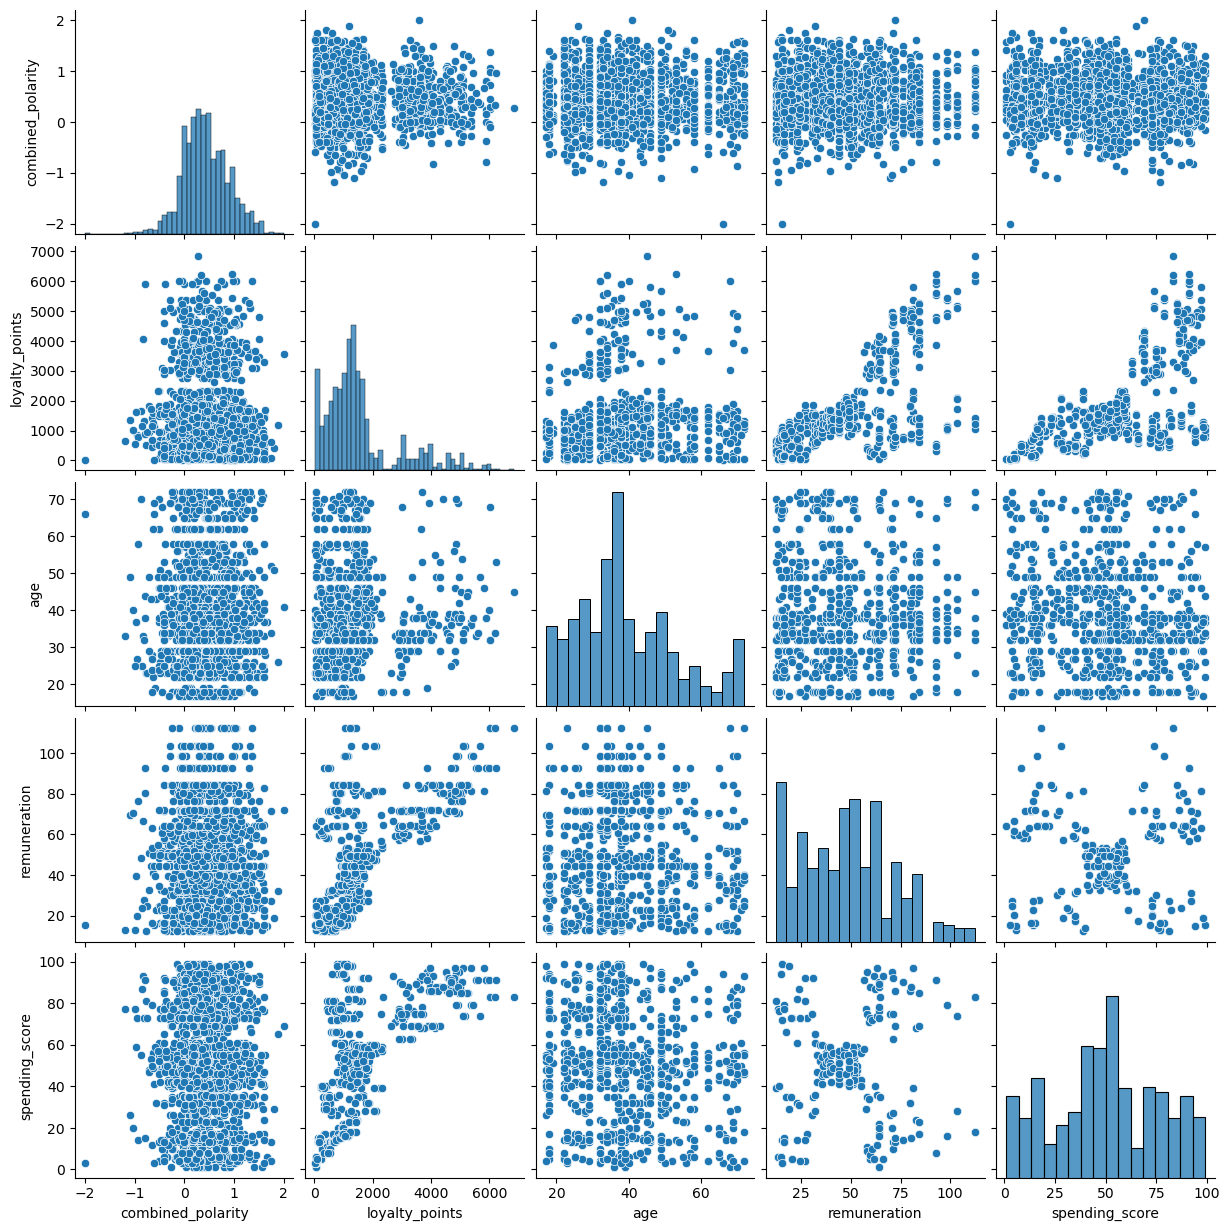

In [640]:
# Create a pairplot to look for relationships and distribution of numercial data.
# Prepare the chart data.
chart_data = trv5[['combined_polarity', 'loyalty_points', 'age', 'remuneration', 'spending_score']].copy()

# Plot the chart.
sns.pairplot(chart_data)

# Save the plot.
#plt.savefig('A - Pairplot from data ingestion.png')

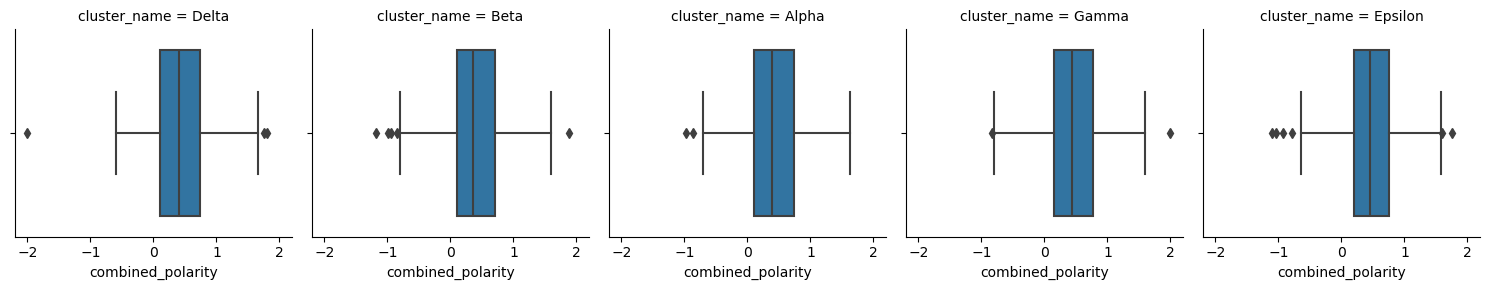

In [641]:
g = sns.FacetGrid(trv5, col = 'cluster_name')
g.map(sns.boxplot, 'combined_polarity', order = 'cluster_name')

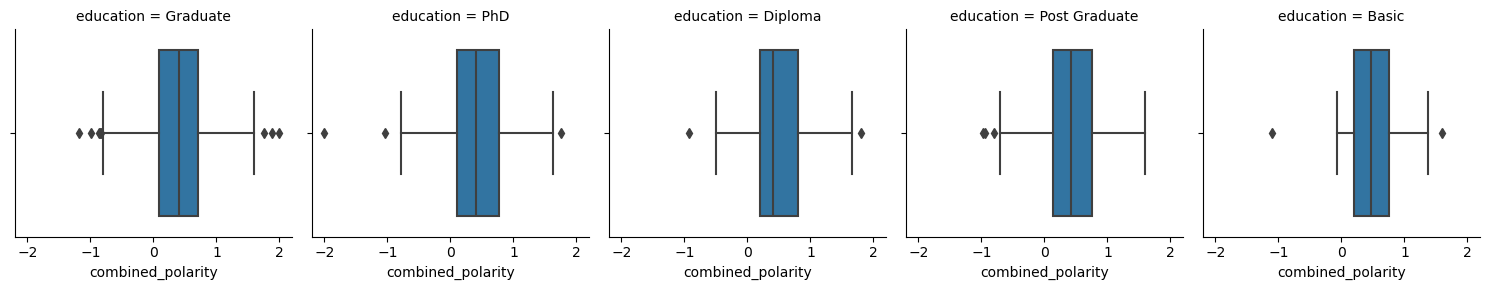

In [642]:
g = sns.FacetGrid(trv5, col = 'education')
g.map(sns.boxplot, 'combined_polarity', order = 'education')

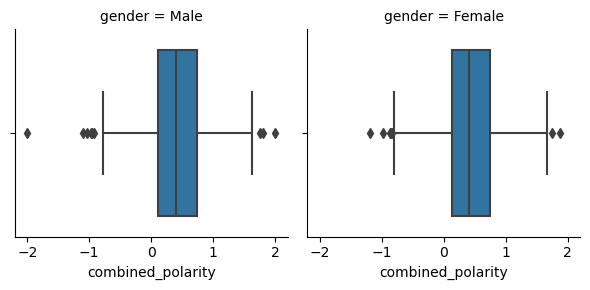

In [643]:
g = sns.FacetGrid(trv5, col = 'gender')
g.map(sns.boxplot, 'combined_polarity', order = 'gender')

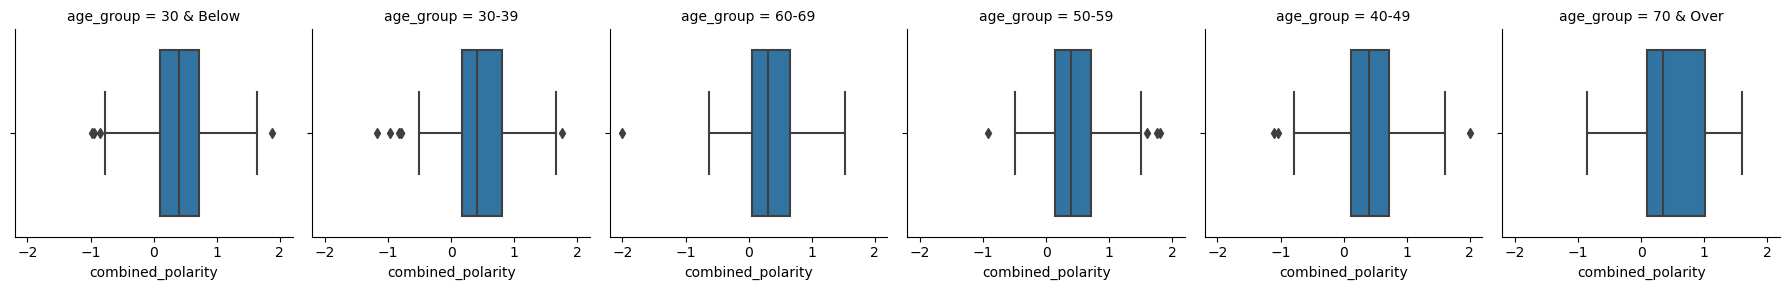

In [644]:
g = sns.FacetGrid(trv5, col = 'age_group')
g.map(sns.boxplot, 'combined_polarity', order = 'age_group')

**COMMENT:** Nothing found